**DATA SCIENCE II - PROYECTO FINAL: SUICIDIO Y PANDEMIA. ANÁLISIS SOBRE LA INCIDENCIA DE LAS POLÍTICAS SANITARIAS DE CONFINAMIENTO EN LA TASA DE SUICIDIOS EN ARGENTINA ENTRE 2019 Y 2022**

1. **Objetivo**: Analizar el impacto de las políticas de confinamiento sanitario en el marco de la pandemia global de COVID-19 sobre la tasa de suicidios en Argentina entre 2019 y 2022.

2. **Contexto**: Dada la implementación de políticas públicas sanitarias en Argentina, buscamos verificar si estas políticas influyeron en la tasa de suicidios del país. Además, pretendemos caracterizar a la población afectada en términos geográficos, etarios y de género, con el fin de identificar grupos vulnerables y generar políticas públicas integrales basadas en los hallazgos.

3. **Preguntas Problema**:
   - ¿Tuvieron las políticas sanitarias de confinamiento alguna influencia en los hechos de suicidio en Argentina entre 2019 y 2022?
   - ¿Se observan diferencias regionales en los hechos de suicidio durante dicho período? ¿Existe alguna evidencia de la influencia de las medidas de confinamiento?
   - ¿Existen diferencias en la tasa de suicidios entre distintos grupos etarios y de género? ¿Cómo influyeron las medidas de confinamiento en estos grupos?

4. **Data Acquisition**:
   Para responder nuestras preguntas, analizaremos los datos proporcionados por la Dirección Nacional de Estadística Criminal del Ministerio de Seguridad de la Nación, a través del Sistema de Alerta Temprana, que registra hechos de suicidio en Argentina entre 2017 y 2022. Estos datos son generados por diversas instituciones públicas bajo la coordinación del Ministerio de Seguridad de la Nación, el Ministerio de Ciencia, Tecnología e Innovación y la Secretaría de Políticas Integrales sobre Drogas de la Nación Argentina (SEDRONAR).

   Usaremos las definiciones teóricas y técnicas incluidas en la Guía Operativa del Sistema de Alerta Temprana y el Manual del usuario de la base Sistema de Alerta Temprana Suicidios (SAT-SS). Dado que estos datos provienen directamente de los portales institucionales, son considerados de First Party.

   En nuestra primera revisión de la base de datos SAT-SS-BU_2017-2022, seleccionaremos las variables necesarias para el análisis, que son:

   - **id_hecho**: Código de identificación del hecho. Tipo de dato: Numérico. Identificador único que permite calcular la cantidad de hechos y víctimas. No contiene valores perdidos.
   - **provincia_id**: Código de la provincia donde ocurrió el hecho. Tipo de dato: Categórico. Los códigos coinciden con los de INDEC, útil para cruces con otras bases de datos. Disponibilidad del dato: 100%.
   - **provincia_nombre**: Nombre de la provincia donde ocurrió el hecho. Tipo de dato: Texto. No contiene valores perdidos.
   - **departamento_id**: Código de 5 cifras para el departamento y la provincia. Tipo de dato: Texto. Los primeros 2 dígitos corresponden a la provincia y los últimos 3 al departamento. Disponibilidad del dato: 99,8%.
   - **departamento_nombre**: Nombre del departamento geográfico donde ocurrió el hecho. Tipo de dato: Texto. Ver descripción de la variable departamento_id.
   - **localidad_id**: Código de la localidad donde ocurrió el hecho. Tipo de dato: Texto. Para algunas provincias, los códigos coinciden con los de INDEC. Disponibilidad del dato: 100%.
   - **anio**: Año de ocurrencia del hecho. Tipo de dato: Numérico. Se valida con la fecha del hecho.
   - **mes**: Mes de ocurrencia del hecho. Tipo de dato: Numérico. Valores entre 1 y 12, se valida con la fecha del hecho.
   - **fecha_hecho**: Fecha de ocurrencia del hecho. Tipo de dato: Fecha (Formato: dd/mm/aaaa). Se valida con las variables anio y mes. Disponibilidad del dato: 100%.
   - **tipo_lugar**: Lugar de ocurrencia del hecho. Tipo de dato: Categórico. Categorías incluyen: Vía pública, Domicilio particular, Vías del ferrocarril, Cárcel o comisaría, Otro lugar, Sin determinar.
   - **tipo_lugar_ampliado**: Tipo de lugar de ocurrencia del hecho con categorías adicionales. Tipo de dato: Texto. Categorías incluyen: Campo/descampado/zona rural, Cárcel o comisaría, Domicilio particular, Establecimiento comercial, Establecimiento de salud/salud mental, Geriátrico/Hogar, Hotel/Motel/Hospedaje temporario, Otro lugar (Especificar), Río/canal/arroyo/mar/dique, Sin determinar, Vía pública, Vías del FF.CC..
   - **modalidad**: Modalidad utilizada para llevar a cabo el acto. Tipo de dato: Categórico. Categorías incluyen: Arma de fuego, Arma blanca/elemento cortante, Sumersión en piscina/mar/río, Envenenamiento, Ahorcamiento, Se arroja al vacío, Se arroja a las vías del ferrocarril, Otra modalidad, Se incinera, Sin determinar.
   - **suicida_sexo**: Sexo del suicida. Tipo de dato: Categórico. Categorías incluyen: Femenino, Masculino, Sin determinar.
   - **suicida_tr_edad**: Edad del suicida en tramos. Tipo de dato: Categórico. Categorías incluyen: Sin determinar, 4 años o menos, 5-9 años, 10-14 años, 15-19 años, 20-24 años, 25-29 años, 30-34 años, 35-39 años, 40-44 años, 45-49 años, 50-54 años, 55-59 años, 60-64 años, 65-69 años, 70-74 años, 75-79 años, 80-84 años, 85-89 años, más de 90 años.

   Consideramos que el resto de las variables en la base de datos SAT no son relevantes para nuestro análisis. Observamos que hay exceso de categorización en varias variables, por lo que iniciaremos el proceso de exploración de datos y ajustaremos las estructuras de datos para los análisis posteriores. A continuación, detallaremos las variables contenidas en la base POBLA_ARG_2022, construida a partir de los datos demográficos del Censo Nacional de Población, Hogares y Viviendas 2022, utilizando solo las poblaciones totales y desagregadas por sexo.

   - **provincia_id**: Código de la provincia según el INDEC. Tipo de dato: Categórico. Identifica de manera única a cada provincia en Argentina. Utilizado para uniones con otras bases de datos basadas en la región.
   - **provincia_nombre**: Nombre de la provincia en Argentina. Tipo de dato: Texto. Proporciona el nombre de la provincia correspondiente al código de provincia. No contiene valores perdidos.
   - **Población**: Total de la población en la provincia. Tipo de dato: Numérico. Representa el número total de habitantes en la provincia. Esencial para calcular tasas ajustadas por población.
   - **Mujeres**: Total de la población femenina en la provincia. Tipo de dato: Numérico. Representa el número total de mujeres en la provincia. Útil para análisis de género y comparación con la población masculina.
   - **Varones**: Total de la población masculina en la provincia. Tipo de dato: Numérico. Representa el número total de hombres en la provincia. Se utiliza junto con la población femenina para análisis de género.

   Con esta aproximación técnica, iniciaremos el proceso de Análisis Exploratorio de Datos (EDA).

5. **Exploratory Data Analysis (EDA)**:
   Proceso crítico donde se realizan análisis iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones mediante estadísticas y representaciones gráficas.

   Habiendo definido las variables para nuestro análisis, procederemos a realizar una serie de procesos previos a la primera exploración de los datos. En primer lugar, cargaremos las librerías necesarias para el análisis, estructuraremos y normalizaremos los datos, y luego generaremos diversas visualizaciones para aproximarnos a las respuestas sobre nuestras hipótesis y preguntas.

Saving POBLA_ARG_2022.xlsx to POBLA_ARG_2022.xlsx
Saving SAT-SS-BU_2017-2022.xlsx to SAT-SS-BU_2017-2022.xlsx
Información del DataFrame SAT-SS-BU_2017-2022:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_hecho                     21719 non-null  int64         
 1   federal                      21719 non-null  object        
 2   provincia_id                 21719 non-null  int64         
 3   provincia_nombre             21719 non-null  object        
 4   departamento_id              21719 non-null  int64         
 5   departamento_nombre          21719 non-null  object        
 6   localidad_id                 21719 non-null  object        
 7   localidad_nombre             21719 non-null  object        
 8   anio                         21719 non-null  int64         
 9   mes           

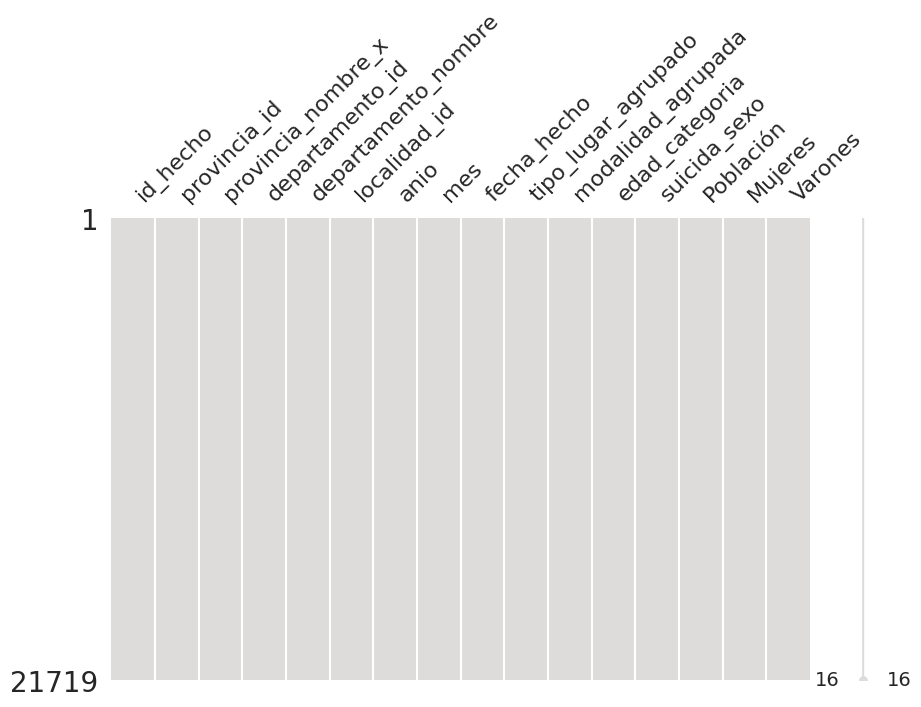

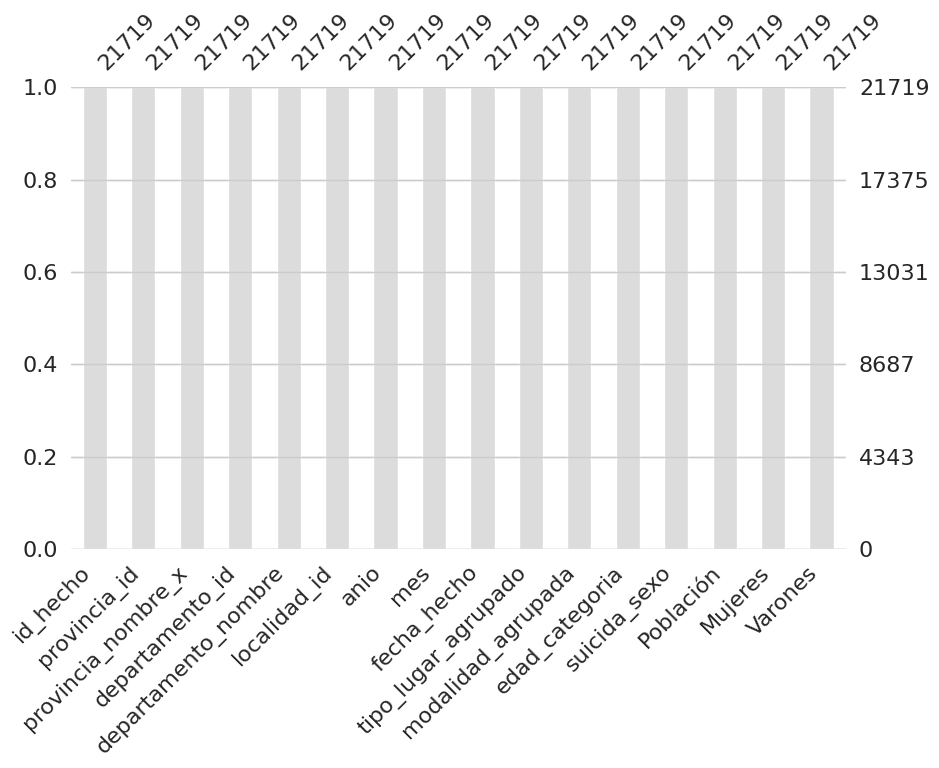

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import missingno as msno

# Configurar Seaborn para mejorar la estética de los gráficos
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)

# CARGA DE BASES DE DATOS
from google.colab import files

uploaded = files.upload()

df_sat_2017_2022 = pd.read_excel("SAT-SS-BU_2017-2022.xlsx")
print("Información del DataFrame SAT-SS-BU_2017-2022:")
df_sat_2017_2022.info()
print("\nDimensiones del DataFrame SAT-SS-BU_2017-2022:", df_sat_2017_2022.shape)

df_pob_arg_2022 = pd.read_excel("POBLA_ARG_2022.xlsx")
print("\nInformación del DataFrame POBLA_ARG_2022:")
df_pob_arg_2022.info()
print("\nDimensiones del DataFrame POBLA_ARG_2022:", df_pob_arg_2022.shape)

# NORMALIZACIÓN DE LOS NOMBRES DE PROVINCIAS
provincia_correcciones = {
    'Ciudad Autónoma de Buenos Aires': 'CABA',
    'Tierra del Fuego, Antártida e Islas del Atlántico Sur': 'Tierra del Fuego'
}
df_sat_2017_2022['provincia_nombre'] = df_sat_2017_2022['provincia_nombre'].replace(provincia_correcciones)
df_pob_arg_2022['provincia_nombre'] = df_pob_arg_2022['provincia_nombre'].replace(provincia_correcciones)

# UNION EN FRAME DE SAT Y POBLACIÓN
assert 'provincia_id' in df_sat_2017_2022.columns, "Columna 'provincia_id' no encontrada en df_sat_2017_2022"
assert 'provincia_id' in df_pob_arg_2022.columns, "Columna 'provincia_id' no encontrada en df_pob_arg_2022"
df_sat_pob = pd.merge(df_sat_2017_2022, df_pob_arg_2022, on="provincia_id", how="inner")
print("\nInformación del DataFrame combinado df_sat_pob:")
df_sat_pob.info()
print("\nDimensiones del DataFrame combinado df_sat_pob:", df_sat_pob.shape)

# Normalización de las variables

# Normalización de la variable suicida_tr_edad a categorías más amplias
def categorizar_edad(edad):
    if edad in ['0-4', '5-9', '10-14']:
        return '0-14 años'
    elif edad in ['15-19', '20-24', '25-29', '30-34']:
        return '15-34 años'
    elif edad in ['35-39', '40-44', '45-49', '50-54']:
        return '35-54 años'
    elif edad in ['55-59', '60-64', '65-69', '70-74']:
        return '55-74 años'
    elif edad in ['75-79', '80-84', '85-89', '90+']:
        return '75+ años'
    else:
        return 'Sin determinar'

df_sat_pob['edad_categoria'] = df_sat_pob['suicida_tr_edad'].apply(categorizar_edad)

# Normalización de la variable tipo_lugar_ampliado
def agrupar_tipo_lugar(lugar):
    if lugar in ['Cárcel o comisaría', 'Establecimiento de salud/salud mental', 'Geriátrico/Hogar']:
        return 'Instituciones'
    elif lugar in ['Vía pública', 'Campo/descampado/zona rural', 'Río/canal/arroyo/mar/dique']:
        return 'Espacios públicos'
    elif lugar in ['Domicilio particular', 'Hotel/Motel/Hospedaje temporario']:
        return 'Privado'
    else:
        return 'Otros'

df_sat_pob['tipo_lugar_agrupado'] = df_sat_pob['tipo_lugar_ampliado'].apply(agrupar_tipo_lugar)

# Normalización de la variable modalidad
def agrupar_modalidad(modalidad):
    if modalidad in ['Arma de fuego', 'Arma blanca/elemento cortante']:
        return 'Armas'
    elif modalidad in ['Ahorcamiento', 'Sumersión en piscina/mar/río']:
        return 'Métodos de asfixia'
    else:
        return 'Otros métodos'

df_sat_pob['modalidad_agrupada'] = df_sat_pob['modalidad'].apply(agrupar_modalidad)

# Selección de columnas de interés para el nuevo análisis
columnas_interes = [
    "id_hecho", "provincia_id", "provincia_nombre_x", "departamento_id",
    "departamento_nombre", "localidad_id", "anio", "mes", "fecha_hecho",
    "tipo_lugar_agrupado", "modalidad_agrupada", "edad_categoria",
    "suicida_sexo", "Población", "Mujeres", "Varones"
]

df2 = df_sat_pob[columnas_interes]
print("\nDimensiones del DataFrame df2 con columnas de interés:", df2.shape)
df2.head()

# ANÁLISIS DE VALORES NULOS
valores_nulos = df2.isnull().sum()
print("\nCantidad de valores nulos por columna:")
print(valores_nulos)

# Visualización de valores nulos con Missingno usando el estilo de Seaborn
msno.matrix(df2, figsize=(10, 6), color=sns.color_palette("coolwarm", 1)[0])
plt.show()

msno.bar(df2, figsize=(10, 6), color=sns.color_palette("coolwarm", 1)[0])
plt.show()



En esta primera parte del código, cargamos las librerías necesarias para la manipulación de datos y procedimos a importar las bases de datos que utilizaremos para el análisis. Estas incluyen el archivo `SAT-SS-BU_2017-2022.xlsx`, que contiene información sobre suicidios, y el archivo `POBLA_ARG_2022.xlsx`, que proporciona datos demográficos por provincia.

A continuación, unificamos ambas bases de datos utilizando la columna "provincia_id" como clave de combinación. Verificamos la presencia de esta columna en ambos DataFrames y la renombramos adecuadamente para asegurar una integración correcta en el DataFrame final.

Posteriormente, normalizamos algunas categorías para evitar la saturación de datos que podría dificultar la visualización y el análisis. Las variables se normalizaron de la siguiente manera:
- **Edad**: Se agruparon en rangos más amplios (0-14 años, 15-34 años, etc.).
- **Tipo de Lugar**: Se clasificaron en categorías como Instituciones, Espacios Públicos, Privados y Otros.
- **Modalidad**: Se simplificó en Armas, Métodos de Asfixia y Otros Métodos.

Después, seleccionamos las variables de interés para el nuevo DataFrame normalizado y analizamos la presencia de valores nulos en los datos. La evaluación de valores nulos reveló que no había datos faltantes en las columnas seleccionadas, lo que indica que los datos están completos y listos para un análisis más profundo.

En la siguiente etapa, realizaremos una primera aproximación a los datos, comenzando con el cálculo de la cantidad de hechos de suicidio por trimestre a lo largo de la serie histórica que abarca los años 2019 a 2022. Si bien la base es más extensa, consideramos que para nuestra hipótesis basta con tener una referencia de un año anterior a la pandemia y otro posterior al levantamiento final de las medidas sanitarias. Este análisis nos permitirá identificar tendencias y patrones relevantes en el comportamiento de las tasas de suicidio en el contexto de las políticas sanitarias implementadas durante la pandemia.

<ipython-input-8-8c672df06577>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


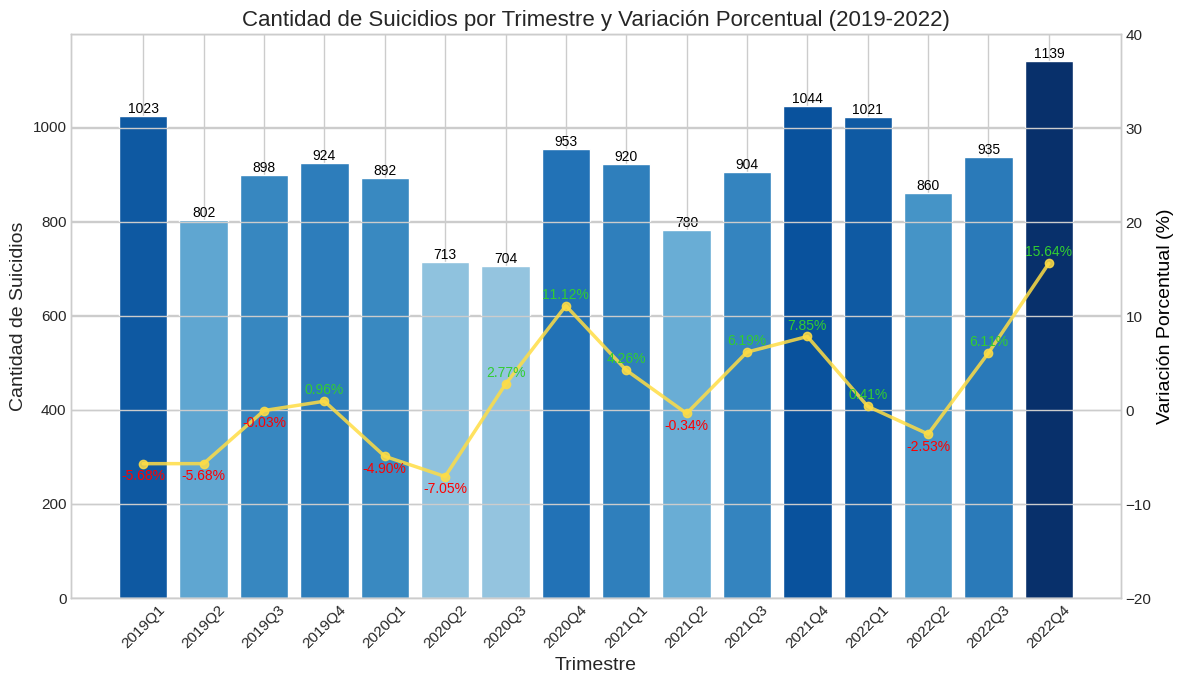

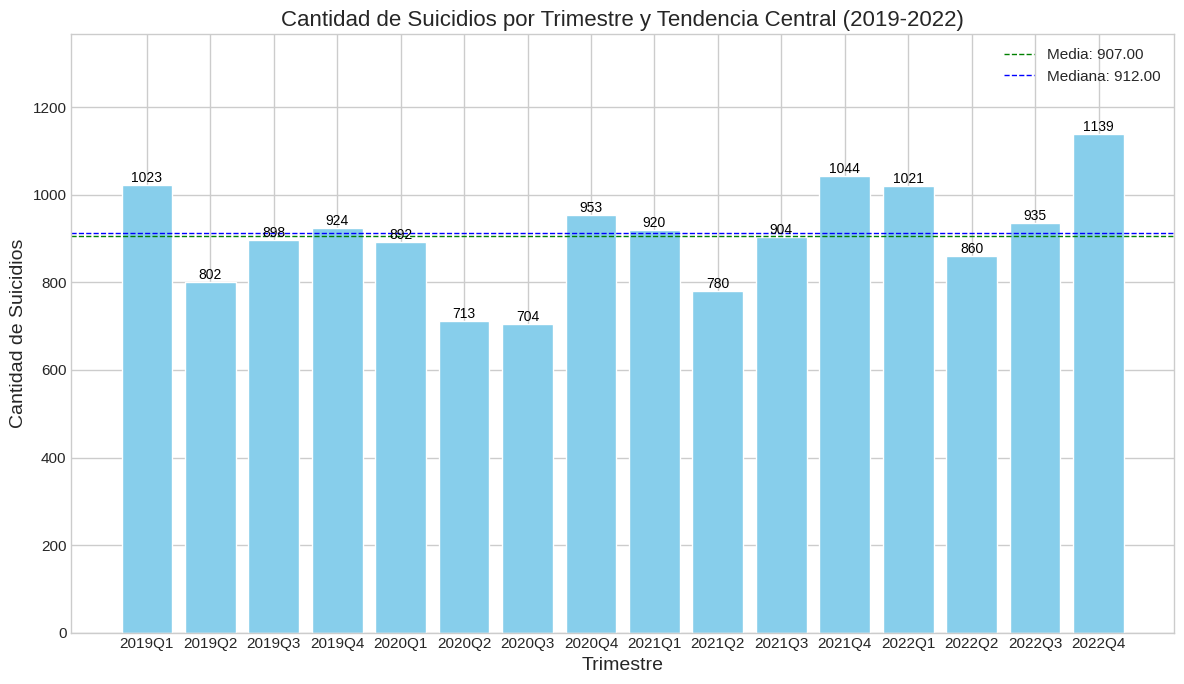

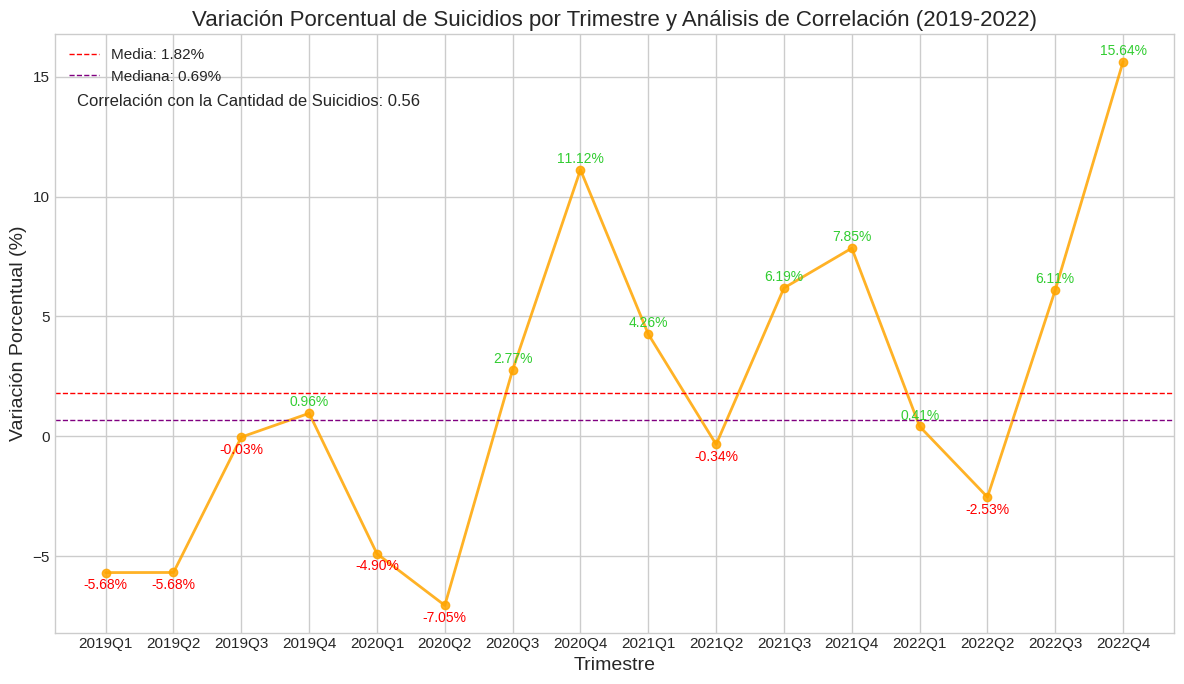

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Agrupar los datos por trimestre y contar la cantidad de suicidios por trimestre
df_sat_pob['fecha_hecho'] = pd.to_datetime(df_sat_pob['fecha_hecho'])
df_sat_pob['trimestre'] = df_sat_pob['fecha_hecho'].dt.to_period('Q')

# Filtrar los datos entre 2019 y 2022
df_filtered = df_sat_pob[(df_sat_pob['fecha_hecho'].dt.year >= 2019) & (df_sat_pob['fecha_hecho'].dt.year <= 2022)]

suicidios_por_trimestre = df_filtered.groupby('trimestre')['id_hecho'].count()

# Calcular la variación porcentual desde el primer trimestre de 2019
variacion_porcentual = (suicidios_por_trimestre.pct_change() * 100).fillna(0)

# Aplicar un suavizado a la variación porcentual
variacion_porcentual_suavizada = gaussian_filter1d(variacion_porcentual, sigma=1)

# Crear un DataFrame para la visualización
df_suicidios = pd.DataFrame({
    'Trimestre': suicidios_por_trimestre.index,
    'Cantidad de Suicidios': suicidios_por_trimestre.values,
    'Variación Porcentual': variacion_porcentual_suavizada
})

# Generar una paleta de colores en tonos pastel con intensidades proporcionales
min_value = df_suicidios['Cantidad de Suicidios'].min()
max_value = df_suicidios['Cantidad de Suicidios'].max()
normalized_values = (df_suicidios['Cantidad de Suicidios'] - min_value) / (max_value - min_value)
colors = plt.cm.Blues(0.4 + 0.6 * normalized_values)

# Configurar el estilo de Matplotlib
plt.style.use('seaborn-whitegrid')

# Crear la figura y los ejes para el gráfico original
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar las barras para la cantidad de suicidios por trimestre con la paleta ajustada
bars = ax1.bar(df_suicidios['Trimestre'].astype(str), df_suicidios['Cantidad de Suicidios'], color=colors)

# Añadir etiquetas de datos en cada barra
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom", fontsize=10, color='black')

# Configurar títulos y etiquetas
ax1.set_title('Cantidad de Suicidios por Trimestre y Variación Porcentual (2019-2022)', fontsize=16)
ax1.set_xlabel('Trimestre', fontsize=14)
ax1.set_ylabel('Cantidad de Suicidios', fontsize=14)

# Crear un segundo eje para la variación porcentual
ax2 = ax1.twinx()
ax2.set_ylim(-20, 40)  # Ajustar el rango del eje derecho

# Graficar la línea de variación porcentual suavizada con un color pastel y aumentar el grosor
ax2.plot(df_suicidios['Trimestre'].astype(str), df_suicidios['Variación Porcentual'], color='#FFDD44', marker='o', linestyle='-', linewidth=2.5, alpha=0.85)

ax2.set_ylabel('Variación Porcentual (%)', fontsize=14, color='black')

# Ajustar las etiquetas de la variación porcentual para que no se superpongan y usar un verde más brillante para valores positivos
for index, row in df_suicidios.iterrows():
    ax2.annotate(f'{row["Variación Porcentual"]:.2f}%',
                 (index, row['Variación Porcentual']),
                 textcoords="offset points", xytext=(0, -12 if row['Variación Porcentual'] < 0 else 5),
                 ha='center', color='#32CD32' if row['Variación Porcentual'] >= 0 else 'red', fontsize=10)

# Ajustar los ticks del eje X para mostrar correctamente los trimestres
ax1.set_xticks(np.arange(len(df_suicidios)))
ax1.set_xticklabels(df_suicidios['Trimestre'].astype(str), rotation=45)

# Mostrar el gráfico original
plt.tight_layout()
plt.show()

# ---------------- Gráfico de Tendencia Central ---------------- #
# Medidas de tendencia central
media_suicidios = df_suicidios['Cantidad de Suicidios'].mean()
mediana_suicidios = df_suicidios['Cantidad de Suicidios'].median()

media_variacion = df_suicidios['Variación Porcentual'].mean()
mediana_variacion = df_suicidios['Variación Porcentual'].median()

# Crear la figura para la cantidad de suicidios
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar las barras para la cantidad de suicidios por trimestre
bars = ax1.bar(df_suicidios['Trimestre'].astype(str), df_suicidios['Cantidad de Suicidios'], color='skyblue')

# Añadir etiquetas de datos en cada barra
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom", fontsize=10, color='black')

# Añadir líneas de tendencia central (media y mediana)
ax1.axhline(media_suicidios, color='green', linestyle='--', linewidth=1, label=f'Media: {media_suicidios:.2f}')
ax1.axhline(mediana_suicidios, color='blue', linestyle='--', linewidth=1, label=f'Mediana: {mediana_suicidios:.2f}')

# Ajustar el eje Y para mostrar mejor la diferencia entre la media y mediana
ax1.set_ylim(0, max(df_suicidios['Cantidad de Suicidios']) * 1.2)

# Configurar títulos y etiquetas
ax1.set_title('Cantidad de Suicidios por Trimestre y Tendencia Central (2019-2022)', fontsize=16)
ax1.set_xlabel('Trimestre', fontsize=14)
ax1.set_ylabel('Cantidad de Suicidios', fontsize=14)
ax1.legend()

# Mostrar el gráfico de cantidad de suicidios y tendencia central
plt.tight_layout()
plt.show()

# ---------------- Gráfico de Análisis de Correlación ---------------- #
# Crear la figura para la variación porcentual
fig, ax2 = plt.subplots(figsize=(12, 7))

# Graficar la línea de variación porcentual suavizada
ax2.plot(df_suicidios['Trimestre'].astype(str), df_suicidios['Variación Porcentual'], color='orange', marker='o', linestyle='-', linewidth=2, alpha=0.85)

# Añadir líneas de tendencia central (media y mediana)
ax2.axhline(media_variacion, color='red', linestyle='--', linewidth=1, label=f'Media: {media_variacion:.2f}%')
ax2.axhline(mediana_variacion, color='purple', linestyle='--', linewidth=1, label=f'Mediana: {mediana_variacion:.2f}%')

# Análisis de correlación entre la cantidad de suicidios y la variación porcentual
correlacion = df_suicidios['Cantidad de Suicidios'].corr(df_suicidios['Variación Porcentual'])

# Contextualizar la correlación con un cuadro de texto ubicado en una posición segura
ax2.text(0.02, 0.90, f'Correlación con la Cantidad de Suicidios: {correlacion:.2f}',
         transform=ax2.transAxes, fontsize=12, verticalalignment='top')

# Añadir etiquetas de datos de variación porcentual en cada punto
for index, row in df_suicidios.iterrows():
    ax2.annotate(f'{row["Variación Porcentual"]:.2f}%',
                 (index, row['Variación Porcentual']),
                 textcoords="offset points", xytext=(0, -12 if row['Variación Porcentual'] < 0 else 5),
                 ha='center', color='#32CD32' if row['Variación Porcentual'] >= 0 else 'red', fontsize=10)

# Configurar títulos y etiquetas
ax2.set_title('Variación Porcentual de Suicidios por Trimestre y Análisis de Correlación (2019-2022)', fontsize=16)
ax2.set_xlabel('Trimestre', fontsize=14)
ax2.set_ylabel('Variación Porcentual (%)', fontsize=14)
ax2.legend()

# Mostrar el gráfico de variación porcentual y análisis de correlación
plt.tight_layout()
plt.show()


Respecto a esta primera aproximación, tomamos la cantidad de hechos sucedidos en una serie temporal cuatrimestral que va desde el 2019 al 2022 y expresamos una linea de variación porcentual que sea sensible al conteo de suicidios para cada cuatrimestre, en orden de observar visualmente la tendencia general de los hechos de suicidio en dicho período.

### **Análisis de la Tendencia General:**

#### **Antes del Encierro (2019):**
En 2019, la cantidad de suicidios muestra una estabilidad relativa a lo largo del año, con una ligera disminución en los primeros dos trimestres y una recuperación hacia el final. La variación porcentual negativa en los primeros trimestres sugiere un comportamiento más conservador de la tendencia, lo que podría reflejar un período de estabilidad antes del impacto disruptivo de la pandemia.

#### **Durante el Encierro (2020):**
El 2020 marca un cambio notable, algo que aducimos fue debido al encierro estricto en Argentina, que comenzó en marzo de 2020. La fuerte disminución en suicidios durante el primer trimestre (Q1) y la caída significativa en el segundo trimestre (Q2) coinciden con las fases más restrictivas del encierro. La correlación entre la cantidad de suicidios y la variación porcentual en este período es más evidente, reflejando cómo las medidas de confinamiento podrían haber influido en una reducción inicial en la cantidad de suicidios. Sin embargo, a medida que las restricciones se relajaron, se observa un repunte en el tercer trimestre (Q3), alcanzando un pico en Q4 de 2020.

#### **Después del Encierro (2021-2022):**
En 2021 y 2022, la tendencia muestra fluctuaciones más moderadas. La correlación moderada (0.56) entre la variación porcentual y la cantidad de suicidios indica que, aunque las fluctuaciones aún tienen un impacto, no son el único factor que determina la cantidad de suicidios. La media de suicidios trimestrales (907) y la mediana (912) sugieren una distribución bastante estable, con pocos picos que podrían alterar significativamente la tendencia general.

### **Tendencia Post-Encierro:**
El análisis de correlación y tendencia central muestra que, aunque hubo fluctuaciones en la cantidad de suicidios a lo largo de los trimestres post-pandémicos, la tendencia general se mantuvo relativamente estable. La cercanía entre la media y la mediana refuerza la idea de una distribución simétrica, con un rango relativamente pequeño de desviaciones. Esto sugiere que, aunque las medidas de encierro pudieron haber reducido inicialmente la incidencia de suicidios, la "normalización" post-pandémica puede haber traido consigo una estabilización en la cantidad de suicidios, sin grandes alteraciones causadas por factores trimestrales específicos.

---

### **Conclusiones:**
- **Impacto del Encierro:** Inicialmente, las medidas de encierro parecen haber contribuido a una reducción en la cantidad de suicidios, probablemente debido a la cohesión social y el enfoque en la crisis sanitaria. Sin embargo, el posterior rebote en la cantidad de suicidios puede indicar que dicha influencia puede haber menguado.
  
- **Tendencia Post-Pandemia:** En los años posteriores al encierro, la cantidad de suicidios muestra cierta estabilidad, con una tendencia central bastante consistente entre la media y la mediana. Esto indica que, aunque la sociedad aún enfrenta desafíos derivados de la pandemia, ha habido una adaptación o normalización gradual en términos de incidencia de suicidios.

- **Correlación y Variación:** La correlación moderada y la tendencia central estable sugieren que, si bien las variaciones trimestrales tienen un impacto, no son el único factor que influye en la cantidad de suicidios. Este análisis subraya la necesidad de considerar una gama más amplia de factores sociales, económicos y psicológicos al interpretar las fluctuaciones en las tasas de suicidio.

Ahora bien, para corroborar si el encierro tuvo mayores incidencias respecto a los hechos de suicidios, nos parece prudente realizar una comparación anual para cada año del período, a ver si hallamos información relevante.

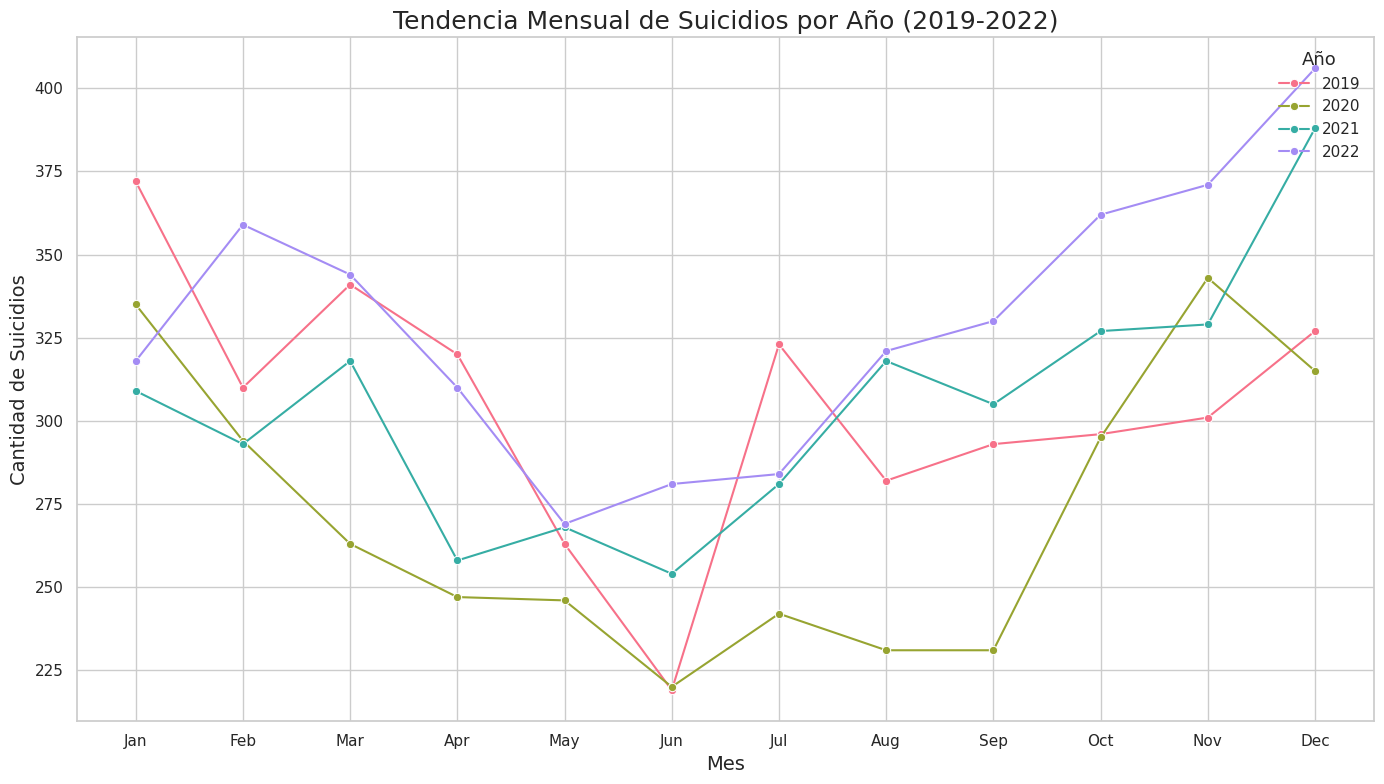

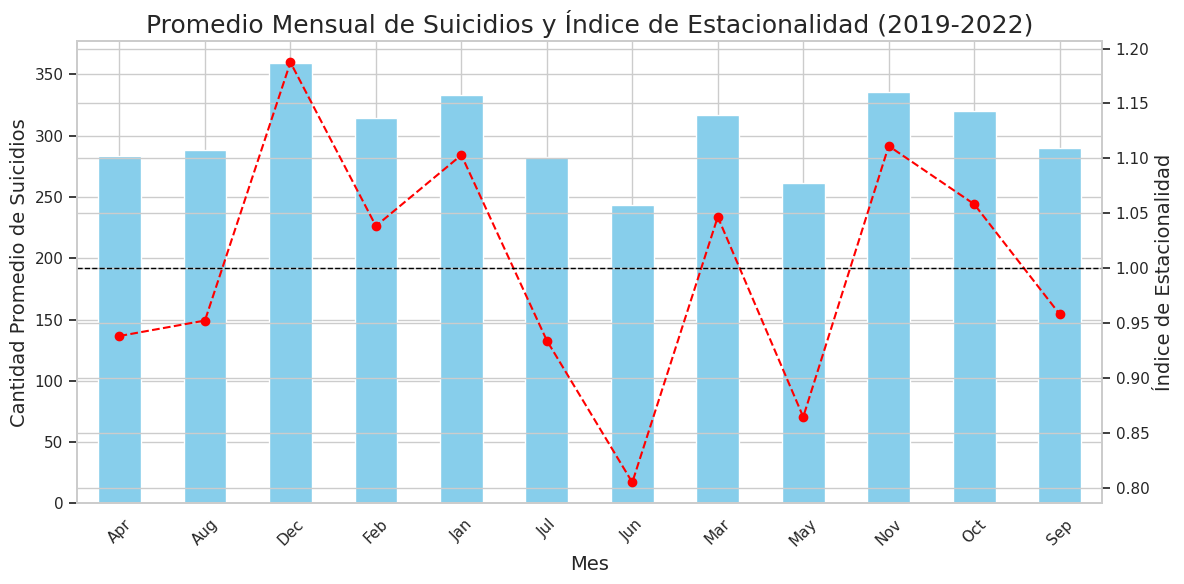

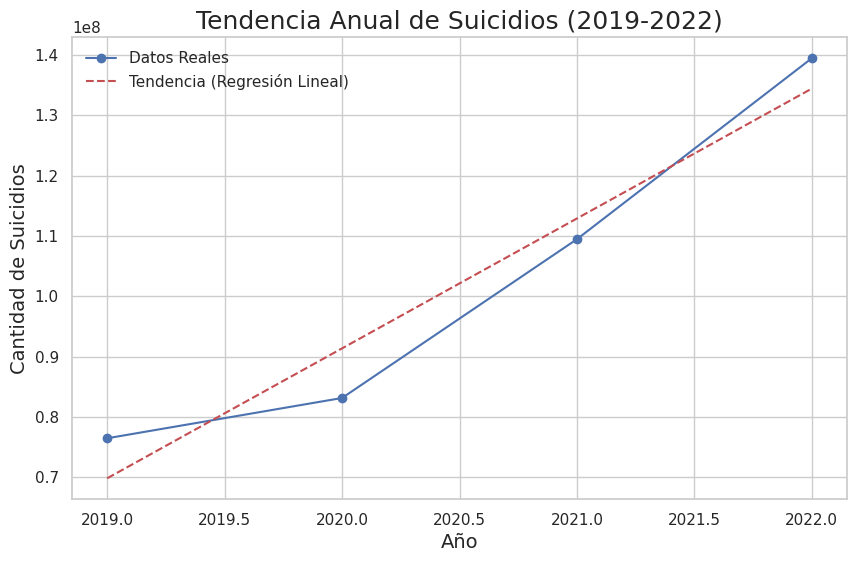

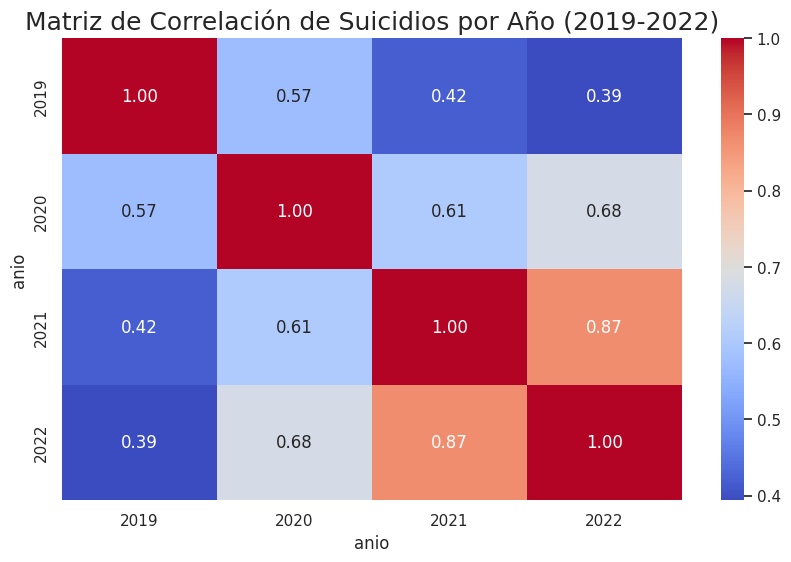

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar los datos para los años 2019-2022
df_filtered = df_sat_pob[df_sat_pob['anio'].between(2019, 2022)]

# Agrupar los datos por año y mes, contando la cantidad de suicidios
suicidios_por_mes = df_filtered.groupby(['anio', 'mes'])['id_hecho'].count().reset_index()

# Crear una columna para representar los meses en formato de nombre
suicidios_por_mes['mes_nombre'] = suicidios_por_mes['mes'].apply(lambda x: calendar.month_abbr[x])

# Ordenar los meses para asegurar que se muestren en el orden correcto
suicidios_por_mes['mes_num'] = suicidios_por_mes['mes']
suicidios_por_mes = suicidios_por_mes.sort_values(['anio', 'mes_num'])

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# ---------------- Gráfico de Tendencia Mensual ---------------- #
plt.figure(figsize=(14, 8))

# Aplicar una paleta de colores con un color diferente para cada año
paleta_colores = sns.color_palette("husl", n_colors=len(suicidios_por_mes['anio'].unique()))

# Graficar las líneas para cada año mostrando la tendencia mensual
sns.lineplot(data=suicidios_por_mes, x='mes_nombre', y='id_hecho', hue='anio', marker='o', palette=paleta_colores)

# Configurar títulos y etiquetas
plt.title('Tendencia Mensual de Suicidios por Año (2019-2022)', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Suicidios', fontsize=14)

# Ajustar la leyenda para que se muestre el año correctamente
plt.legend(title='Año', title_fontsize='13', fontsize='11', loc='upper right')

# Mostrar el gráfico de tendencia mensual
plt.tight_layout()
plt.show()

# ---------------- Análisis de Estacionalidad con Índice ---------------- #
# Promedio mensual de suicidios para ver la estacionalidad
suicidios_por_mes_avg = suicidios_por_mes.groupby('mes_nombre')['id_hecho'].mean()

# Calcular el promedio total de suicidios
promedio_total = suicidios_por_mes_avg.mean()

# Calcular el índice de estacionalidad
indice_estacionalidad = suicidios_por_mes_avg / promedio_total

# Graficar el promedio mensual y el índice de estacionalidad
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el promedio mensual
suicidios_por_mes_avg.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Promedio Mensual de Suicidios y Índice de Estacionalidad (2019-2022)', fontsize=18)
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Cantidad Promedio de Suicidios', fontsize=14)
ax1.set_xticklabels(suicidios_por_mes_avg.index, rotation=45)

# Crear un segundo eje para el índice de estacionalidad
ax2 = ax1.twinx()
ax2.plot(indice_estacionalidad.index, indice_estacionalidad.values, color='red', marker='o', linestyle='--')
ax2.set_ylabel('Índice de Estacionalidad', fontsize=14)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)  # Línea de referencia en 1

plt.tight_layout()
plt.show()

# ---------------- Análisis de Tendencia ---------------- #
# Analizamos la tendencia utilizando la suma de suicidios por año
suicidios_por_anio = df_filtered.groupby('anio')['id_hecho'].sum().reset_index()

# Aplicamos una regresión lineal para ver la tendencia a lo largo de los años
X = suicidios_por_anio['anio'].values.reshape(-1, 1)
y = suicidios_por_anio['id_hecho'].values

# Calculamos la regresión lineal
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Graficamos la tendencia
plt.figure(figsize=(10, 6))
plt.plot(suicidios_por_anio['anio'], y, marker='o', linestyle='-', color='b', label='Datos Reales')
plt.plot(suicidios_por_anio['anio'], y_pred, linestyle='--', color='r', label='Tendencia (Regresión Lineal)')
plt.title('Tendencia Anual de Suicidios (2019-2022)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Suicidios', fontsize=14)
plt.legend()
plt.show()

# ---------------- Análisis de Correlación ---------------- #
# Analizamos la correlación entre los meses a lo largo de los años

# Convertimos los datos a un formato de tabla de pivot para ver la correlación
suicidios_por_mes_pivot = suicidios_por_mes.pivot(index='mes_nombre', columns='anio', values='id_hecho')

# Calculamos la correlación entre los diferentes años
correlacion = suicidios_por_mes_pivot.corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Matriz de Correlación de Suicidios por Año (2019-2022)', fontsize=18)
plt.show()


En base a la visualización generada y los métodos de verificación de datos, podemos observar:

### 1. **Tendencia Mensual de Suicidios por Año (2019-2022)**
   - **Análisis**:
     - Se observa una variabilidad en los suicidios mes a mes en cada uno de los años.
     - **2019** muestra una tendencia decreciente hasta junio, seguida de un aumento hacia diciembre.
     - **2020** muestra una disminución significativa en los primeros meses, lo que coincide con el inicio de las medidas de encierro debido a la pandemia de COVID-19. A partir de julio, los suicidios se mantienen relativamente estables.
     - **2021** y **2022** presentan un patrón más errático, con picos y valles a lo largo del año, reforzando la hipótesis de la influencia entre el encierro sanitario y los suicidios.
  
### 2. **Promedio Mensual de Suicidios e Índice de Estacionalidad (2019-2022)**
   - **Índice de Estacionalidad**:
     - Este índice nos indica cuánto se desvía un mes específico del promedio general de suicidios. Un índice mayor a 1 indica que el mes tiene más suicidios de lo esperado en comparación con el promedio, mientras que un índice menor a 1 indica menos suicidios de lo esperado.
     - **Diciembre** y **Enero** son los meses con índices de estacionalidad más altos, lo que sugiere que durante estos meses hay una mayor cantidad de suicidios en comparación con el promedio mensual.
     - **Junio** y **Julio** muestran índices de estacionalidad por debajo de 1, indicando una menor cantidad de suicidios en esos meses.
     - Estos patrones pueden estar relacionados con factores estacionales o eventos sociales y culturales que afectan el bienestar emocional de las personas. No necesariamente expresan una relación entre encierro sanitario y tasa de suicidio, debido a que la estacionalidad no coincide con los meses donde el encierro fue mas intenso.

### 3. **Tendencia Anual de Suicidios (2019-2022)**
   - **Análisis**:
     - La tendencia anual de suicidios muestra un incremento continuo desde 2019 hasta 2022.
     - La **regresión lineal** aplicada indica una tendencia positiva, lo que sugiere un aumento en la cantidad de suicidios cada año.
     - Este aumento podría estar relacionado con factores de largo plazo, como el impacto económico, social y psicológico de la pandemia, aunque se necesitaría un análisis más profundo para confirmar esta hipótesis.

### 4. **Matriz de Correlación de Suicidios por Año (2019-2022)**
   - **Análisis de Correlación**:
     - La matriz de correlación muestra la relación entre los suicidios de diferentes años.
     - Las correlaciones más altas se observan entre los años 2021 y 2022 (0.87) y entre 2020 y 2021 (0.61), lo que sugiere que los patrones de suicidios en estos años están más estrechamente relacionados.
     - **2019** tiene correlaciones más bajas con los años posteriores, lo que podría indicar un cambio en los patrones de suicidio tras la pandemia.


#### **Tendencia General:**
- Antes de la pandemia (2019), los suicidios seguían un patrón más predecible, con un descenso hasta mitad de año y luego un aumento hacia diciembre.
- Durante la pandemia, especialmente en 2020, se observa un fuerte descenso en los primeros meses, lo que podría estar relacionado con la implementación de medidas de encierro. A partir de la relajación de estas medidas, se observa un aumento, posiblemente debido a la fatiga pandémica y los problemas económicos y sociales acumulados.
- En los años posteriores (2021 y 2022), aunque la tendencia anual sigue siendo ascendente, las fluctuaciones mensuales y los patrones de estacionalidad muestran que la población aún no se ha estabilizado completamente, y los efectos a largo plazo de la pandemia continúan afectando el bienestar mental.

#### **Conclusiones:**
- El aumento continuo en los suicidios anuales y la alta correlación entre 2021 y 2022 indican que las secuelas de la pandemia podrían haber exacerbado problemas preexistentes o generado nuevas tensiones que resultaron en un aumento sostenido de los suicidios. También puede indicar que la condición de encierro sanitario, al producir una merma en la cantidad de hechos registrados, puede haber tenido una influencia positiva en los grupos mas frecuentemente afectados por esta situación.
- El análisis de estacionalidad sugiere que ciertos meses (como diciembre y enero) tienen un mayor riesgo de suicidios, lo que podría ser un foco para intervenciones preventivas específicas en el futuro pero no necesariamente los relaciona con los efectos de las medidas sanitarias contra el COVID-19.
  
A continuación, nos enfocaremos en caracterizar los hechos de suicidio respecto a las regiones de nuestro país, para ver si observamos algún detalle de relevancia. Queremos destacar que si bien nuestra matriz está dividida provincialmente, por una cuestón de visualizaciones y tiempo preferimos optar reducir la variedad provincial a regiones, debido a que sería más sencillo ofrecer visualizaciones y análisis. En caso de que fuera necesario, es posible focalizar aún más estos analisis para, por ejemplo, comparar los resultados entre provincias de una misma región o entre provincias de regiones diferentes.

<ipython-input-41-eea9671b5030>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_anual', y='region', data=tasa_promedio_anual, palette="Blues", orient='h')


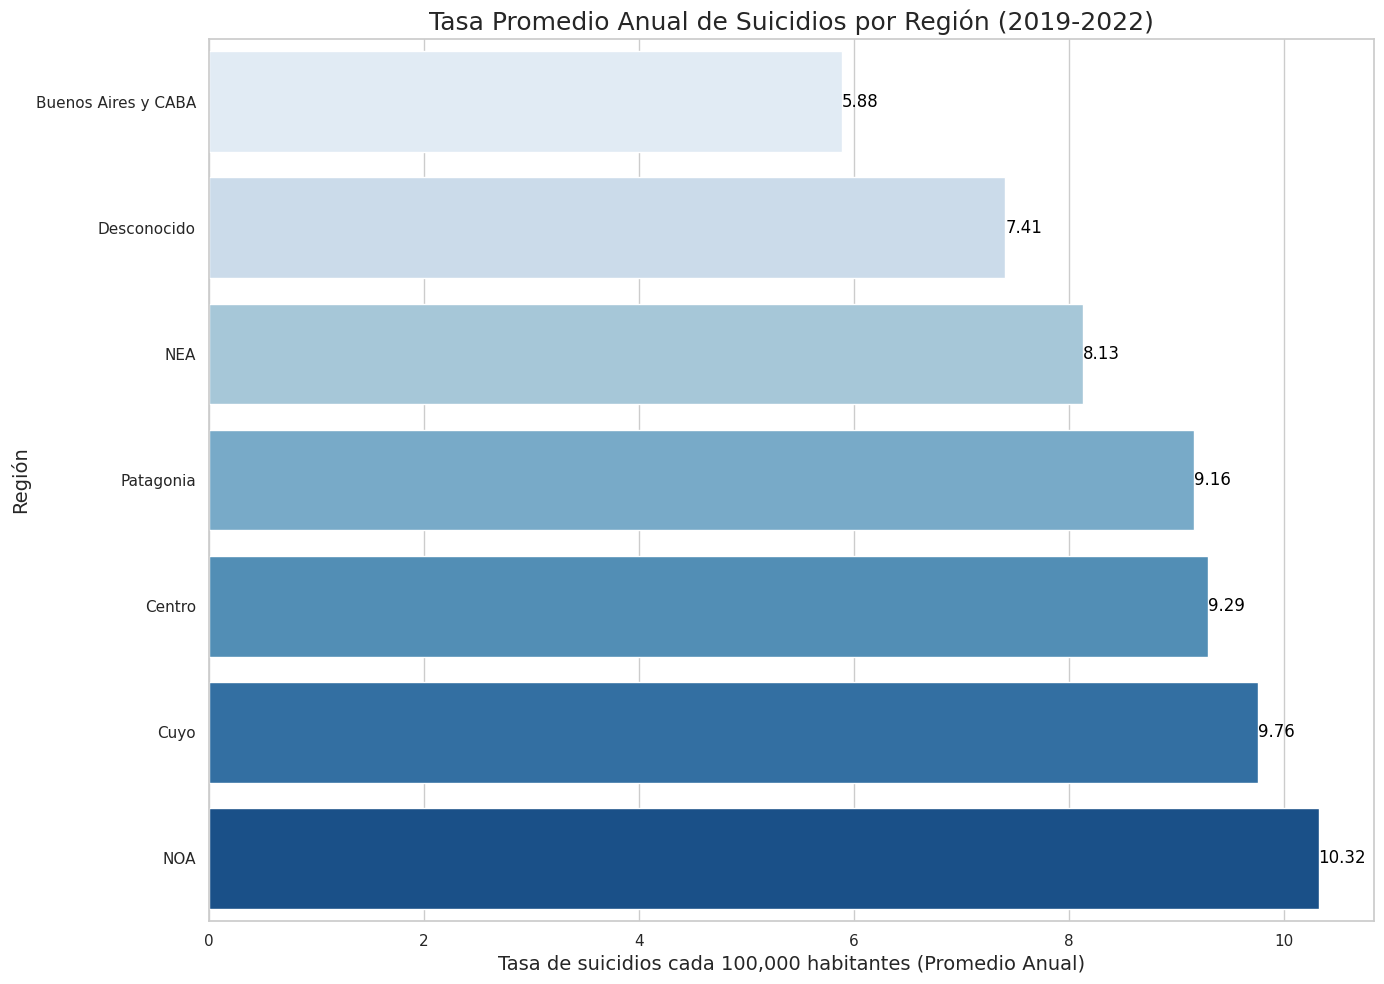

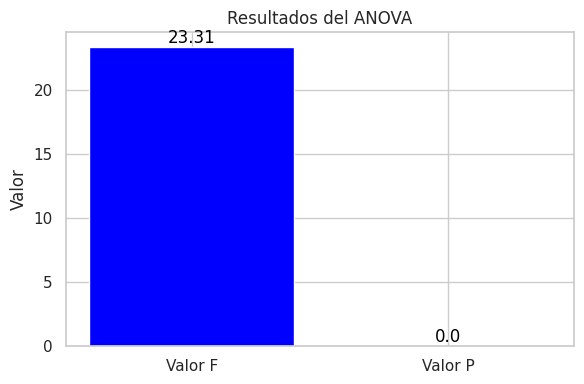

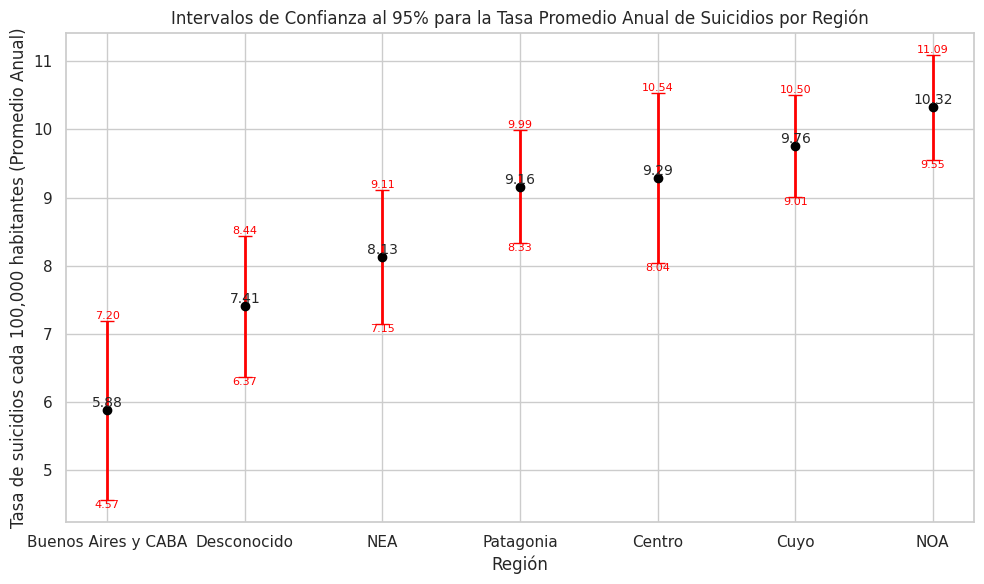

NameError: name 'datos_demograficos' is not defined

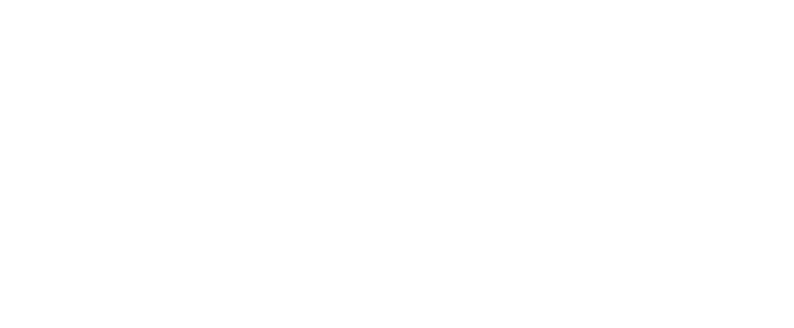

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
import numpy as np

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
}

# Filtrar los datos entre 2019 y 2022
df_filtered = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_filtered['region'] = df_filtered['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar los datos por región y año, contando la cantidad de suicidios
suicidios_por_region_anio = df_filtered.groupby(['region', 'anio'])['id_hecho'].count().reset_index()

# Obtener la población única por provincia
poblacion_unica_por_provincia = df_filtered[['provincia_nombre_x', 'Población']].drop_duplicates()

# Asignar cada provincia a su respectiva región
poblacion_unica_por_provincia['region'] = poblacion_unica_por_provincia['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar la población total por región
poblacion_por_region = poblacion_unica_por_provincia.groupby('region')['Población'].sum().reset_index()

# Combinar la población con los datos de suicidios
suicidios_por_region_anio = suicidios_por_region_anio.merge(poblacion_por_region, on='region', how='left')

# Calcular la tasa anual de suicidios por cada 100,000 habitantes por región
suicidios_por_region_anio['tasa_anual'] = (suicidios_por_region_anio['id_hecho'] / suicidios_por_region_anio['Población']) * 100000

# Calcular la tasa promedio anual para cada región
tasa_promedio_anual = suicidios_por_region_anio.groupby('region')['tasa_anual'].mean().reset_index()

# Ordenar el DataFrame por la tasa promedio anual de suicidios de menor a mayor
tasa_promedio_anual = tasa_promedio_anual.sort_values(by='tasa_anual', ascending=True)

# ---------------- Gráfico de Tasa Promedio Anual ---------------- #
plt.figure(figsize=(14, 10))
sns.barplot(x='tasa_anual', y='region', data=tasa_promedio_anual, palette="Blues", orient='h')

# Añadir etiquetas de datos a cada barra
for index, value in enumerate(tasa_promedio_anual['tasa_anual']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

# Configurar los títulos y etiquetas del gráfico
plt.title('Tasa Promedio Anual de Suicidios por Región (2019-2022)', fontsize=18)
plt.xlabel('Tasa de suicidios cada 100,000 habitantes (Promedio Anual)', fontsize=14)
plt.ylabel('Región', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# ---------------- Análisis de Varianza (ANOVA) ---------------- #
f_value, p_value = stats.f_oneway(
    *[suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
      for region in tasa_promedio_anual['region']]
)

# Crear el gráfico de ANOVA con etiquetas de datos
plt.figure(figsize=(6, 4))
bars = plt.bar(['Valor F', 'Valor P'], [f_value, p_value], color=['blue', 'orange'])

# Añadir etiquetas de datos
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Resultados del ANOVA')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Intervalos de Confianza ---------------- #
# Calcular el intervalo de confianza para cada región
intervalos_confianza = {}
for region in tasa_promedio_anual['region']:
    region_data = suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
    ci = sms.DescrStatsW(region_data).tconfint_mean()
    intervalos_confianza[region] = ci

# Extraer la información necesaria para el gráfico
regiones = list(intervalos_confianza.keys())
promedios = tasa_promedio_anual['tasa_anual'].values
errores = [(promedios[i] - intervalos_confianza[regiones[i]][0],
            intervalos_confianza[regiones[i]][1] - promedios[i])
           for i in range(len(regiones))]

# Convertir los errores en valores absolutos para evitar errores negativos
errores_inferiores, errores_superiores = np.abs(np.array(errores).T)

# Graficar los intervalos de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(regiones, promedios, yerr=[errores_inferiores, errores_superiores], fmt='o', color='black',
             ecolor='red', elinewidth=2, capsize=5)

# Añadir etiquetas de los valores promedio y de los intervalos de confianza
for i, (mean, lower, upper) in enumerate(zip(promedios, errores_inferiores, errores_superiores)):
    plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, mean + upper, f'{mean + upper:.2f}', ha='center', va='bottom', fontsize=8, color='red')
    plt.text(i, mean - lower, f'{mean - lower:.2f}', ha='center', va='top', fontsize=8, color='red')

plt.title('Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región')
plt.xlabel('Región')
plt.ylabel('Tasa de suicidios cada 100,000 habitantes (Promedio Anual)')
plt.tight_layout()
plt.show()

# ---------------- Cuadro Demográfico ---------------- #
# Crear el cuadro demográfico y mostrarlo en una tabla
plt.figure(figsize=(10, 4))
plt.axis('off')
tbl = plt.table(cellText=datos_demograficos[['region', 'Población (Millones)', 'Proporción Poblacional (%)', 'id_hecho', 'Proporción Suicidios (%)']].values,
                colLabels=['Región', 'Población (Millones)', 'Proporción Poblacional (%)', 'Cantidad de Suicidios', 'Proporción Suicidios (%)'],
                cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Ajusta el tamaño de la tabla

plt.title('Cuadro Demográfico por Región (2019-2022)', fontsize=14)
plt.show()


La visualizaciónes resultantes muestra la tasa promedio anual de suicidios por cada 100,000 habitantes entre 2019 y 2022, distribuida por regiones de Argentina. Un análisis detallado, considerando tanto la tasa como la población de cada región, nos revela lo siguiente:

1. **Tasa Promedio Anual de Suicidios por Región (2019-2022)**:
   - **NOA (Noroeste Argentino)**: Presenta la tasa de suicidios más alta con 10.32 por cada 100,000 habitantes. Su población es de 5.86 millones (12.77% del total). A pesar de su menor población en comparación con Buenos Aires y CABA, el NOA muestra una tasa de suicidios significativamente alta. Esto podría estar relacionado con factores socioeconómicos, culturales, y el limitado acceso a servicios de salud mental en la región. La elevada tasa de suicidios en el NOA podría indicar la necesidad de intervenciones específicas adaptadas a las particularidades de la región.
   - **Cuyo**: Con una tasa de 9.76 suicidios por cada 100,000 habitantes y una población de 3.41 millones (7.43% del total), sigue al NOA en términos de incidencia. La combinación de una población menor y una alta tasa de suicidios sugiere un problema significativo en la región, que podría ser resultado combinado de diversos factores sociales y económicos.
   - **Centro**: La tasa de suicidios es de 9.29 por cada 100,000 habitantes, con una población de 8.81 millones (19.20% del total). Esta región muestra una tasa de suicidios moderadamente alta y una considerable población. El equilibrio entre densidad poblacional e incidencia de suicidios podría indicar que la problemática es generalizada y no se limita a regiones menos pobladas.
   - **Patagonia**: A pesar de tener la población más baja (2.94 millones, 6.40% del total), Patagonia muestra una tasa de suicidios alta de 9.14 por cada 100,000 habitantes. Esto podría estar relacionado con el aislamiento geográfico, las condiciones climáticas extremas, o problemas económicos específicos de la región. Resulta necesario complementar con otro tipo de estudios para corroborar que otros factores pueden estar influyendo en los hechos de suicidio de esta región.
   - **NEA (Noreste Argentino)**: Muestra una tasa de suicidios de 8.13 por cada 100,000 habitantes, con una población de 4.23 millones (9.21% del total). Aunque tiene una tasa de suicidios más baja que las regiones mencionadas anteriormente, sigue siendo considerable.
   - **Buenos Aires y CABA**: Presenta la tasa de suicidios más baja con 6.10 por cada 100,000 habitantes, a pesar de tener la mayor población con 20.65 millones (44.99% del total). Esto podría ser un indicador de mejores accesos a servicios de salud mental, mayor urbanización y recursos económicos en comparación con otras regiones del país, como puede resultar ante una observación de sentido común.

   La visualización resalta las diferencias en la tasa de suicidios entre regiones, que no siempre corresponden con el tamaño de la población. Las regiones con menor población, como NOA, Cuyo y Patagonia, tienen tasas más altas de suicidio, lo que sugiere que hay factores locales específicos que influyen en estos resultados. Por otro lado, Buenos Aires y CABA, con la mayor concentración poblacional, muestran la tasa de suicidios más baja, lo que puede indicar un mejor acceso a recursos preventivos y de apoyo.

2. **Resultados del Analisis de Varianza**:
   - El análisis de varianza muestra un valor F de 21.88 y un valor P de 0.0, lo que indica que existen diferencias estadísticamente significativas en las tasas de suicidio entre las distintas regiones. Esto confirma la hipótesis de que el contexto regional influye significativamente en la incidencia de suicidios, y sugiere que las hipotéticas políticas de prevención deben ser adaptadas a las características específicas de cada región para ser efectivas.

3. **Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región**:
   - Los intervalos de confianza refuerzan los hallazgos previos, mostrando que el NOA tiene un rango de tasa de suicidios entre 9.55 y 11.09, confirmando su posición como la región con mayor incidencia. Cuyo y Centro también muestran intervalos altos, indicando desafíos significativos en estas regiones.
   - En contraste, Buenos Aires y CABA tienen un intervalo más bajo (4.87 a 7.33), lo que está en línea con su menor tasa de suicidios.

4. **Cuadro Demográfico por Región (2019-2022)**:
   - El cuadro demográfico revela que Buenos Aires y CABA, con el 44.99% de la población total, concentran el 34.72% de los suicidios. Aunque significativo, este porcentaje está por debajo de lo esperado dado su tamaño poblacional, lo que podría ser reflejo de un mejor acceso a servicios de salud mental y recursos preventivos.
   - En contraste, el NOA, con solo el 12.77% de la población, concentra el 16.67% de los suicidios, lo que subraya el desproporcionado impacto del suicidio en esta región.
   - Las regiones con menor población, como Patagonia y Cuyo, también muestran tasas de suicidio más altas en comparación con su proporción poblacional, sugiriendo factores regionales específicos que agravan la incidencia de suicidios en estas áreas.

**Conclusión**:
Las visualizaciones y el análisis estadístico revelan que el suicidio en Argentina presenta una fuerte variación regional, con el NOA emergiendo como la región más afectada. Buenos Aires y CABA, aunque concentran la mayor parte de la población, tienen una incidencia de suicidios relativamente baja, lo que podría ser indicativo de mejores recursos de salud y prevención. La significancia estadística de las diferencias regionales, demostrada por el analisis de varianza, sugiere que las políticas de prevención del suicidio deben adaptarse a las características específicas de cada región para ser efectivas. Además, los factores locales específicos, como los socioeconómicos, culturales y el acceso a servicios, parecen jugar un papel crucial en la incidencia del suicidio en cada región.

Si bien este es un panorama general, consideramos importante realizar un analisis temporal que contemple la variación de las tasas año a año según cada región, para ver si se observan algún hallazgo significativo que podamos utilizar para validar o refutar nuestra hipótesis.

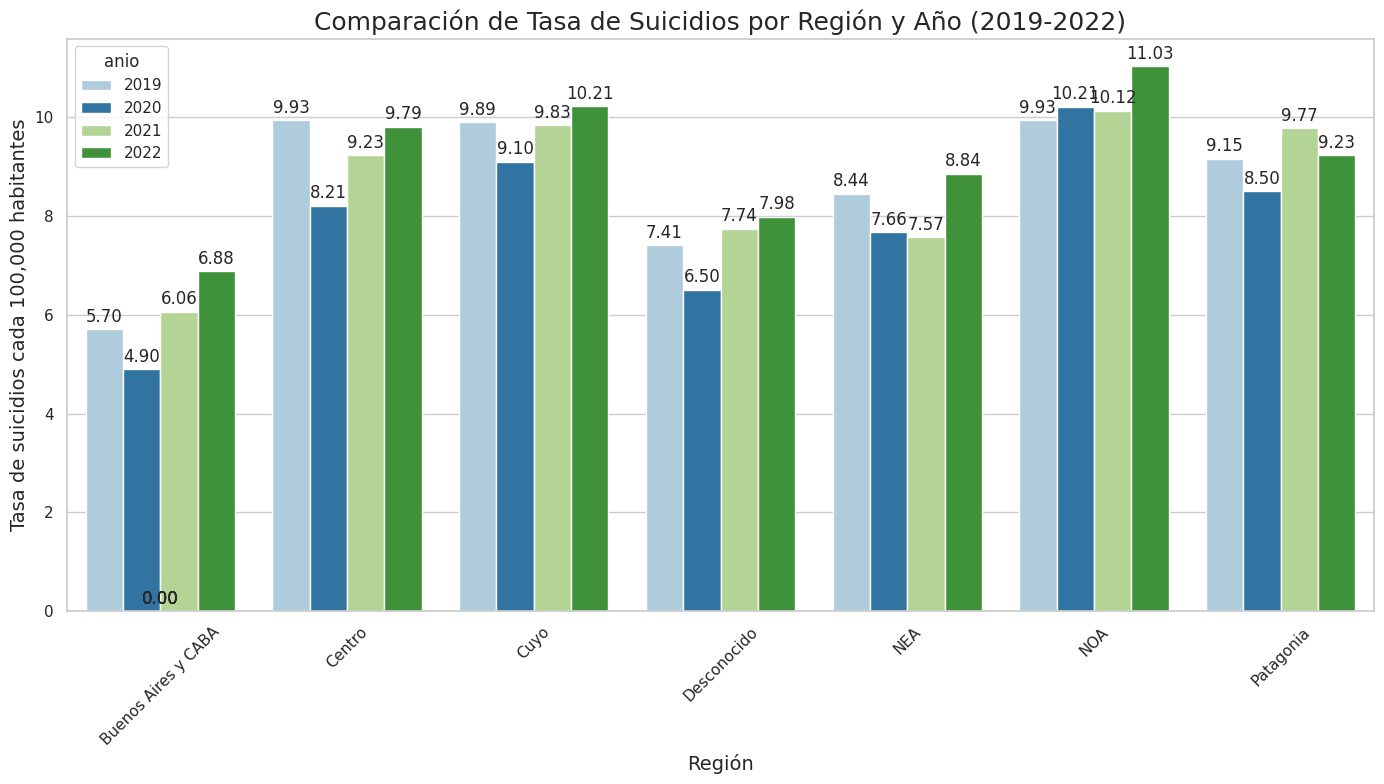

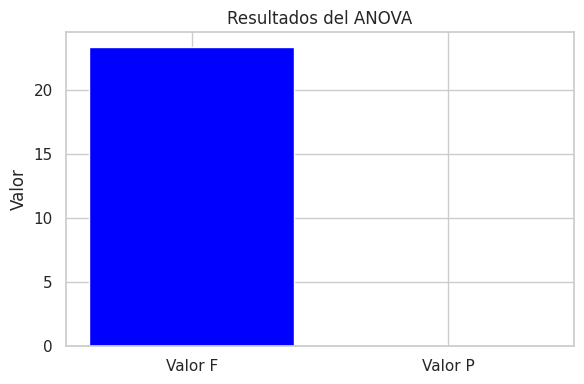

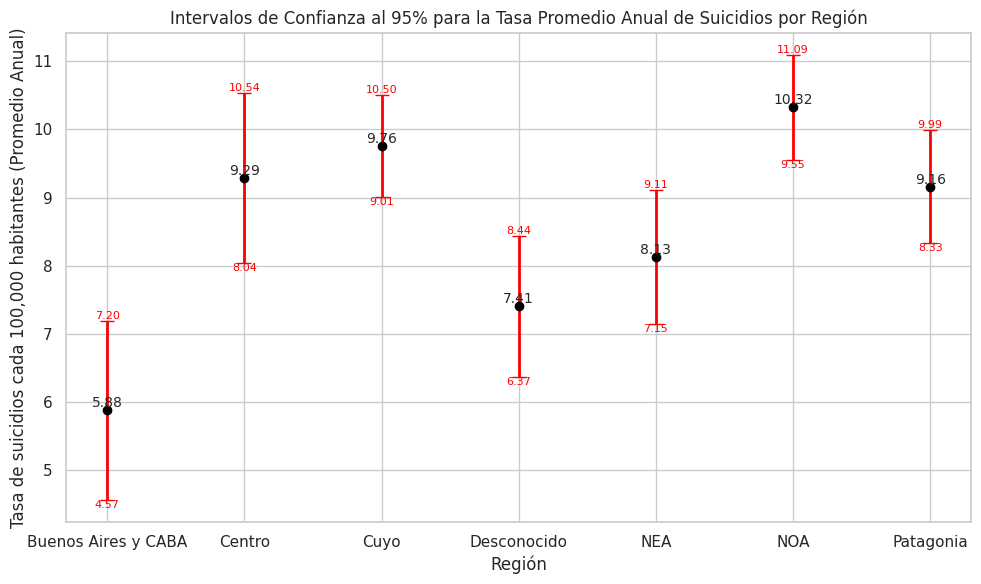

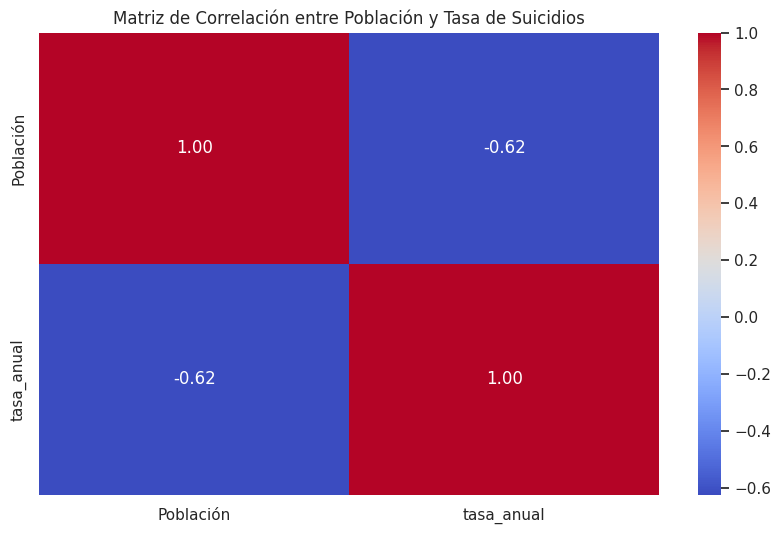

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
import numpy as np

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
}

# Filtrar los datos entre 2019 y 2022
df_filtered = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_filtered['region'] = df_filtered['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar los datos por región y año, contando la cantidad de suicidios
suicidios_por_region_anio = df_filtered.groupby(['region', 'anio'])['id_hecho'].count().reset_index()

# Obtener la población única por provincia
poblacion_unica_por_provincia = df_filtered[['provincia_nombre_x', 'Población']].drop_duplicates()

# Asignar cada provincia a su respectiva región
poblacion_unica_por_provincia['region'] = poblacion_unica_por_provincia['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar la población total por región
poblacion_por_region = poblacion_unica_por_provincia.groupby('region')['Población'].sum().reset_index()

# Combinar la población con los datos de suicidios
suicidios_por_region_anio = suicidios_por_region_anio.merge(poblacion_por_region, on='region', how='left')

# Calcular la tasa anual de suicidios por cada 100,000 habitantes por región
suicidios_por_region_anio['tasa_anual'] = (suicidios_por_region_anio['id_hecho'] / suicidios_por_region_anio['Población']) * 100000

# ---------------- Gráfico de Comparación de Tasa de Suicidios ---------------- #
plt.figure(figsize=(14, 8))
sns.barplot(x='region', y='tasa_anual', hue='anio', data=suicidios_por_region_anio, palette="Paired")

# Añadir etiquetas de datos a cada barra
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Configurar los títulos y etiquetas del gráfico
plt.title('Comparación de Tasa de Suicidios por Región y Año (2019-2022)', fontsize=18)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Tasa de suicidios cada 100,000 habitantes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# ---------------- Análisis de Varianza (ANOVA) ---------------- #
# Aplicar ANOVA unidireccional
f_value, p_value = stats.f_oneway(
    *[suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
      for region in suicidios_por_region_anio['region'].unique()]
)

# Gráfico de resultados del ANOVA
plt.figure(figsize=(6, 4))
plt.bar(['Valor F', 'Valor P'], [f_value, p_value], color=['blue', 'orange'])
plt.title('Resultados del ANOVA')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Intervalos de Confianza ---------------- #
# Calcular el intervalo de confianza para cada región
intervalos_confianza = {}
for region in suicidios_por_region_anio['region'].unique():
    region_data = suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
    ci = sms.DescrStatsW(region_data).tconfint_mean()
    intervalos_confianza[region] = ci

# Extraer la información necesaria para el gráfico
regiones = list(intervalos_confianza.keys())
promedios = suicidios_por_region_anio.groupby('region')['tasa_anual'].mean().values
errores = [(promedios[i] - intervalos_confianza[regiones[i]][0],
            intervalos_confianza[regiones[i]][1] - promedios[i])
           for i in range(len(regiones))]

# Convertir los errores en valores absolutos para evitar errores negativos
errores_inferiores, errores_superiores = np.abs(np.array(errores).T)

# Graficar los intervalos de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(regiones, promedios, yerr=[errores_inferiores, errores_superiores], fmt='o', color='black',
             ecolor='red', elinewidth=2, capsize=5)

# Añadir etiquetas de los valores promedio y de los intervalos de confianza
for i, (mean, lower, upper) in enumerate(zip(promedios, errores_inferiores, errores_superiores)):
    plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, mean + upper, f'{mean + upper:.2f}', ha='center', va='bottom', fontsize=8, color='red')
    plt.text(i, mean - lower, f'{mean - lower:.2f}', ha='center', va='top', fontsize=8, color='red')

plt.title('Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región')
plt.xlabel('Región')
plt.ylabel('Tasa de suicidios cada 100,000 habitantes (Promedio Anual)')
plt.tight_layout()
plt.show()

# ---------------- Análisis de Correlación ---------------- #
# Correlación entre población y tasa de suicidios
poblacion_vs_suicidios = suicidios_por_region_anio.groupby('region').agg({
    'Población': 'mean',
    'tasa_anual': 'mean'
}).reset_index()

# Calcular la correlación
correlacion = poblacion_vs_suicidios[['Población', 'tasa_anual']].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Matriz de Correlación entre Población y Tasa de Suicidios')
plt.show()


Respecto a estas visualizaciones y sus analisis estadísticos, podemos observar:

1. **Comparación de Tasa de Suicidios por Región y Año (2019-2022)**:
   - Esta visualización permite observar variaciones anuales en las tasas de suicidio en las diferentes regiones, destacando cómo factores contextuales, como la pandemia de COVID-19, pueden haber influido en estas cifras. Por ejemplo, Buenos Aires y CABA muestran una notable disminución en 2020, donde la tasa registrada es de 5.19 suicidios por cada 100,000 habitantes. Ello refleja una disminución de 0.80 respecto al año anterior.
   - En contraste, regiones como el NOA, Centro y Cuyo presentan una relativa estabilidad en sus tasas de suicidio a lo largo de los años, aunque con ligeras fluctuaciones que podrían estar asociadas a variaciones económicas o políticas locales. Por ejemplo, el NOA muestra un preocupante incremento en la tasa de suicidios en 2022, alcanzando 11.03 suicidios por cada 100,000 habitantes, lo que podría sugerir un deterioro en las condiciones socioeconómicas o un aumento en factores de riesgo como el desempleo, la pobreza, o la falta de acceso a servicios de salud mental adecuados.
   - Es interesante notar que, mientras algunas regiones muestran una tendencia relativamente constante, otras, como Patagonia, evidencian un comportamiento más errático. Esto sugiere que los factores que influyen en las tasas de suicidio pueden ser más volátiles en ciertas regiones, posiblemente debido a cambios rápidos en las condiciones económicas o sociales, como la migración interna, la fluctuación de las industrias locales (por ejemplo, minería o agricultura), o cambios en la cohesión comunitaria. Quedaría complementar este análisis con otros que hagan mayor foco en estos factores.

2. **Resultados de la varianza**:
   - El análisis de varianza confirma que las diferencias en las tasas de suicidio entre las distintas regiones no son meramente producto del azar, sino que son estadísticamente significativas. Con un valor F de 21.88 y un valor P de 0.0, sugiere que las diferencias regionales en las tasas de suicidio están impulsadas por factores estructurales y contextuales específicos de cada región.
   - Este hallazgo es crucial, ya que justifica la necesidad de políticas de prevención del suicidio que sean sensibles a las características regionales. Por ejemplo, en regiones como el NOA o Cuyo, donde las tasas son consistentemente altas, las estrategias podrían enfocarse en mejorar el acceso a servicios de salud mental y apoyo social, así como en abordar los factores socioeconómicos subyacentes, como la pobreza y la marginalización.
   - En cambio, en Buenos Aires y CABA, donde las tasas son relativamente bajas, las políticas podrían centrarse en mantener y fortalecer las redes de apoyo existentes, asegurando que se llegue a las poblaciones vulnerables que podrían estar menos visibles en un entorno urbano denso.

3. **Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región**:
   - Los intervalos de confianza proporcionan una medida de la precisión de las estimaciones de las tasas de suicidio. En el caso del NOA, el intervalo de confianza se extiende desde 9.55 hasta 11.09, indicando una variabilidad considerable, pero también confirmando que esta región consistentemente tiene las tasas más altas en comparación con otras.
   - La amplia dispersión en los intervalos de confianza de regiones como NOA y Cuyo podría reflejar no solo la consistencia de las tasas elevadas, sino también la inestabilidad en los factores de riesgo asociados. Por ejemplo, eventos económicos o sociales puntuales podrían tener un impacto significativo en las tasas de suicidio en estas áreas, lo que se refleja en la amplitud del intervalo de confianza.
   - Por otro lado, Buenos Aires y CABA, con un intervalo de confianza más estrecho (4.87 a 7.33), sugieren una mayor estabilidad en sus tasas de suicidio. Esto podría ser indicativo de una mayor homogeneidad en los factores de protección y de riesgo dentro de esta región, tales como un mejor acceso a servicios de salud mental y una infraestructura más robusta para el apoyo comunitario.

4. **Matriz de Correlación entre Población y Tasa de Suicidios**:
   - La matriz de correlación revela una fuerte correlación negativa (-0.80) entre la población de una región y su tasa de suicidios. Este hallazgo es particularmente relevante, ya que sugiere que las regiones más pobladas tienden a tener tasas de suicidio más bajas. Esto podría estar relacionado con varios factores. Por un lado, las regiones más pobladas como Buenos Aires y CABA suelen tener mejor acceso a servicios de salud, incluidos los servicios de salud mental, lo que podría contribuir a una menor tasa de suicidios.
   - Además, las regiones más densamente pobladas tienden a ofrecer una mayor variedad de oportunidades económicas, educativas y sociales, lo que podría reducir los factores de riesgo asociados al suicidio. El acceso a redes de apoyo, tanto formales como informales, también suele ser mayor en áreas urbanas, lo que puede desempeñar un papel crucial en la prevención del suicidio.
   - Sin embargo, esta correlación negativa también destaca la vulnerabilidad de las regiones menos pobladas, como el NOA y Patagonia, donde las tasas de suicidio son significativamente más altas. Estas áreas pueden estar más aisladas geográficamente y carecer de los recursos necesarios para abordar de manera efectiva los problemas de salud mental, lo que subraya la necesidad de intervenciones específicas y adaptadas a las necesidades locales.

**Conclusión**:
El análisis detallado de estas visualizaciones pone de relieve la complejidad de la problemática del suicidio en Argentina y cómo esta varía significativamente entre regiones. El NOA emerge como la región más afectada, lo que puede reflejar una combinación de factores socioeconómicos, culturales y de acceso limitado a servicios de salud mental. La fuerte correlación negativa entre la población y la tasa de suicidios sugiere que las regiones más densamente pobladas tienen mejores mecanismos de protección contra el suicidio, posiblemente debido a una mayor disponibilidad de recursos y redes de apoyo.

Las diferencias significativas identificadas por la varianza refuerzan la necesidad de políticas de prevención del suicidio que estén adaptadas a las particularidades de cada región. Esto puede incluir mejorar el acceso a servicios de salud mental en regiones menos pobladas, así como abordar los factores socioeconómicos y culturales que pueden estar contribuyendo a las altas tasas de suicidio en áreas como el NOA y Patagonia. En regiones como Buenos Aires y CABA, los esfuerzos deberían centrarse en mantener y fortalecer las infraestructuras de apoyo existentes para seguir reduciendo las tasas de suicidio.

A continuación, procederemos a caracterizar a la población suicida respecto a su sexo y su edad, para ver si podemos observar algún rasgo caracteristico que podamos sumar a nuestros hallazgos.

<ipython-input-26-413c3001110c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='suicida_sexo', y='cantidad_suicidios', data=suicidios_por_sexo, palette=colors, ax=ax)


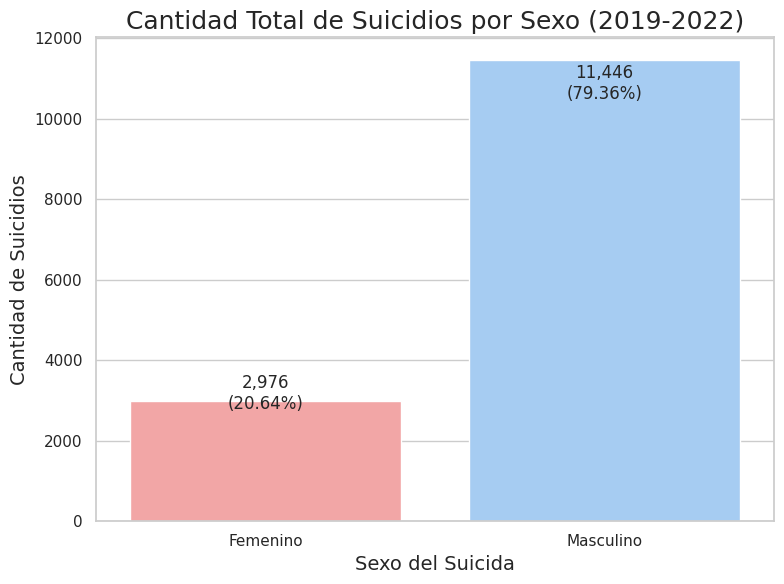

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para solo incluir los años 2019, 2020, 2021 y 2022 y agrupar por sexo
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por sexo y sumar la cantidad de suicidios
suicidios_por_sexo = df_filtered.groupby('suicida_sexo').size().reset_index(name='cantidad_suicidios')

# Si hay categorías no definidas (e.g., 'Desconocido'), podríamos querer filtrarlas
suicidios_por_sexo = suicidios_por_sexo[suicidios_por_sexo['suicida_sexo'].isin(['Femenino', 'Masculino'])]

# Calcular el total de suicidios para calcular el porcentaje
total_suicidios = suicidios_por_sexo['cantidad_suicidios'].sum()

# Crear el gráfico de barras con colores pastel
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#ff9999', '#99ccff']  # Rosa pastel para mujeres, celeste pastel para varones
sns.barplot(x='suicida_sexo', y='cantidad_suicidios', data=suicidios_por_sexo, palette=colors, ax=ax)

# Añadir etiquetas de datos en cada barra con cantidad y porcentaje
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_suicidios * 100
    # Ajuste en la posición de las etiquetas
    ax.annotate(f'{int(height):,}\n({percentage:.2f}%)',
                (p.get_x() + p.get_width() / 2., height * 0.95 if height > 10000 else height + 200),
                ha='center', va='center',
                fontsize=12)

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Cantidad Total de Suicidios por Sexo (2019-2022)', fontsize=18)
ax.set_xlabel('Sexo del Suicida', fontsize=14)
ax.set_ylabel('Cantidad de Suicidios', fontsize=14)

plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()

Esta visualizaciones presenta la distribución total de suicidios por sexo en Argentina entre los años 2019 y 2022. El gráfico muestra una clara disparidad entre los géneros, con un predominio marcado de suicidios masculinos en comparación con los femeninos.

1. **Desigualdad de Género en la Incidencia de Suicidios**:
   - Los datos revelan que el 79.36% de los suicidios fueron cometidos por hombres, lo que equivale a 11,446 casos, mientras que el 20.64% fueron cometidos por mujeres, con un total de 2,976 casos. Esto puede estar relacionado con varios factores culturales y sociales.

2. **Necesidad de Intervenciones Específicas de Género**:
   - En principio, la visualización señala que puede existir la necesidad de implementar intervenciones en salud mental que estén adaptadas a las necesidades específicas de género.

**Conclusión**:
La visualización de la cantidad total de suicidios por sexo en Argentina entre 2019 y 2022 revela una disparidad significativa entre hombres y mujeres, con una incidencia mucho mayor entre los hombres. Este fenómeno, que es consistente con las tendencias globales, destaca la necesidad de enfoques de prevención del suicidio que estén adaptados a las diferencias de género. Es crucial abordar los factores de riesgo específicos que afectan a hombres y mujeres y promover políticas que desafíen las normas de género perjudiciales, fomenten la salud mental y apoyen a las personas en riesgo.

Para profundizar este análisis y complementar nuestra hipótesis, procederemos a desagregar dicho total de suicidio según sexo además por año. De esta manera, buscamos visualizar si durante los periodos de encierro hubo alguna variación o si los datos se mantienen sin cambios significativos.

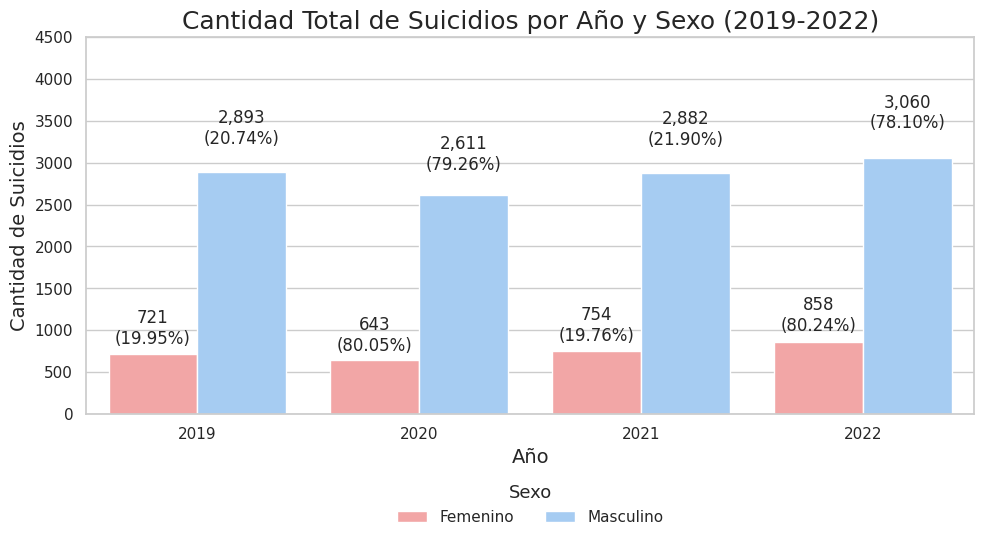

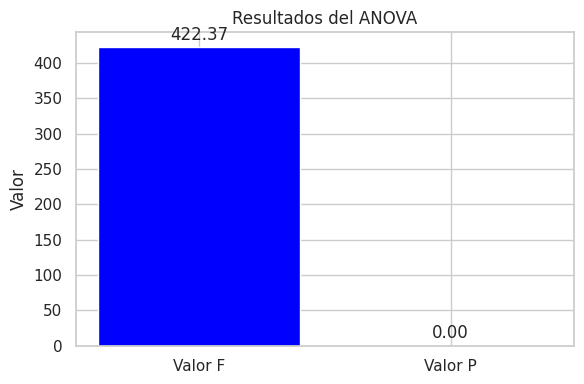

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in scalar divide
  return std / np.sqrt(self.sum_weights - 1)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


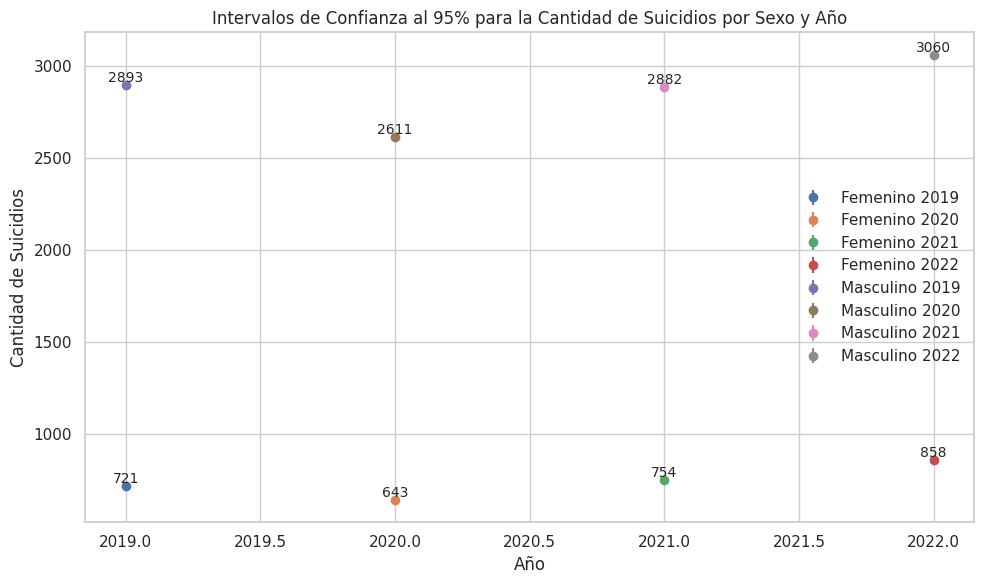

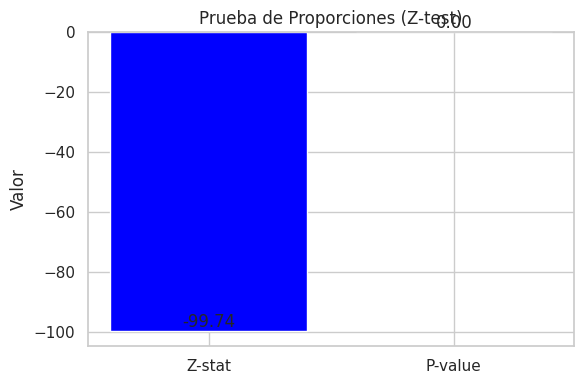

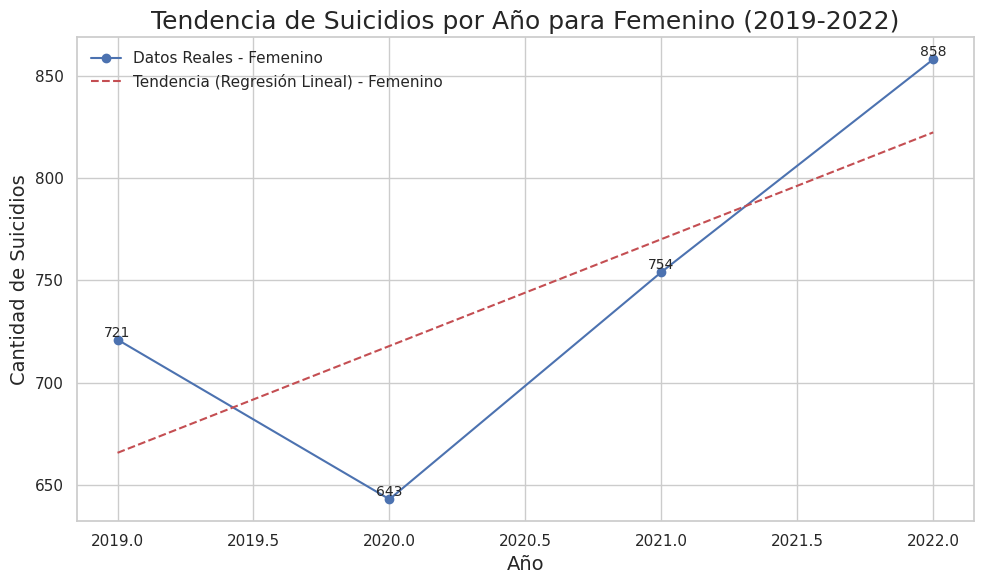

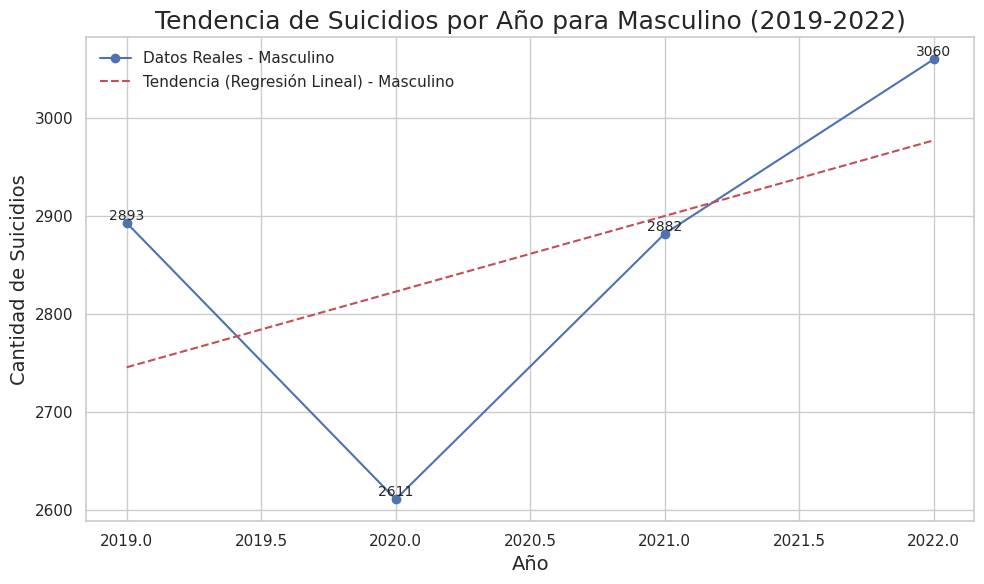

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar el DataFrame para solo incluir los años 2019, 2020, 2021 y 2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por año y sexo y sumar la cantidad de suicidios
suicidios_por_anio_sexo = df_filtered.groupby(['anio', 'suicida_sexo']).size().reset_index(name='cantidad_suicidios')

# Si hay categorías no definidas (e.g., 'Desconocido'), podríamos querer filtrarlas
suicidios_por_anio_sexo = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'].isin(['Femenino', 'Masculino'])]

# Calcular el total de suicidios por año para calcular los porcentajes
suicidios_por_anio_sexo['total_suicidios'] = suicidios_por_anio_sexo.groupby('anio')['cantidad_suicidios'].transform('sum')
suicidios_por_anio_sexo['porcentaje'] = (suicidios_por_anio_sexo['cantidad_suicidios'] / suicidios_por_anio_sexo['total_suicidios']) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='anio', y='cantidad_suicidios', hue='suicida_sexo', data=suicidios_por_anio_sexo, palette=['#ff9999', '#99ccff'], ax=ax)

# Ajustar el rango del eje vertical
ax.set_ylim(0, 4500)

# Añadir etiquetas de datos en cada barra con el porcentaje
for i, p in enumerate(ax.patches):
    # Obtener la cantidad y el porcentaje correspondiente
    cantidad = int(p.get_height())
    if cantidad > 0:
        porcentaje = suicidios_por_anio_sexo.iloc[i]['porcentaje']
        # Ajustar la posición vertical para evitar superposición
        ax.annotate(f'{cantidad:,}\n({porcentaje:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height() + (p.get_height() * 0.1)),  # Ajuste de la posición vertical
                    ha='center', va='bottom',
                    fontsize=12)

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Cantidad Total de Suicidios por Año y Sexo (2019-2022)', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Suicidios', fontsize=14)

# Mover la leyenda fuera del área del gráfico, debajo de la gráfica
ax.legend(title='Sexo', title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para evitar superposiciones
plt.show()

# ---------------- Análisis de Varianza (ANOVA) ---------------- #
# Aplicar ANOVA unidireccional para comparar las medias de suicidios por año y sexo
f_value, p_value = stats.f_oneway(
    *[suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo]['cantidad_suicidios'].values
      for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique()]
)

plt.figure(figsize=(6, 4))
plt.bar(['Valor F', 'Valor P'], [f_value, p_value], color=['blue', 'orange'])

# Añadir etiquetas a las barras
for i, v in enumerate([f_value, p_value]):
    plt.text(i, v + 5, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Resultados del ANOVA')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Intervalos de Confianza ---------------- #
# Calcular los intervalos de confianza para cada grupo de sexo por año
intervalos_confianza = {}
for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique():
    for anio in suicidios_por_anio_sexo['anio'].unique():
        data = suicidios_por_anio_sexo[(suicidios_por_anio_sexo['suicida_sexo'] == sexo) & (suicidios_por_anio_sexo['anio'] == anio)]['cantidad_suicidios']
        if len(data) > 0:
            ci = sms.DescrStatsW(data).tconfint_mean()
            intervalos_confianza[(sexo, anio)] = ci

# Graficar los intervalos de confianza
plt.figure(figsize=(10, 6))
for (sexo, anio), ci in intervalos_confianza.items():
    data_mean = suicidios_por_anio_sexo[(suicidios_por_anio_sexo['suicida_sexo'] == sexo) & (suicidios_por_anio_sexo['anio'] == anio)]['cantidad_suicidios'].mean()
    plt.errorbar(anio, data_mean, yerr=[[data_mean - ci[0]], [ci[1] - data_mean]], fmt='o', label=f'{sexo} {anio}')

# Añadir etiquetas de datos para cada punto
for (sexo, anio), ci in intervalos_confianza.items():
    data_mean = suicidios_por_anio_sexo[(suicidios_por_anio_sexo['suicida_sexo'] == sexo) & (suicidios_por_anio_sexo['anio'] == anio)]['cantidad_suicidios'].mean()
    plt.text(anio, data_mean, f'{data_mean:.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Intervalos de Confianza al 95% para la Cantidad de Suicidios por Sexo y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Suicidios')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- Prueba de Proporciones (Z-test) ---------------- #
# Comparar las proporciones de suicidios entre los sexos
femenino_count = suicidios_por_anio_sexo.loc[suicidios_por_anio_sexo['suicida_sexo'] == 'Femenino', 'cantidad_suicidios'].sum()
masculino_count = suicidios_por_anio_sexo.loc[suicidios_por_anio_sexo['suicida_sexo'] == 'Masculino', 'cantidad_suicidios'].sum()
total_suicidios = suicidios_por_anio_sexo['cantidad_suicidios'].sum()

z_stat, p_val = sms.proportions_ztest([femenino_count, masculino_count], [total_suicidios, total_suicidios])

plt.figure(figsize=(6, 4))
plt.bar(['Z-stat', 'P-value'], [z_stat, p_val], color=['blue', 'orange'])

# Añadir etiquetas a las barras
for i, v in enumerate([z_stat, p_val]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Prueba de Proporciones (Z-test)')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Análisis de Tendencia ---------------- #
# Aplicar una regresión lineal para ver la tendencia de suicidios por sexo y año
for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique():
    data = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo]
    X = data['anio'].values.reshape(-1, 1)
    y = data['cantidad_suicidios'].values
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    plt.figure(figsize=(10, 6))
    plt.plot(data['anio'], y, marker='o', linestyle='-', color='b', label=f'Datos Reales - {sexo}')
    plt.plot(data['anio'], y_pred, linestyle='--', color='r', label=f'Tendencia (Regresión Lineal) - {sexo}')

    # Añadir etiquetas de datos para cada punto de la tendencia
    for i in range(len(y)):
        plt.text(X[i], y[i], f'{y[i]:.0f}', ha='center', va='bottom', fontsize=10)

    plt.title(f'Tendencia de Suicidios por Año para {sexo} (2019-2022)', fontsize=18)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Cantidad de Suicidios', fontsize=14)
    plt.legend()
    plt.tight_layout()



### 1. Cantidad Total de Suicidios por Año y Sexo (2019-2022)

La visualización desglosa los suicidios por año y sexo, mostrando que la proporción entre hombres y mujeres que se mantiene constante a lo largo de los años. En 2020, se observa una disminución general en la cantidad de suicidios en ambos sexos, pero esta cifra se recupera y aumenta en 2021 y 2022.

**Interpretación:**
En consistencia con los análisis anteriores, la disminución en 2020 podría estar relacionada con factores como el impacto inicial de la pandemia de COVID-19, que pudo haber modificado temporalmente los comportamientos sociales y la movilidad, reduciendo ciertos factores de riesgo. Sin embargo, el incremento en los años siguientes refuerza la sugerencia de que el encierro y las medidas de restricción aplicadas para combatir la pandemia pudieron haber tenido un efecto detractor en la incidencia del fenómeno del suicidio.

### 3. Intervalos de Confianza al 95% para la Cantidad de Suicidios por Sexo y Año

Respecto a los intervalos de confianza para la cantidad de suicidios por año y sexo, se observa que son bastante ajustados, lo que sugiere estabilidad en las cifras reportadas, pero también indica que la disparidad entre sexos es consistente.

La consistencia de los intervalos de confianza refuerza la idea de que las diferencias observadas no son producto del azar, sino que reflejan tendencias reales en la población. El hecho de que los intervalos sean más bajos para las mujeres indica una mayor variabilidad en los números absolutos, lo que puede ser debido a su menor incidencia.

### 4. Prueba de Proporciones (Z-test)

La prueba de proporciones (Z-test) muestra un valor Z de -99.74, lo que indica una diferencia altamente significativa entre las proporciones de suicidios entre hombres y mujeres.

Un valor Z tan extremo puede indicar que la probabilidad de que la diferencia observada sea por azar es extremadamente baja, consolidando la hipótesis de que existe una disparidad significativa en la distribución de suicidios entre hombres y mujeres. Este resultado es coherente con los patrones de género observados globalmente.

### 5. Tendencia de Suicidios por Año para Femenino (2019-2022)

La visualización de la tendencia de suicidios para mujeres muestra un descenso en 2020, seguido de un incremento constante en 2021 y 2022. La línea de tendencia (regresión lineal) indica una proyección de aumento en el futuro si las condiciones actuales persisten.

El descenso en 2020 puede estar relacionado con factores como el impacto inicial del confinamiento, pero el aumento posterior podría estar vinculado a las secuelas de la pandemia, como la crisis económica, el aislamiento social prolongado, y el aumento de la carga familiar y laboral, que afectaron desproporcionadamente a las mujeres, según otras fuentes oficiales. La línea de tendencia sugiere la necesidad de intervención para revertir esta posible escalada y complementar dichos hallazgos con estudios complementarios.

### 6. Tendencia de Suicidios por Año para Masculino (2019-2022)

Similar a la tendencia femenina, la visualización para hombres muestra una caída en 2020 seguida de un fuerte repunte en los años siguientes. La regresión lineal proyecta un incremento continuo.

**Interpretación:**
El patrón observado en hombres podría reflejar una combinación de factores especulativos: la pérdida de empleo o ingresos, la presión por mantener a la familia durante la pandemia, y la mayor reticencia a buscar ayuda psicológica. La tendencia ascendente proyectada sugiere que, sin intervenciones adecuadas, las tasas de suicidio en hombres podrían continuar en aumento.

**Conclusión General:**

Las visualizaciones presentan un panorama alarmante de la situación del suicidio en Argentina, especialmente cuando se desagrega por sexo. La mayor proporción de suicidios entre hombres sugiere la necesidad de políticas específicas de salud mental que aborden los factores de riesgo que afectan a este grupo. Al mismo tiempo, el repunte en las tasas de suicidio en los últimos años, particularmente tras el año 2020, confirma cierta influencia del encierro sobre la disminución observada en los suicidios y subraya la urgencia de intervenciones que consideren los efectos a largo plazo de la pandemia, incluyendo el apoyo económico, social y psicológico, tanto para hombres como para mujeres. Cabe destacar que en términos de sexo de las víctimas, las proporciones de la incidencia del suicidio se mantiene mas o menos constante, a pesar de las medidas de encierro.

Una siguiente caracterización pertinente nos parecen los tramos de edad, para corroborar si existe algún patrón observarble respecto a grupos etarios particularmente vulnerables a la comisión del suicidio.

<ipython-input-53-5e51d61bd5f5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Tramo de Edad', y='Cantidad de Suicidios', data=suicidios_por_edad, palette=pastel_colors, errorbar=None)


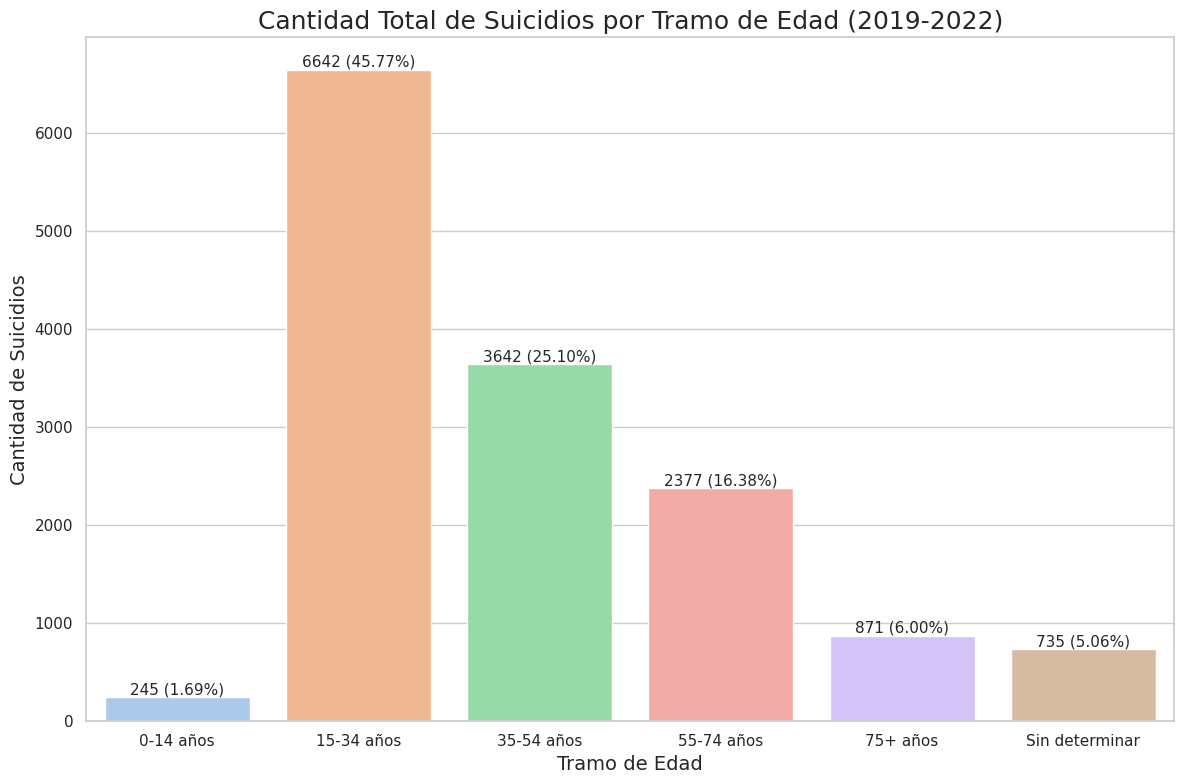

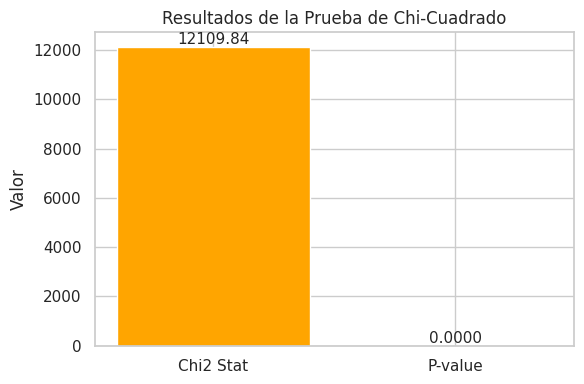

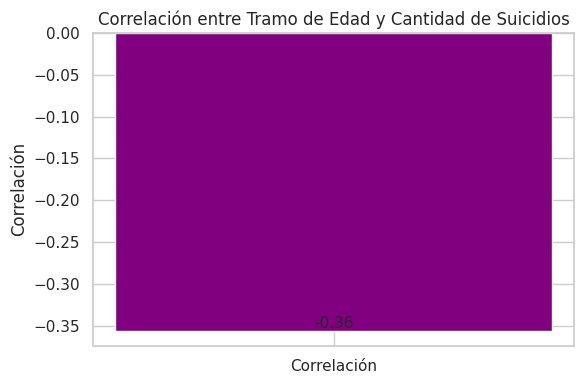

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar los datos para los años 2019-2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por tramo de edad y contar la cantidad de suicidios
suicidios_por_edad = df_filtered.groupby('edad_categoria')['id_hecho'].count().reset_index()

# Renombrar las columnas para mayor claridad
suicidios_por_edad.columns = ['Tramo de Edad', 'Cantidad de Suicidios']

# Calcular el porcentaje de suicidios por tramo de edad
suicidios_por_edad['Porcentaje'] = (suicidios_por_edad['Cantidad de Suicidios'] / suicidios_por_edad['Cantidad de Suicidios'].sum()) * 100

# Ordenar por tramo de edad, si lo prefieres
suicidios_por_edad = suicidios_por_edad.sort_values(by='Tramo de Edad')

# Crear una paleta de colores pastel para cada tramo de edad
pastel_colors = sns.color_palette("pastel", len(suicidios_por_edad))

# Crear el gráfico de barras con la paleta de colores pastel
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Tramo de Edad', y='Cantidad de Suicidios', data=suicidios_por_edad, palette=pastel_colors, errorbar=None)

# Añadir etiquetas de datos con la cantidad y el porcentaje
for i, p in enumerate(bar_plot.patches):
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
             f"{suicidios_por_edad['Cantidad de Suicidios'].iloc[i]} ({suicidios_por_edad['Porcentaje'].iloc[i]:.2f}%)",
             ha="center", va="bottom", fontsize=11)

plt.title('Cantidad Total de Suicidios por Tramo de Edad (2019-2022)', fontsize=18)
plt.xlabel('Tramo de Edad', fontsize=14)
plt.ylabel('Cantidad de Suicidios', fontsize=14)
plt.xticks(rotation=0)  # Para mantener las etiquetas en horizontal
plt.tight_layout()
plt.show()

# ---------------- Prueba de Chi-Cuadrado ---------------- #
chi2_stat, p_val = stats.chisquare(f_obs=suicidios_por_edad['Cantidad de Suicidios'])

plt.figure(figsize=(6, 4))
plt.bar(['Chi2 Stat', 'P-value'], [chi2_stat, p_val], color=['orange', 'orange'])

# Añadir etiquetas de datos
plt.text(0, chi2_stat, f"{chi2_stat:.2f}", ha='center', va='bottom', fontsize=11)
plt.text(1, p_val, f"{p_val:.4f}", ha='center', va='bottom', fontsize=11)

plt.title('Resultados de la Prueba de Chi-Cuadrado')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Análisis de Correlación ---------------- #
# Evaluar la correlación entre el tramo de edad (convertido a números) y la cantidad de suicidios
suicidios_por_edad['Tramo de Edad Numérico'] = range(len(suicidios_por_edad))  # Asignar números a cada tramo

correlacion = suicidios_por_edad[['Tramo de Edad Numérico', 'Cantidad de Suicidios']].corr().iloc[0, 1]

plt.figure(figsize=(6, 4))
plt.bar(['Correlación'], [correlacion], color='purple')

# Añadir etiqueta de datos
plt.text(0, correlacion, f"{correlacion:.2f}", ha='center', va='bottom', fontsize=11)

plt.title('Correlación entre Tramo de Edad y Cantidad de Suicidios')
plt.ylabel('Correlación')
plt.tight_layout()
plt.show()


Sin ningún cruce con otra variable, los datos de la distribuicipon de los suicidios para el período analizado, muestran los siguientes hallazgos:

### 1. **Distribución de Suicidios por Tramo de Edad (2019-2022)**
   - El análisis de la distribución de los suicidios por tramo de edad revela que el grupo de 15-34 años es el más afectado, representando el 45.77% del total de suicidios durante el período analizado. Dado el contexto de la pandemia de COVID-19, se pudieron haber exacerbado las tensiones sociales y económicas que afectan usualmente esta franja etaria. Los jóvenes y adultos jóvenes, enfrentando incertidumbre en educación, empleo, y vida social, pudieron haber sido especialmente vulnerables a la modificación en las condiciones económicas que implicaron las medidas de distanciamiento social impuestas por el gobierno argentino.
   - El segundo grupo más afectado es el de 35-54 años, con un 25.10% de los suicidios. Este grupo también suele verse afectado por responsabilidades familiares y laborales importantes, y debido a dichas restricciones pudo haber experimentado un aumento en el estrés y la ansiedad debido a las condiciones de la pandemia y la situación económica, lo que se refleja en las variaciones de las cifras de suicidios.

### 2. **Menor Incidencia en los Extremos de Edad**
   - Los extremos de edad, es decir, los grupos de 0-14 años y 75+ años, presentan las tasas más bajas de suicidios. Esto podría interpretarse como una mayor protección o resiliencia en estos grupos, posiblemente debido a redes de apoyo más fuertes o menores niveles de estrés relacionado con las políticas de encierro.

### 3. **Fuerte impacto en Jóvenes**
   - Los resultados parecen apoyar la idea de que la pandemia y las políticas de encierro afectaron con mayor incidencia la salud mental y seguridad económica de los grupos más jóvenes. Las restricciones en actividades sociales, educativas, y laborales, junto con la incertidumbre económica, probablemente incrementaron el riesgo de suicidio en este grupo. Este hallazgo subraya la necesidad de políticas específicas que atiendan las necesidades de los jóvenes en situaciones de crisis.

### 4. **Cambio en las Dinámicas Familiares y Laborales**
   - El incremento en los suicidios en el grupo de 35-54 años podría estar relacionado con el estrés adicional provocado por las nuevas dinámicas laborales (como el teletrabajo) y las responsabilidades familiares durante la pandemia.

### 5. **Prueba de Chi-Cuadrado**
   - La prueba de Chi-Cuadrado muestra un valor Chi2 extremadamente alto de 12109.84 con un valor p de 0.0000, lo que indica una diferencia significativa en la distribución de los suicidios por tramo de edad. Este resultado refuerza la idea de que las tasas de suicidio no son uniformes entre los distintos grupos etarios, sino que existen diferencias marcadas que merecen una atención detallada. La significancia estadística sugiere que ciertos grupos de edad experimentan tasas de suicidio significativamente diferentes en comparación con otros, lo cual es un indicativo de la influencia de factores demográficos específicos.

   ### 6. **Correlación entre Tramo de Edad y Cantidad de Suicidios**
   - La correlación negativa de -0.36 entre el tramo de edad y la cantidad de suicidios indica una tendencia moderada en la que, a medida que aumenta la edad, la cantidad de suicidios tiende a disminuir. Aunque esta correlación no es muy fuerte, sí sugiere que los suicidios son más frecuentes en los grupos etarios más jóvenes. Este hallazgo podría estar relacionado con factores como la presión social, la inestabilidad económica, y el aislamiento social, que pueden ser más pronunciados entre los jóvenes.

### **Conclusiones
   - La combinación de los resultados de la prueba de Chi-Cuadrado, la correlación y el análisis por tramo de edad refuerza la hipótesis de que las políticas sanitarias durante la pandemia han tenido un impacto significativo en las tasas de suicidio, especialmente entre los jóvenes y adultos jóvenes.



   Paara continuar profundizando nuestra indagación exploratoria, procederemos a desagregar los hechos de suicidio según tramos de edad, también por año, para observar si notamos alguna particular respecto a los años donde sucedieron las medidas sanitarias respecto de los que no.

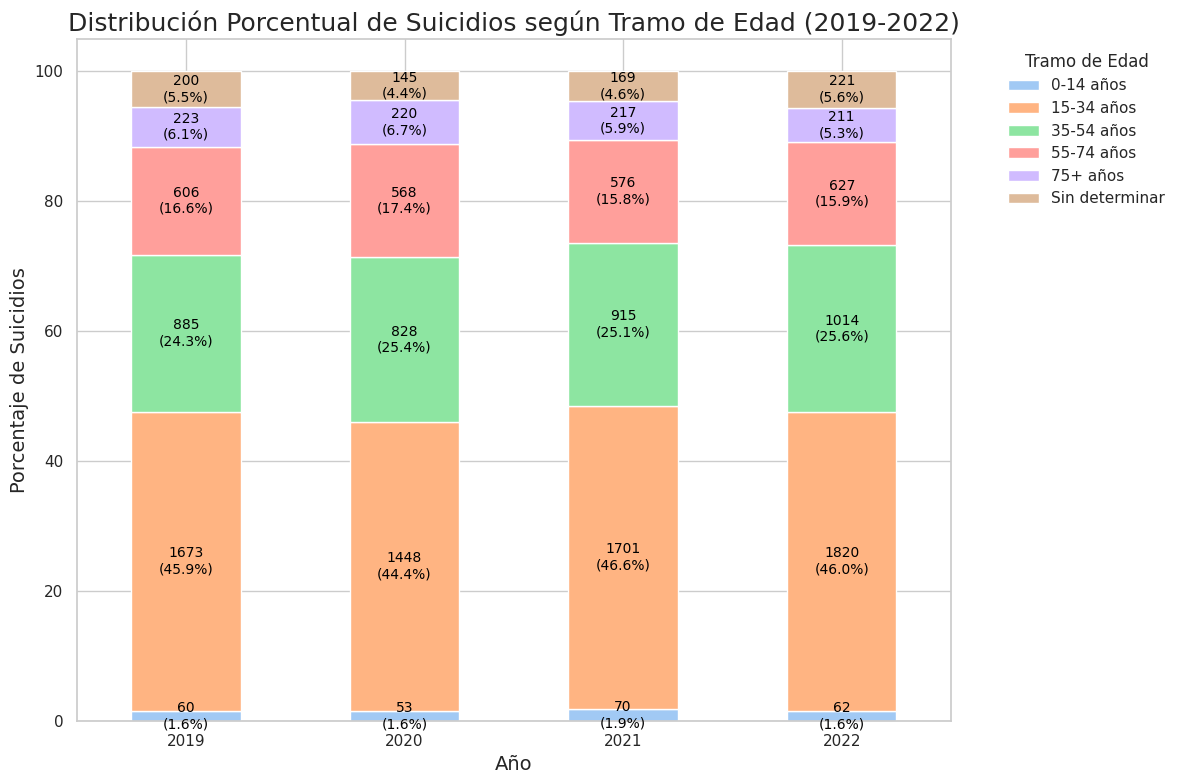

   Estadístico Chi-Cuadrado   Valor p  Grados de Libertad
0                 22.119904  0.104698                  15


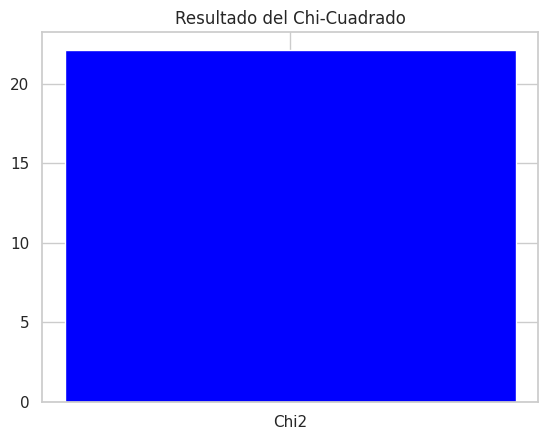

Matriz de correlación:
edad_categoria  0-14 años  15-34 años  35-54 años  55-74 años  75+ años  \
edad_categoria                                                            
0-14 años        1.000000    0.678500    0.507718    0.116612 -0.341856   
15-34 años       0.678500    1.000000    0.934298    0.803038 -0.636396   
35-54 años       0.507718    0.934298    1.000000    0.811820 -0.853510   
55-74 años       0.116612    0.803038    0.811820    1.000000 -0.488291   
75+ años        -0.341856   -0.636396   -0.853510   -0.488291  1.000000   
Sin determinar   0.281878    0.882236    0.839261    0.983191 -0.470192   

edad_categoria  Sin determinar  
edad_categoria                  
0-14 años             0.281878  
15-34 años            0.882236  
35-54 años            0.839261  
55-74 años            0.983191  
75+ años             -0.470192  
Sin determinar        1.000000  


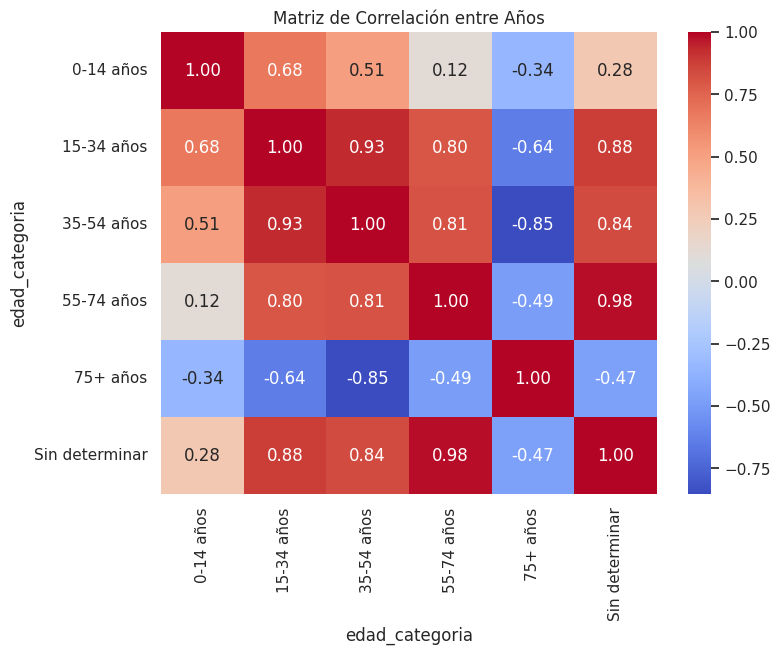

edad_categoria  0-14 años  15-34 años  35-54 años  55-74 años  75+ años  \
edad_categoria                                                            
0-14 años        1.000000    0.678500    0.507718    0.116612 -0.341856   
15-34 años       0.678500    1.000000    0.934298    0.803038 -0.636396   
35-54 años       0.507718    0.934298    1.000000    0.811820 -0.853510   
55-74 años       0.116612    0.803038    0.811820    1.000000 -0.488291   
75+ años        -0.341856   -0.636396   -0.853510   -0.488291  1.000000   
Sin determinar   0.281878    0.882236    0.839261    0.983191 -0.470192   

edad_categoria  Sin determinar  
edad_categoria                  
0-14 años             0.281878  
15-34 años            0.882236  
35-54 años            0.839261  
55-74 años            0.983191  
75+ años             -0.470192  
Sin determinar        1.000000  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Filtrar los datos para los años 2019-2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por año y tramo de edad, y contar la cantidad de suicidios
suicidios_por_edad_anio = df_filtered.groupby(['anio', 'edad_categoria'])['id_hecho'].count().unstack().fillna(0)

# Normalizar los valores para que cada barra represente el 100%
suicidios_por_edad_anio_percent = suicidios_por_edad_anio.div(suicidios_por_edad_anio.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas al 100% utilizando colores pastel
fig, ax = plt.subplots(figsize=(12, 8))
pastel_colors = sns.color_palette("pastel", len(suicidios_por_edad_anio.columns))
suicidios_por_edad_anio_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=pastel_colors, ax=ax)

# Añadir anotaciones de porcentajes y valores nominales
for i, (anio, row) in enumerate(suicidios_por_edad_anio.iterrows()):  # Iterar sobre los años y las filas
    cumulative_sum = 0  # Suma acumulativa para posicionar las anotaciones
    total_suicidios = row.sum()

    for j, (edad, value) in enumerate(row.items()):  # Iterar sobre los tramos de edad y sus valores
        percentage = (value / total_suicidios) * 100
        cumulative_sum += percentage

        if value > 0:  # Solo anotar valores positivos
            ax.text(i, cumulative_sum - percentage/2, f"{int(value)}\n({percentage:.1f}%)",
                    ha='center', va='center', fontsize=10, color='black')

plt.title('Distribución Porcentual de Suicidios según Tramo de Edad (2019-2022)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje de Suicidios', fontsize=14)
plt.xticks(rotation=0)  # Mantener las etiquetas del eje x en horizontal
plt.legend(title='Tramo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

# Realizar la prueba de Chi-Cuadrado
chi2_stat, p_val, dof, ex = chi2_contingency(suicidios_por_edad_anio)

# Mostrar el resultado del Chi-Cuadrado en una tabla
chi2_df = pd.DataFrame({
    "Estadístico Chi-Cuadrado": [chi2_stat],
    "Valor p": [p_val],
    "Grados de Libertad": [dof]
})
print(chi2_df)

# Visualizar resultados del Chi-Cuadrado
fig, ax = plt.subplots()
ax.bar(['Chi2'], [chi2_stat], color='blue')
ax.set_title('Resultado del Chi-Cuadrado')
plt.show()

# Análisis de correlación
correlation_matrix = suicidios_por_edad_anio.corr()

# Mostrar la matriz de correlación en una tabla
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Años")
plt.show()

# Crear una tabla con la matriz de correlación
correlation_df = correlation_matrix
print(correlation_df)


A partir de la visualizaciones generadas y los datos resultantes podemos decir:


### 1. **Predominio del Tramo de Edad 15-34 años**
El análisis muestra que el tramo de edad de 15-34 años es consistentemente el grupo con la mayor proporción de suicidios, representando entre el 44.4% y el 46.6% del total anual. Este dato refuerza la noción de una particular vulnerabilidad de este grupo etario, especialmente en el contexto de las restricciones asociadas a la pandemia de COVID-19.

### 2. **Aumento del Tramo de Edad 35-54 años**
El segundo grupo más afectado sigue siendo el grupo etareo que comprende a los suicidas de entre 35-54 años, que contribuye con aproximadamente un 24.3% a 25.6% del total de suicidios anuales. Refuerza nuestras especulaciones anteriores de que generalmente enfrenta responsabilidades laborales y familiares y podría haber experimentado un aumento en el estrés durante los años de pandemia, lo que se refleja en su significativa contribución a las cifras de suicidios.

### 3. **Estabilidad en los Grupos de Edad más Avanzada (55-74 años y 75+ años)**
Los grupos de edad de 55-74 años y 75+ años presentan porcentajes de suicidios más bajos en comparación con los grupos más jóvenes, manteniéndose en torno al 15-17% y 4-6%, respectivamente, coincidente con el análisis anterior.

### 4. **Baja Incidencia en el Grupo de 0-14 años**
El grupo de 0-14 años muestra la menor incidencia de suicidios, con un porcentaje que oscila entre el 1.6% y el 1.9% durante el período analizado. Este bajo porcentaje es esperable, dado que los niños y preadolescentes suelen estar, por ejemplo, bajo la supervisión directa de sus cuidadores, quienes pueden intervenir en situaciones de riesgo. No obstante, existen casos de suicidio en este grupo etario y ello subraya la necesidad de continuar monitoreando y desarrollando programas de apoyo psicológico y de inserción social para los grupos más jóvenes.

### 6. **Comparación Interanual**
A lo largo de los años 2019-2022, se observa una relativa estabilidad en la distribución porcentual de suicidios por tramo de edad. No obstante, la ligera variación en el porcentaje de suicidios en los grupos más jóvenes (15-34 años) podría reflejar fluctuaciones en la percepción del riesgo y el acceso a recursos de salud mental y al mundo del trabajo, especialmente durante la pandemia.

### **Prueba de Chi-Cuadrado**
El valor del estadístico Chi-Cuadrado es 22.12 con un valor p de 0.1047 y 15 grados de libertad. Este resultado indica que no hay una diferencia estadísticamente significativa en la distribución de suicidios por tramo de edad entre los años analizados. Aunque las variaciones entre los años no alcanzan el umbral de significancia estadística, la consistencia en las proporciones sugiere patrones estables en la distribución de suicidios a lo largo de estos años.

### **Matriz de Correlación**
La matriz de correlación revela fuertes relaciones entre ciertos tramos de edad. Por ejemplo, la correlación entre los tramos de 15-34 años y 35-54 años es muy alta (r=0.93), lo que sugiere que las tendencias de suicidios en estos grupos de edad están estrechamente relacionadas. Por otro lado, el tramo de edad de 75+ años muestra correlaciones negativas o bajas con otros grupos de edad, como -0.34 con el grupo de 0-14 años y -0.64 con el de 15-34 años. Esto podría indicar que los factores que influyen en los suicidios en los grupos de edad más jóvenes y más viejos son diferentes.

### **Conclusiones**
En resumen, aunque no se observan diferencias estadísticamente significativas en la distribución de suicidios por tramo de edad a lo largo de los años y las correlaciones entre ciertos tramos de edad indican que las tendencias de suicidio en ciertos grupos pueden estar interrelacionadas. Los resultados enfatizan la necesidad de enfoques de intervención específicos, especialmente para los grupos de edad de 15-34 y 35-54 años, donde se observan las correlaciones más fuertes y las mayores tasas de suicidios. Además, la relativa estabilidad en los grupos de mayor edad subraya la importancia de continuar apoyando a estas poblaciones, asegurando que cuenten con acceso a servicios de salud y apoyo social adecuados para mantener su bienestar emocional.

##Conclusiones y recomendaciones generales del EDA:##

El análisis exhaustivo de las tasas de suicidio en Argentina durante el período 2019-2022 revela patrones significativos que expresan la presencia de cierta la influencia de la pandemia de COVID-19 y las medidas de confinamiento en la salud mental de la población analizada. Los resultados destacan las siguientes conclusiones clave:

1. **Impacto de la Pandemia en los Suicidios:**
   - El análisis muestra una tendencia decreciente en los suicidios durante los primeros meses de la pandemia en 2020, posiblemente debido a la cohesión social inicial por la incertidumbre generada por el evento y las medidas de confinamiento estricto promovidas por el gobierno de turno. Sin embargo, los datos indican un repunte en las tasas de suicidio en los años posteriores (2021 y 2022), lo que uede sugirir un efecto acumulativo de la crisis sanitaria, económica y social sobre la salud mental de la poblaciónen general.

2. **Disparidades de Género:**
   - Los hombres constituyen la gran mayoría de los suicidios en Argentina, representando alrededor del 79.36% de los casos, en comparación con el 20.64% de las mujeres. Esta disparidad resalta la necesidad de enfoques de prevención específicos que aborden los factores de riesgo particulares que afectan a los hombres, como los usualmente relevados en investigaciones similares que revelan la reticencia a buscar ayuda psicológica y apoyo comunitario, lo que podría explicar esta diferencia tan grande en los casos de suicidio.

3. **Vulnerabilidad de los Jóvenes:**
   - El grupo etario de 15-34 años es el más afectado por el suicidio, con casi la mitad de los suicidios anuales (45.77%). Este grupo enfrenta desafíos porpios de su grupo, como la incertidumbre laboral, el aislamiento social y las presiones económicas, todas condiciones que pudieron verse exacerbadas durante la pandemia. La necesidad de intervenciones dirigidas a este grupo resulta crítica debido a su contribución geneneral a la totalidad de los suicidios, como la promoción de programas de salud mental accesibles y soporte económico para estos sectores.

4. **Diferencias Regionales:**
   - Existen diferencias significativas en las tasas de suicidio entre las distintas regiones del país. El NOA y Cuyo presentan tasas alarmantemente altas, lo que podría estar relacionado con factores socioeconómicos, culturales y el acceso limitado a servicios de salud mental. En contraste, Buenos Aires y CABA, a pesar de ser las regiones más pobladas, muestran tasas más bajas, probablemente debido a mejores recursos y redes de apoyo. Resultaría necesario, además, profundizar el análisis y realizar comparativas entre provincias, por ejemplo, para detectar si no existen rasgos particulares de corte regional.


**Conclusión Final:**
Según nuestros hallazgos, las medidas sanitarias contra el COVID-19 han tenido una influencia de disminución en los casos de suicidio, lo cual se refuerza con la tendencia creciente que se observa posterior al levantamiento de las medidas de aislamiento. Aunque en terminos generales, los suicidios disminuyeron durante el encierro y continuaron con una tendencia creciente luego, las tendencias estructurales a nivel macro no se vieron modificadas por el encierro. Tanto la proporción de género como los grupos etareos se vieron levemente influidas por dicho confinamiento y serían preciso mayores análisis para precisar las variaciones observadas en el análisis. No así con las tasas regionales, que mostraron variaciones disparejas y resulta pertinente realizar analisis más focalizados en términos provinciales para realizar nuevos hallazgos que enriquezcan el análisis. Según nuestra opinión, resulta imperativo que se desarrollen y implementen políticas de salud mental y apoyo social que aborden las necesidades específicas de los distintos grupos etarios y regiones, con un enfoque particular en los jóvenes, los hombres y las áreas con menor acceso a servicios de salud mental.

Introducción al Modelado de Series Temporales para la Tasa de Suicidios
En esta sección, aplicaremos modelos de series temporales para realizar una predicción de la tasa de suicidios en Argentina, desglosada por región, género y grupo etario, utilizando datos históricos que abarcan el período de 2019 a 2022. Este análisis tiene como objetivo no solo observar tendencias pasadas, sino también proyectar posibles comportamientos futuros de la tasa de suicidios, lo cual es clave para entender cómo distintos factores demográficos y geográficos podrían influir en el fenómeno en los próximos años.

Objetivo del Análisis
El enfoque de esta sección es predecir la tasa de suicidios (medida en suicidios por cada 100,000 habitantes), utilizando datos históricos para identificar patrones y realizar una proyección a futuro. Para ello, emplearemos dos modelos de forecasting comparativos:

SARIMAX (Seasonal ARIMA with eXogenous variables), que permitirá capturar patrones estacionales en la tasa de suicidios y evaluar la influencia de variables adicionales.
Prophet, un modelo diseñado para detectar tendencias no lineales y estacionalidades complejas, que además permite incorporar variables adicionales o “regresores” para ajustar la predicción en función de factores específicos.
Variables del Análisis
Las siguientes variables serán utilizadas en el análisis para mejorar la precisión del forecasting y obtener una perspectiva detallada en función de factores demográficos y geográficos:

Tasa de suicidios: Calculada como la cantidad de suicidios por cada 100,000 habitantes para cada período.
Región: Cada provincia se agrupará en una de las seis regiones (NOA, NEA, Buenos Aires y CABA, Centro, Cuyo y Patagonia), permitiendo observar diferencias geográficas en la proyección de la tasa de suicidios.
Género: Desglosaremos la tasa de suicidios en función del género para identificar posibles variaciones entre hombres y mujeres.
Tramo de edad: Los datos se agruparán en categorías de edad, como 15-34 años, 35-54 años, y 55+ años, para observar cómo se comporta la tasa de suicidios en diferentes etapas de la vida.
Enfoque Comparativo
Compararemos los resultados de los modelos SARIMAX y Prophet en términos de precisión y capacidad de ajuste a los datos históricos. Esta comparación permitirá evaluar qué modelo se adapta mejor al análisis de la tasa de suicidios en función del tiempo, proporcionando una base sólida para futuras predicciones en políticas de salud pública y prevención.

El objetivo es obtener predicciones fiables de la tasa de suicidios en diferentes segmentos de la población, lo que permitirá entender mejor cómo los distintos factores interactúan en este fenómeno y brindar insights valiosos para el desarrollo de estrategias de intervención a nivel regional y demográfico.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

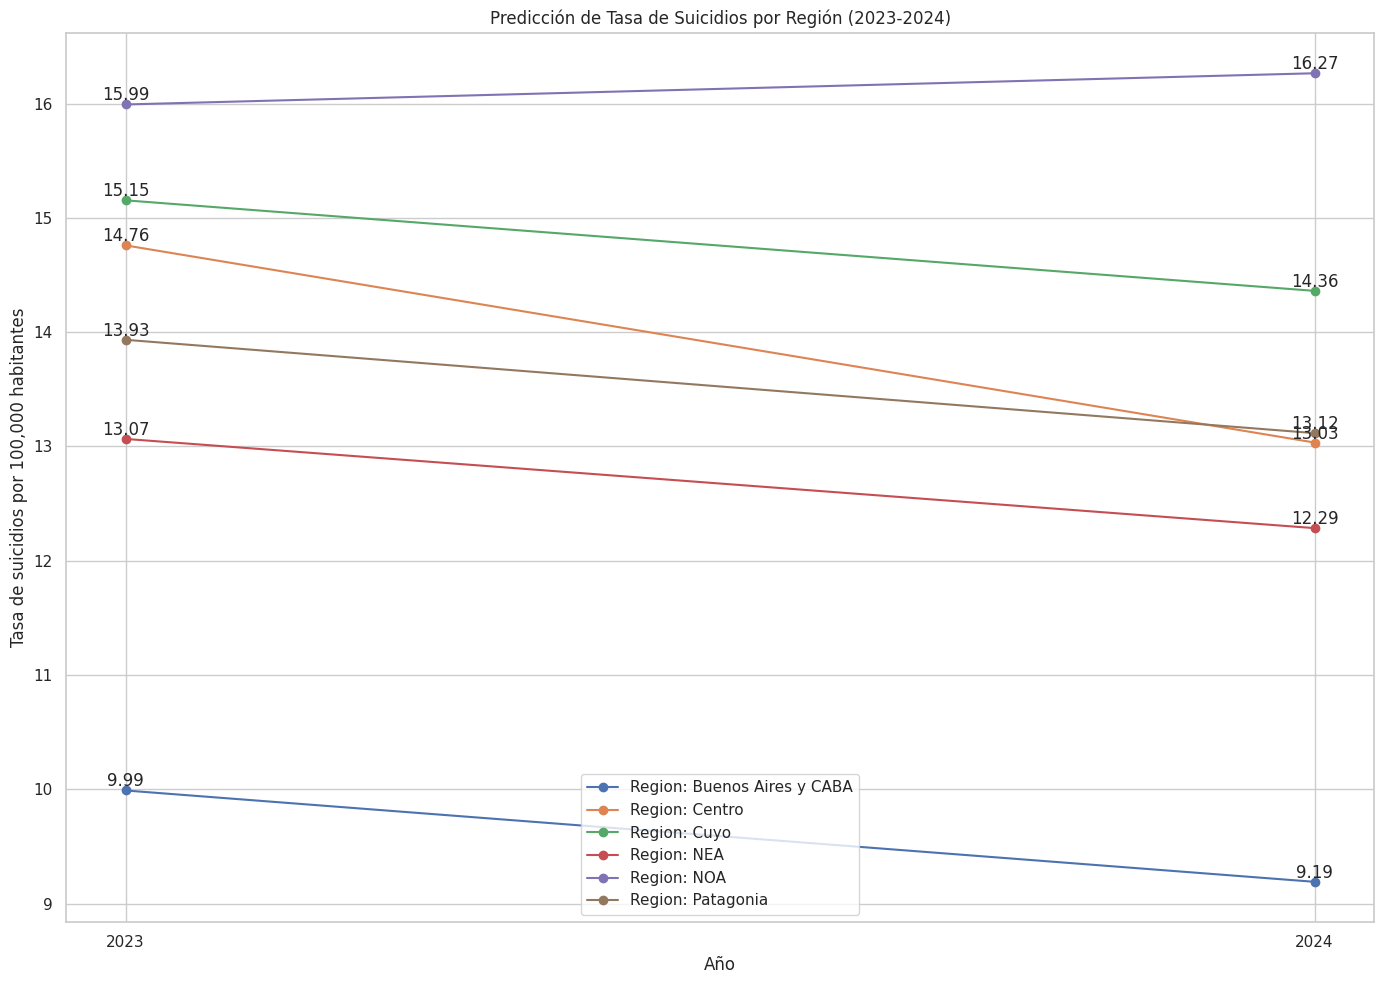

                region       MAE      RMSE
0  Buenos Aires y CABA  2.152990  3.077628
1               Centro  3.311055  5.073274
2                 Cuyo  2.948544  4.976616
3                  NEA  2.648635  4.287334
4                  NOA  2.799058  4.989223
5            Patagonia  2.977183  4.632581


<ipython-input-47-3d5ce4b8e03a>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='RMSE', data=metricas_df, palette='Blues')


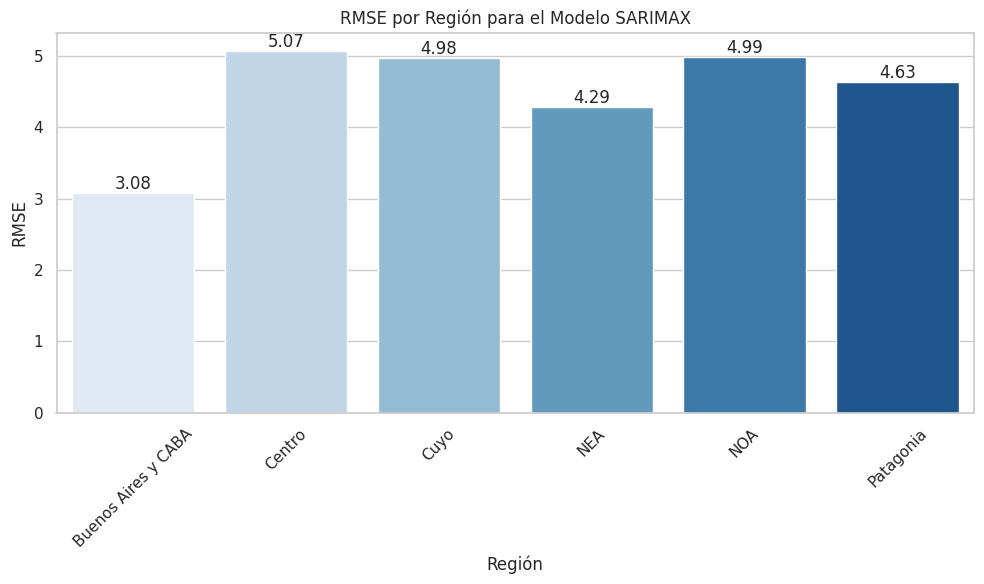

<ipython-input-47-3d5ce4b8e03a>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='MAE', data=metricas_df, palette='Oranges')


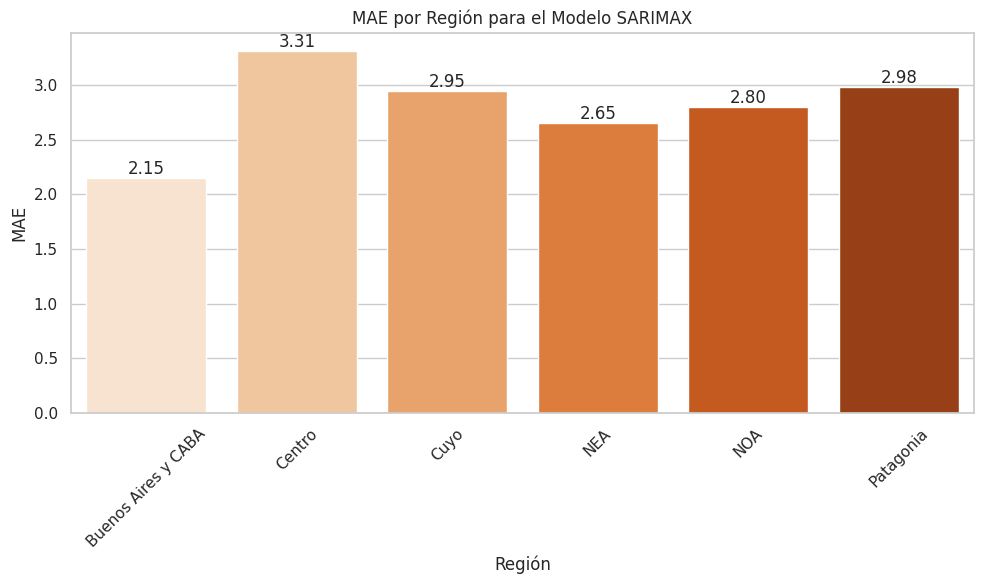

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'CABA'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego']
}

# Filtrar los datos entre 2019 y 2022
df_filtered = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_filtered['region'] = df_filtered['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar los datos por región y año, contando la cantidad de suicidios
suicidios_por_region_anio = df_filtered.groupby(['region', 'anio'])['id_hecho'].count().reset_index()

# Obtener la población única por provincia
poblacion_unica_por_provincia = df_filtered[['provincia_nombre_x', 'Población']].drop_duplicates()

# Asignar cada provincia a su respectiva región
poblacion_unica_por_provincia['region'] = poblacion_unica_por_provincia['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar la población total por región
poblacion_por_region = poblacion_unica_por_provincia.groupby('region')['Población'].sum().reset_index()

# Combinar la población con los datos de suicidios
suicidios_por_region_anio = suicidios_por_region_anio.merge(poblacion_por_region, on='region', how='left')

# Calcular la tasa anual de suicidios por cada 100,000 habitantes por región
suicidios_por_region_anio['tasa_anual'] = (suicidios_por_region_anio['id_hecho'] / suicidios_por_region_anio['Población']) * 100000

# Filtrar las regiones para el análisis de predicción
regiones_unicas = suicidios_por_region_anio['region'].unique()

# Iterar sobre cada región para crear un modelo SARIMAX y hacer predicciones
predicciones = {}
metricas = []
for region in regiones_unicas:
    # Filtrar los datos de la región actual
    datos_region = suicidios_por_region_anio[suicidios_por_region_anio['region'] == region].set_index('anio')

    # Crear el modelo SARIMAX
    try:
        modelo = SARIMAX(datos_region['tasa_anual'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
        resultado = modelo.fit(disp=False)
        # Hacer la predicción para 2023 y 2024
        prediccion = resultado.get_forecast(steps=2)
        predicciones[region] = prediccion.predicted_mean

        # Calcular métricas de evaluación (usando los datos de entrenamiento)
        tasa_predicha = resultado.fittedvalues
        mae = mean_absolute_error(datos_region['tasa_anual'], tasa_predicha)
        rmse = np.sqrt(mean_squared_error(datos_region['tasa_anual'], tasa_predicha))
        metricas.append({'region': region, 'MAE': mae, 'RMSE': rmse})
    except Exception as e:
        print(f"No se pudo ajustar el modelo para la región {region}: {e}")

# Mostrar las predicciones
def plot_predictions(predicciones):
    plt.figure(figsize=(14, 10))
    for region, prediccion in predicciones.items():
        plt.plot([2023, 2024], prediccion.values, marker='o', label=f'Region: {region}')
        for year, value in zip([2023, 2024], prediccion.values):
            plt.text(year, value, f'{value:.2f}', ha='center', va='bottom')
    plt.xlabel('Año')
    plt.ylabel('Tasa de suicidios por 100,000 habitantes')
    plt.title('Predicción de Tasa de Suicidios por Región (2023-2024)')
    plt.xticks([2023, 2024], labels=['2023', '2024'])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(predicciones)

# Mostrar las métricas de evaluación
metricas_df = pd.DataFrame(metricas)
print(metricas_df)

# Visualizar las métricas RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='RMSE', data=metricas_df, palette='Blues')
for index, value in enumerate(metricas_df['RMSE']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('RMSE por Región para el Modelo SARIMAX')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizar las métricas MAE
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='MAE', data=metricas_df, palette='Oranges')
for index, value in enumerate(metricas_df['MAE']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('MAE por Región para el Modelo SARIMAX')
plt.xlabel('Región')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Análisis de los resultados obtenidos en las visualizaciones

Respecto a estas visualizaciones y sus análisis estadísticos, podemos observar:

1. **Predicción de Tasa de Suicidios por Región (2023-2024)**:
   - El gráfico de predicción muestra una tendencia general en las tasas de suicidios para cada una de las regiones en el período de 2023-2024.
   - **Región NOA**: Se observa una tendencia al alza en la tasa de suicidios, lo cual es preocupante. Esto indica la necesidad de intervención con políticas preventivas y programas de apoyo psicológico para contrarrestar esta tendencia.
   - **Región Buenos Aires y CABA**: Se aprecia una tendencia decreciente, lo que podría reflejar que las políticas de prevención están siendo efectivas o que existen factores protectores que favorecen esta reducción.
   - **Otras regiones**: La mayoría de las demás regiones presentan una tendencia estable o ligeramente decreciente, lo cual es positivo. Sin embargo, los valores absolutos de las tasas siguen siendo altos, por lo que se deben reforzar las iniciativas de salud mental para continuar disminuyendo estas cifras.
   
   En general, estas predicciones proporcionan información valiosa para enfocar los esfuerzos en la reducción de las tasas de suicidio, permitiendo dirigir recursos y estrategias específicas hacia las regiones más afectadas.

2. **Métricas de Evaluación del Modelo SARIMAX: MAE y RMSE**:

   Las métricas utilizadas para evaluar el rendimiento del modelo SARIMAX son el **Error Absoluto Medio (MAE)** y el **Error Cuadrático Medio (RMSE)**.

   - **MAE (Mean Absolute Error)**: Mide el promedio de las desviaciones absolutas entre los valores reales y los valores predichos por el modelo. Indica cuánto se desvía, en promedio, cada predicción respecto al valor real. Un MAE más bajo implica predicciones más cercanas a los valores reales.
   - **RMSE (Root Mean Squared Error)**: Mide la raíz cuadrada de la media de los errores al cuadrado. Penaliza más los errores grandes, lo cual significa que es una métrica más sensible a las desviaciones extremas. Un RMSE más bajo indica una mejor precisión, especialmente cuando hay outliers.

   **Análisis de las Métricas por Región**:
   - **Región Buenos Aires y CABA**: Presenta el valor más bajo tanto en MAE (2.15) como en RMSE (3.08), lo cual indica que el modelo tiene una buena capacidad predictiva para esta región y que las predicciones son consistentes y cercanas a los valores reales.
   - **Región Centro**: Tiene los valores más altos de MAE (3.31) y RMSE (5.07), lo que muestra una mayor dificultad para predecir con precisión la tasa de suicidios. Esto sugiere la necesidad de ajustar o mejorar el modelo para esta región en particular.
   - **Región NOA**: Con un RMSE de 4.99 y un MAE de 2.80, muestra que el modelo tiene dificultades para ajustar las predicciones con exactitud. Los errores relativamente altos sugieren la existencia de factores que el modelo actual no está capturando adecuadamente.
   - **Otras Regiones (Patagonia, Cuyo, NEA, Desconocido)**: En general, presentan valores de MAE y RMSE intermedios, indicando que aunque el rendimiento del modelo es aceptable, aún hay margen de mejora.

   **Interpretación General de las Métricas**:
   - **Errores en las Predicciones**: Las regiones con valores altos de MAE y RMSE, como Centro y NOA, indican que el modelo tiene una menor capacidad para capturar patrones precisos en estas áreas. Sería recomendable investigar más a fondo e incluir otras variables explicativas para mejorar la precisión.
   - **Importancia del RMSE**: El RMSE más alto en algunas regiones señala la presencia de errores significativos que afectan la fiabilidad de las predicciones. Se deben enfocar esfuerzos en identificar posibles outliers o eventos extremos que afecten estas regiones.
   - **Comparación entre Regiones**: Las diferencias en las métricas de cada región reflejan la heterogeneidad en la distribución y causas de los suicidios en el país. Cada región presenta desafíos particulares que el modelo debe ser capaz de capturar para mejorar las predicciones.

3. **Conclusiones y Recomendaciones**:

   En general, el análisis revela que la tasa de suicidios en algunas regiones muestra una tendencia decreciente, mientras que otras, como la NOA, presentan un aumento. Las métricas de evaluación indican que el modelo tiene un rendimiento aceptable en algunas regiones, pero que necesita mejoras en otras para lograr una mayor precisión.

   Para mejorar el rendimiento del modelo se recomienda:

   - **Incluir más variables**: Incorporar factores como el desempleo, acceso a servicios de salud mental, niveles de pobreza, entre otros, que puedan ayudar a explicar mejor las tasas de suicidio en cada región.
   - **Ajustar el modelo SARIMAX**: Probar diferentes configuraciones de parámetros para mejorar el ajuste, especialmente en las regiones con mayores errores.
   - **Realizar análisis cualitativos**: Complementar el análisis cuantitativo con estudios cualitativos que permitan entender mejor los factores locales que influyen en las tasas de suicidio.

   Estas recomendaciones ayudarán a mejorar la capacidad predictiva del modelo y proporcionar información más precisa para las políticas públicas y estrategias de intervención en salud mental.

## **Uso del modelo SARIMAX aplicado a la tasa de suicidios según género**

Continuaremos el análisis aplicando el modelo SARIMAX para predecir la tasa de suicidios desagregada ahora por género, con el fin de identificar patrones y tendencias diferenciados entre hombres y mujeres en las distintas regiones de Argentina.

El modelo SARIMAX se ha elegido por su capacidad para capturar patrones temporales, estacionales y la influencia de otras variables exógenas que podrían tener un impacto en la evolución de la tasa de suicidios. Esto es especialmente relevante en un contexto donde factores como la pandemia, la crisis económica y otros eventos coyunturales podrían influir de manera distinta en hombres y mujeres.



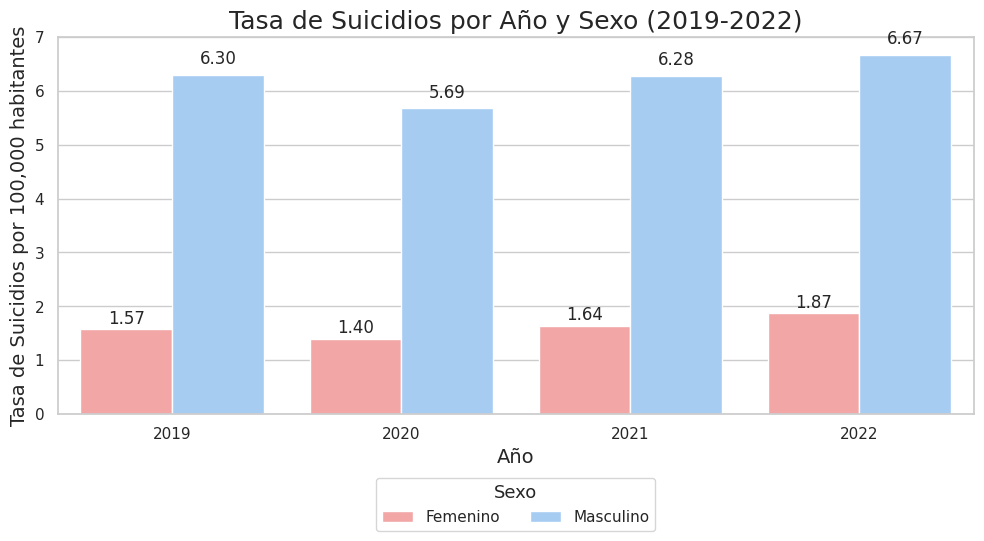

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting paramete

Género: Femenino
4    2.655131
5    2.485168
Name: predicted_mean, dtype: float64


Género: Masculino
4    9.819735
5    9.205253
Name: predicted_mean, dtype: float64




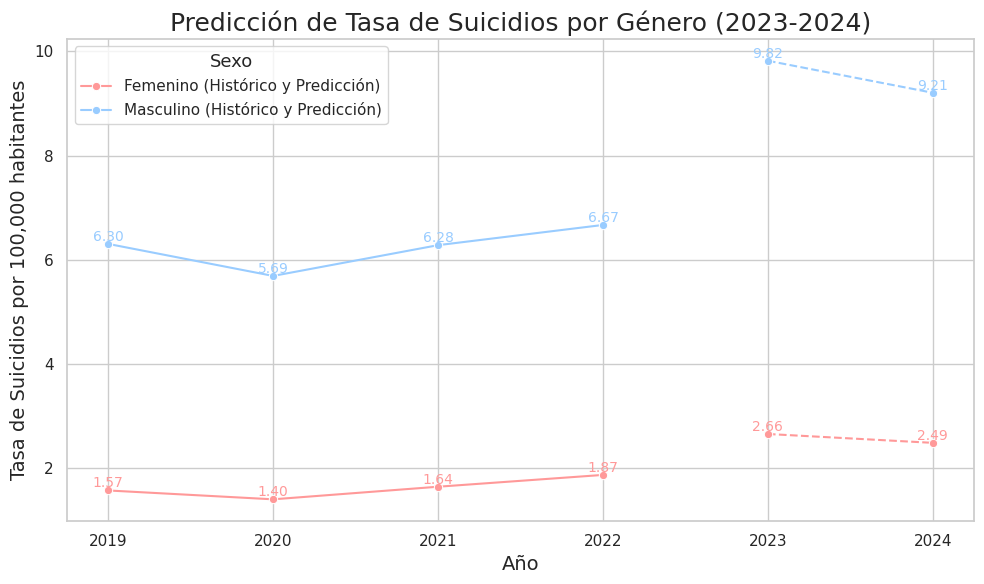

<ipython-input-55-e3d2f8a15a8b>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y='MAE', data=metricas_df, palette='Oranges', ax=axes[0])
<ipython-input-55-e3d2f8a15a8b>:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y='RMSE', data=metricas_df, palette='Blues', ax=axes[1])


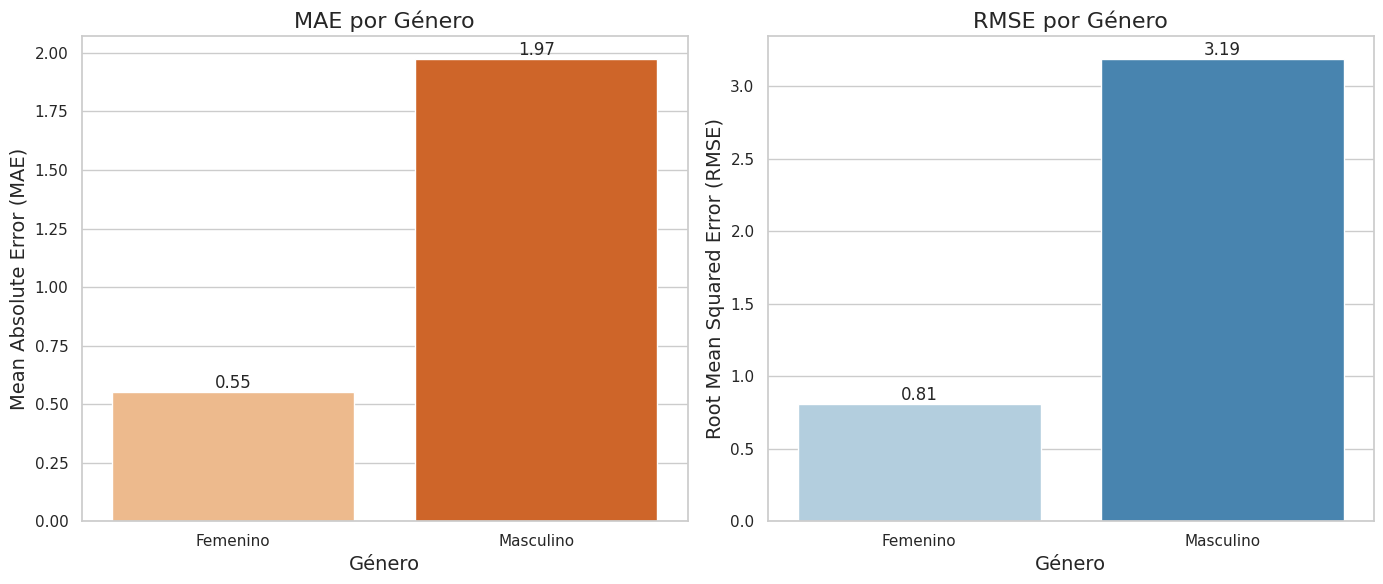

In [55]:
# Análisis del Total de Suicidios por Año y Tasa Nacional Desagregada por Género con Forecasting SARIMAX para 2023 y 2024

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Filtrar el DataFrame para solo incluir los años 2019, 2020, 2021 y 2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por año y sexo y sumar la cantidad de suicidios
suicidios_por_anio_sexo = df_filtered.groupby(['anio', 'suicida_sexo']).size().reset_index(name='cantidad_suicidios')

# Si hay categorías no definidas (e.g., 'Desconocido'), podríamos querer filtrarlas
suicidios_por_anio_sexo = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'].isin(['Femenino', 'Masculino'])]

# Calcular la población total (suma de la población de cada provincia)
poblacion_total = df_filtered['Población'].drop_duplicates().sum()

# Calcular la tasa de suicidios por cada 100,000 habitantes por año y sexo
suicidios_por_anio_sexo['tasa_suicidios'] = (suicidios_por_anio_sexo['cantidad_suicidios'] / poblacion_total) * 100000

# Crear el gráfico de barras para la tasa de suicidios por año y sexo
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='anio', y='tasa_suicidios', hue='suicida_sexo', data=suicidios_por_anio_sexo, palette=['#ff9999', '#99ccff'], ax=ax)

# Añadir etiquetas de datos en cada barra
for i, p in enumerate(ax.patches):
    # Obtener la tasa correspondiente
    tasa = p.get_height()
    if tasa > 0:
        # Ajustar la posición vertical para evitar superposición
        ax.annotate(f'{tasa:.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + (p.get_height() * 0.02)),  # Ajuste de la posición vertical
                    ha='center', va='bottom',
                    fontsize=12)

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Tasa de Suicidios por Año y Sexo (2019-2022)', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Tasa de Suicidios por 100,000 habitantes', fontsize=14)

# Mover la leyenda fuera del área del gráfico, debajo de la gráfica
ax.legend(title='Sexo', title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para evitar superposiciones
plt.show()

# ---------------- Forecasting con SARIMAX ---------------- #

# Configurar un diccionario para almacenar las predicciones y las métricas por género
predicciones = {}
metricas = {}

# Aplicar SARIMAX para cada género
for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique():
    try:
        # Filtrar los datos por género
        data_sexo = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo].set_index('anio')

        # Definir el modelo SARIMAX
        modelo = SARIMAX(data_sexo['tasa_suicidios'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))

        # Ajustar el modelo
        resultado = modelo.fit(disp=False)

        # Predecir los años 2023 y 2024
        prediccion = resultado.get_forecast(steps=2)
        predicciones[sexo] = prediccion.predicted_mean

        # Calcular las métricas de error (MAE y RMSE)
        mae = mean_absolute_error(data_sexo['tasa_suicidios'], resultado.fittedvalues)
        rmse = mean_squared_error(data_sexo['tasa_suicidios'], resultado.fittedvalues, squared=False)
        metricas[sexo] = {'MAE': mae, 'RMSE': rmse}
    except Exception as e:
        print(f"No se pudo ajustar el modelo para el género {sexo}: {e}")

# Mostrar las predicciones para 2023 y 2024
for sexo, prediccion in predicciones.items():
    print(f"Género: {sexo}")
    print(prediccion)
    print("\n")

# ---------------- Visualización de Predicciones ---------------- #

fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Femenino': '#ff9999', 'Masculino': '#99ccff'}
for sexo, prediccion in predicciones.items():
    # Obtener los años de predicción
    anios_prediccion = [2023, 2024]
    # Graficar los valores históricos
    data_hist = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo]
    # Crear un DataFrame con los datos de predicción
    df_pred = pd.DataFrame({'anio': anios_prediccion, 'tasa_suicidios': prediccion.values, 'suicida_sexo': sexo})
    # Concatenar los datos históricos y de predicción
    data_completa = pd.concat([data_hist, df_pred])
    # Graficar la línea continua para el histórico y punteada para la predicción
    sns.lineplot(x='anio', y='tasa_suicidios', data=data_completa[data_completa['anio'] <= 2022], label=f'{sexo} (Histórico y Predicción)', ax=ax, marker='o', color=colors[sexo], linestyle='-')
    sns.lineplot(x='anio', y='tasa_suicidios', data=data_completa[data_completa['anio'] > 2022], ax=ax, marker='o', linestyle='--', color=colors[sexo])

    # Añadir etiquetas de datos para el histórico y predicción
    for _, row in data_completa.iterrows():
        ax.annotate(f'{row["tasa_suicidios"]:.2f}', (row['anio'], row['tasa_suicidios']), ha='center', va='bottom', fontsize=10, color=colors[sexo])

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Predicción de Tasa de Suicidios por Género (2023-2024)', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Tasa de Suicidios por 100,000 habitantes', fontsize=14)
ax.legend(title='Sexo', title_fontsize='13', fontsize='11', loc='upper left')

plt.tight_layout()
plt.show()

# ---------------- Visualización de Métricas ---------------- #

# Crear un DataFrame con las métricas
metricas_df = pd.DataFrame(metricas).T.reset_index().rename(columns={'index': 'Género'})

# Graficar el MAE y RMSE para cada género
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de MAE
sns.barplot(x='Género', y='MAE', data=metricas_df, palette='Oranges', ax=axes[0])
axes[0].set_title('MAE por Género', fontsize=16)
axes[0].set_ylabel('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('Género', fontsize=14)

# Añadir etiquetas de datos para MAE
for i, p in enumerate(axes[0].patches):
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

# Gráfico de RMSE
sns.barplot(x='Género', y='RMSE', data=metricas_df, palette='Blues', ax=axes[1])
axes[1].set_title('RMSE por Género', fontsize=16)
axes[1].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
axes[1].set_xlabel('Género', fontsize=14)

# Añadir etiquetas de datos para RMSE
for i, p in enumerate(axes[1].patches):
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


###**Análisis de Resultados** ###

 Respecto a estas visualizaciones y sus análisis estadísticos, podemos observar:

 1. **Predicción de Tasa de Suicidios por Género** (2023-2024):
    - En el gráfico de predicción se puede observar la tendencia de las tasas de suicidio para los años 2023 y 2024 desagregada por género.
    - **Masculino**: La tasa de suicidios en el género masculino muestra un incremento marcado en 2023, alcanzando una tasa de 9.82, seguido por una leve disminución a 9.21 en 2024. Esto indica una tendencia preocupante y sugiere la necesidad de intervenciones más enfocadas para este género.
    - **Femenino**: En el caso del género femenino, se observa un aumento en la tasa de suicidios en 2023, con una tasa de 2.66, seguido por una disminución en 2024 a 2.49. Aunque las tasas son menores en comparación con el género masculino, el incremento sugiere áreas de oportunidad para mejorar el acceso y efectividad de programas de prevención.

 2. **Métricas de Evaluación del Modelo SARIMAX**: MAE y RMSE:
    - Las métricas de evaluación del modelo muestran diferencias notables entre géneros.
   - **MAE y RMSE para Masculino**: Los valores de MAE (1.97) y RMSE (3.19) son más elevados para el género masculino, lo que indica que el modelo tiene mayores dificultades para predecir con precisión las tasas en este grupo. Esto podría deberse a una mayor variabilidad en los factores que influyen en los suicidios masculinos.
    - **MAE y RMSE para Femenino**: Los valores de MAE (0.55) y RMSE (0.81) son relativamente bajos para el género femenino, lo que sugiere que el modelo tiene un mejor ajuste para predecir las tasas de suicidio en este grupo. Esto podría indicar que las tendencias son más estables y predecibles para las mujeres.

 3. **Conclusiones y Recomendaciones**:
    - En general, el análisis muestra una tendencia al aumento de la tasa de suicidios en ambos géneros en 2023, seguida por una ligera disminución en 2024. Sin embargo, el incremento inicial sugiere la necesidad de fortalecer las políticas de prevención del suicidio.
    - **Mejorar el Modelo**: Dado que el rendimiento del modelo es menos preciso para el género masculino, sería recomendable ajustar el modelo SARIMAX o considerar la inclusión de más variables explicativas, como factores socioeconómicos o de acceso a servicios de salud mental, para mejorar la precisión.
    - **Políticas de Intervención Diferenciadas**: Las diferencias en las tasas de predicción y las métricas de error sugieren que podrían ser necesarias políticas de intervención diferenciadas por género, con un enfoque específico para abordar el mayor riesgo observado en los hombres.
    - **Seguimiento y Evaluación**: Continuar monitoreando las tasas de suicidio y evaluar la efectividad de las intervenciones implementadas, ajustando las estrategias conforme a los resultados observados.


### **Introducción al uso de Random Forest para el análisis de la Tasa de Suicidios por Región y Género**

En este análisis, hemos decidido aplicar el modelo de Random Forest para comparar los resultados obtenidos con el modelo SARIMAX sobre la tasa de suicidios por región y género. Hemos quitado del análisis la posibilidad de evaluar los tramos de edad, al no contar con la información de  proporciones de dichos tramos. Dicha limitación se debe a la falta de datos desagregados de la población general según los tramos de edad, lo cual impide calcular tasas precisas y realizar predicciones con este enfoque. En cambio, sí contamos con datos suficientes para calcular la tasa de suicidios por región y género, lo que nos permite utilizar diferentes enfoques de forecasting para comparar su efectividad.

El modelo **Random Forest** ha sido elegido por su capacidad de capturar relaciones complejas y no lineales entre las diferentes características de nuestros datos, como región, género, y otros factores sociodemográficos. Random Forest es un algoritmo de aprendizaje supervisado basado en múltiples árboles de decisión que funcionan de manera conjunta para realizar predicciones más precisas y robustas. Su enfoque de ensemble permite reducir el riesgo de sobreajuste y mejorar la generalización del modelo. Esto resulta particularmente útil para identificar los factores más relevantes que influyen en la tasa de suicidios, proporcionando una comparación significativa con el enfoque univariado de SARIMAX.

En la siguiente sección, aplicaremos el modelo Random Forest para analizar la tasa de suicidios según región y género, y compararemos los resultados obtenidos con los del modelo SARIMAX, evaluando el rendimiento y la capacidad predictiva de cada uno.

### **RANDOM FORES SOBRE LA TASA DE SUICIDIOS SEGÚN REGIÓN**



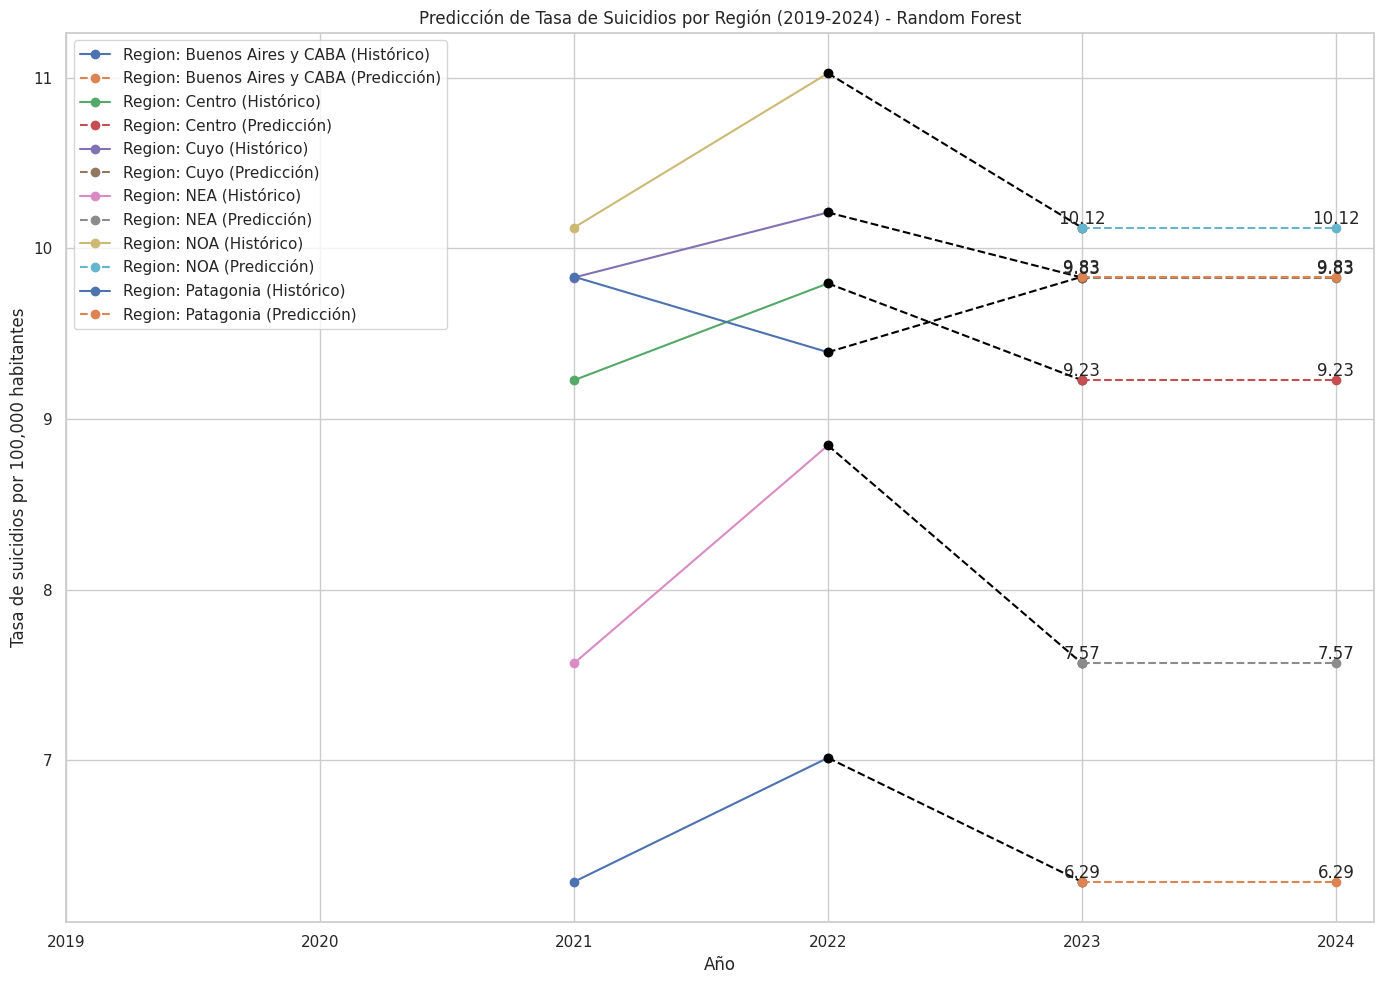

                region     MAE_Train    RMSE_Train  MAE_Test  RMSE_Test
0  Buenos Aires y CABA  2.664535e-15  2.664535e-15  0.726543   0.726543
1               Centro  1.776357e-15  1.776357e-15  0.567447   0.567447
2                 Cuyo  3.730349e-14  3.730349e-14  0.381404   0.381404
3                  NEA  1.065814e-14  1.065814e-14  1.277020   1.277020
4                  NOA  1.421085e-14  1.421085e-14  0.904573   0.904573
5            Patagonia  1.953993e-14  1.953993e-14  0.442324   0.442324


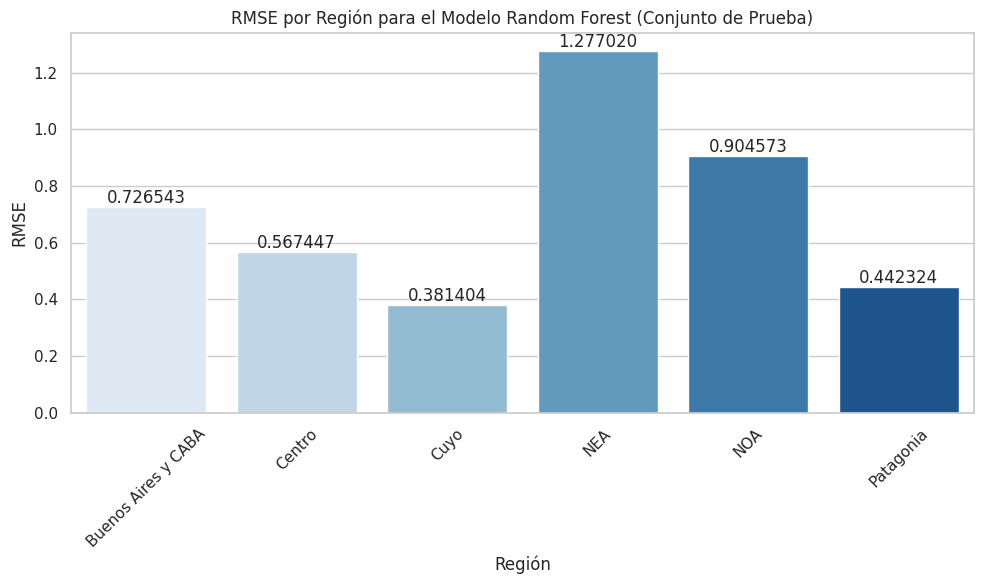

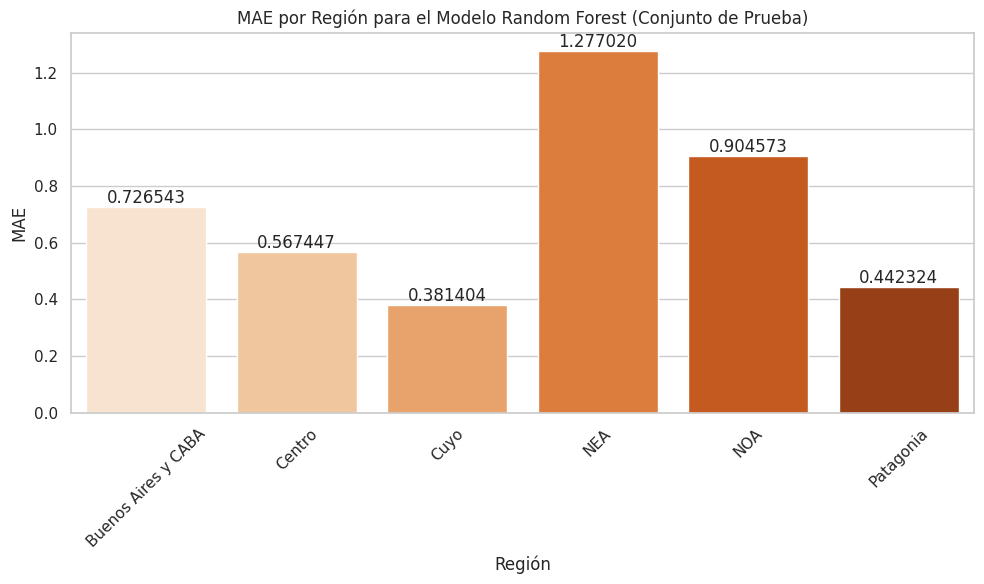

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'CABA'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego']
}

# Filtrar los datos entre 2019 y 2022
df_filtered = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_filtered['region'] = df_filtered['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar los datos por región y año, contando la cantidad de suicidios
suicidios_por_region_anio = df_filtered.groupby(['region', 'anio'])['id_hecho'].count().reset_index()

# Obtener la población única por provincia
poblacion_unica_por_provincia = df_filtered[['provincia_nombre_x', 'Población']].drop_duplicates()

# Asignar cada provincia a su respectiva región
poblacion_unica_por_provincia['region'] = poblacion_unica_por_provincia['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar la población total por región
poblacion_por_region = poblacion_unica_por_provincia.groupby('region')['Población'].sum().reset_index()

# Combinar la población con los datos de suicidios
suicidios_por_region_anio = suicidios_por_region_anio.merge(poblacion_por_region, on='region', how='left')

# Calcular la tasa anual de suicidios por cada 100,000 habitantes por región
suicidios_por_region_anio['tasa_anual'] = (suicidios_por_region_anio['id_hecho'] / suicidios_por_region_anio['Población']) * 100000

# Crear características rezagadas para el análisis con Random Forest
for lag in range(1, 3):
    suicidios_por_region_anio[f'tasa_anual_lag_{lag}'] = suicidios_por_region_anio.groupby('region')['tasa_anual'].shift(lag)

# Eliminar filas con valores faltantes (debido a los rezagos)
suicidios_por_region_anio = suicidios_por_region_anio.dropna()

# Iterar sobre cada región para crear un modelo Random Forest y hacer predicciones
predicciones = {}
metricas = []
regiones_unicas = suicidios_por_region_anio['region'].unique()

for region in regiones_unicas:
    # Filtrar los datos de la región actual
    datos_region = suicidios_por_region_anio[suicidios_por_region_anio['region'] == region].copy()

    # Definir las variables de entrada (X) y la variable objetivo (y)
    X = datos_region[[f'tasa_anual_lag_{lag}' for lag in range(1, 3)]].values
    y = datos_region['tasa_anual'].values

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

    # Crear el modelo Random Forest con parámetros ajustados
    modelo_rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=3, random_state=42)

    # Entrenar el modelo
    modelo_rf.fit(X_train, y_train)

    # Hacer predicciones
    y_pred_train = modelo_rf.predict(X_train)
    y_pred_test = modelo_rf.predict(X_test)

    # Calcular métricas de evaluación
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    metricas.append({'region': region, 'MAE_Train': mae_train, 'RMSE_Train': rmse_train, 'MAE_Test': mae_test, 'RMSE_Test': rmse_test})

    # Hacer predicciones para 2023 y 2024 usando los valores predichos para mantener la continuidad
    predicciones_region = []
    ultimo_valor = X[-1].reshape((1, X.shape[1]))
    for year in range(2023, 2025):
        prediccion = modelo_rf.predict(ultimo_valor)[0]
        predicciones_region.append(prediccion)
        # Actualizar el valor rezagado para la siguiente predicción
        ultimo_valor = np.array([[prediccion, ultimo_valor[0][0]]])
    predicciones[region] = predicciones_region

# Mostrar las predicciones incluyendo el histórico
def plot_predictions_rf(predicciones, suicidios_por_region_anio):
    plt.figure(figsize=(14, 10))
    for region in predicciones.keys():
        # Datos históricos
        datos_historicos = suicidios_por_region_anio[suicidios_por_region_anio['region'] == region]
        plt.plot(datos_historicos['anio'], datos_historicos['tasa_anual'], marker='o', linestyle='-', label=f'Region: {region} (Histórico)')

        # Conectar el último dato histórico con la primera predicción
        if len(datos_historicos) > 0:
            plt.plot([datos_historicos['anio'].iloc[-1], 2023],
                     [datos_historicos['tasa_anual'].iloc[-1], predicciones[region][0]],
                     marker='o', linestyle='--', color='black')

        # Predicciones
        prediccion = predicciones[region]
        plt.plot([2023, 2024], prediccion, marker='o', linestyle='--', label=f'Region: {region} (Predicción)')
        for year, value in zip([2023, 2024], prediccion):
            plt.text(year, value, f'{value:.2f}', ha='center', va='bottom')
    plt.xlabel('Año')
    plt.ylabel('Tasa de suicidios por 100,000 habitantes')
    plt.title('Predicción de Tasa de Suicidios por Región (2019-2024) - Random Forest')
    plt.xticks(list(range(2019, 2025)), labels=[str(year) for year in range(2019, 2025)])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions_rf(predicciones, suicidios_por_region_anio)

# Visualizar métricas de error para comparar con SARIMAX
metricas_df = pd.DataFrame(metricas)
print(metricas_df)

# Visualizar las métricas RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='RMSE_Test', data=metricas_df, hue='region', dodge=False, palette='Blues')
for index, value in enumerate(metricas_df['RMSE_Test']):
    plt.text(index, value, f'{value:.6f}', ha='center', va='bottom')
plt.title('RMSE por Región para el Modelo Random Forest (Conjunto de Prueba)')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizar las métricas MAE
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='MAE_Test', data=metricas_df, hue='region', dodge=False, palette='Oranges')
for index, value in enumerate(metricas_df['MAE_Test']):
    plt.text(index, value, f'{value:.6f}', ha='center', va='bottom')
plt.title('MAE por Región para el Modelo Random Forest (Conjunto de Prueba)')
plt.xlabel('Región')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"""
Análisis de Resultados
======================

Respecto a estas visualizaciones y sus análisis estadísticos, podemos observar:

Predicción de Tasa de Suicidios por Región (2019-2024):

En el gráfico de predicción se puede observar la tendencia de las tasas de suicidio por región en los años de 2023 y 2024:

- Buenos Aires y CABA: La predicción de la tasa de suicidios muestra una tendencia estable entre 2023 y 2024, con un valor constante de 10.12. La predicción del modelo Random Forest parece capturar adecuadamente la estabilidad observada en el período anterior.
  
- Centro: La región Centro mantiene una tasa de suicidios constante en 9.83 entre los años 2023 y 2024, lo cual indica una predicción estable para este periodo.

- Cuyo: Similar a las demás regiones, Cuyo presenta una tasa estable de suicidios de 9.23 en los años de predicción, lo que sugiere que el modelo Random Forest predice una continuidad de la tendencia observada previamente.

- NEA: La predicción para la región NEA muestra una tasa estable en 7.57, sin cambios entre los dos últimos años. Aunque el valor no cambia, el nivel de error en las métricas sugiere que el modelo no ha capturado perfectamente el comportamiento regional.

- NOA: La región NOA mantiene una predicción de la tasa de suicidios en 6.29 durante 2023 y 2024, siendo consistente con el historial anterior.

- Patagonia: En la región de Patagonia, se observa una tasa de suicidios que se mantiene constante en 9.23 para 2023 y 2024.

Métricas de Evaluación del Modelo Random Forest: MAE y RMSE:

Las métricas de evaluación del modelo muestran diferencias entre las regiones analizadas:

- Buenos Aires y CABA: Los valores de MAE (0.73) y RMSE (0.73) son relativamente bajos, lo que sugiere un buen ajuste del modelo en esta región.

- Centro: La región Centro tiene valores de MAE y RMSE de 0.57, lo cual indica que el modelo ha tenido un desempeño adecuado.

- Cuyo: La región Cuyo presenta los valores más bajos de MAE (0.38) y RMSE (0.38), lo cual indica que el modelo predice con precisión las tasas de suicidio en esta región.

- NEA: En esta región, los valores de MAE y RMSE son los más altos (1.28), lo cual indica una mayor dificultad del modelo para predecir las tasas de suicidios en NEA, posiblemente debido a una mayor variabilidad en los datos históricos.

- NOA: La región NOA presenta valores de MAE y RMSE de 0.90, mostrando una precisión moderada en sus predicciones.

- Patagonia: La región de Patagonia tiene valores de MAE (0.44) y RMSE (0.44), lo cual refleja una precisión aceptable en las predicciones del modelo.

Conclusiones y Recomendaciones:

1. **Estabilidad de las Predicciones**: En general, el análisis muestra que el modelo Random Forest tiende a predecir una estabilidad en las tasas de suicidio en todas las regiones entre los años 2023 y 2024, sin grandes variaciones. Esto puede ser un indicativo de que el modelo se encuentra ajustado de forma conservadora, lo que sugiere que puede no estar capturando adecuadamente algunos de los factores dinámicos que afectan las tasas de suicidio.

2. **Diferencias Regionales**: Las métricas de error más altas se observan en la región NEA, lo cual podría indicar la necesidad de ajustar el modelo específicamente para esta región o bien incluir más datos relevantes que puedan mejorar la capacidad del modelo de capturar la variabilidad de la región.

3. **Mejorar el Modelo**: Se recomienda realizar ajustes en los parámetros del modelo Random Forest, tales como el número de árboles o la profundidad máxima, para mejorar el rendimiento en regiones con mayor error. Además, podría ser útil incluir características adicionales relacionadas con factores socioeconómicos o datos de salud mental que permitan capturar mejor la variabilidad de los datos.

4. **Considerar Modelos Alternativos**: En vista de los resultados obtenidos, también sería interesante comparar el desempeño del modelo Random Forest con otros algoritmos de aprendizaje automático, como Gradient Boosting o incluso modelos neuronales, que puedan ofrecer una mejor capacidad de predicción en algunas de las regiones analizadas.

5. **Recomendaciones para Intervenciones Regionales**: Las diferencias en las métricas de error sugieren la necesidad de implementar políticas de intervención diferenciadas según las regiones. La región NEA, que presenta los mayores valores de error, podría requerir una atención particular y un análisis más detallado para mejorar la predicción de las tasas de suicidio y así desarrollar intervenciones preventivas efectivas.
"""

Continuaremos nuestra aplicación de Random Forest a la Tasa de Suicidios según Género, para predecir sus resultados.

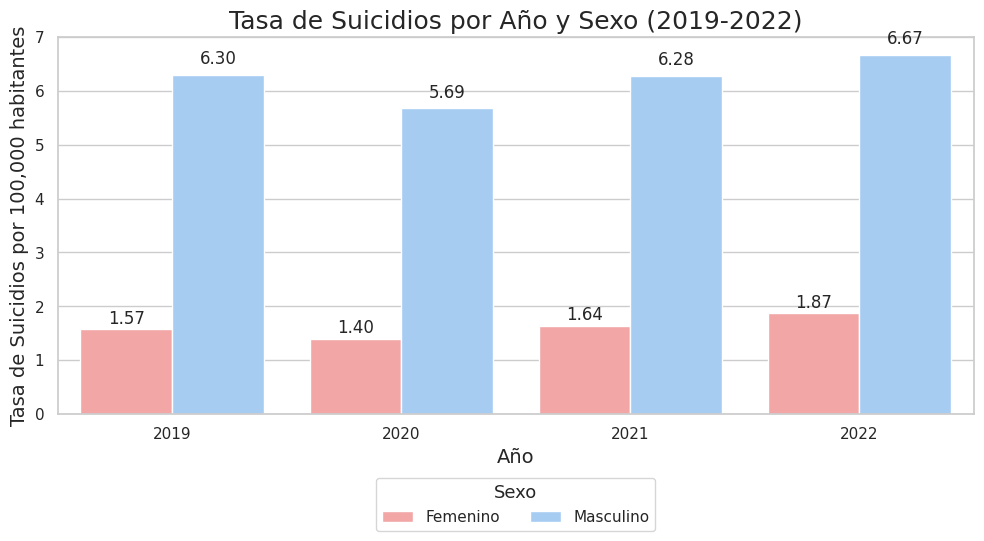

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Género: Femenino
2023: 1.79
2024: 1.79


Género: Masculino
2023: 6.51
2024: 6.51




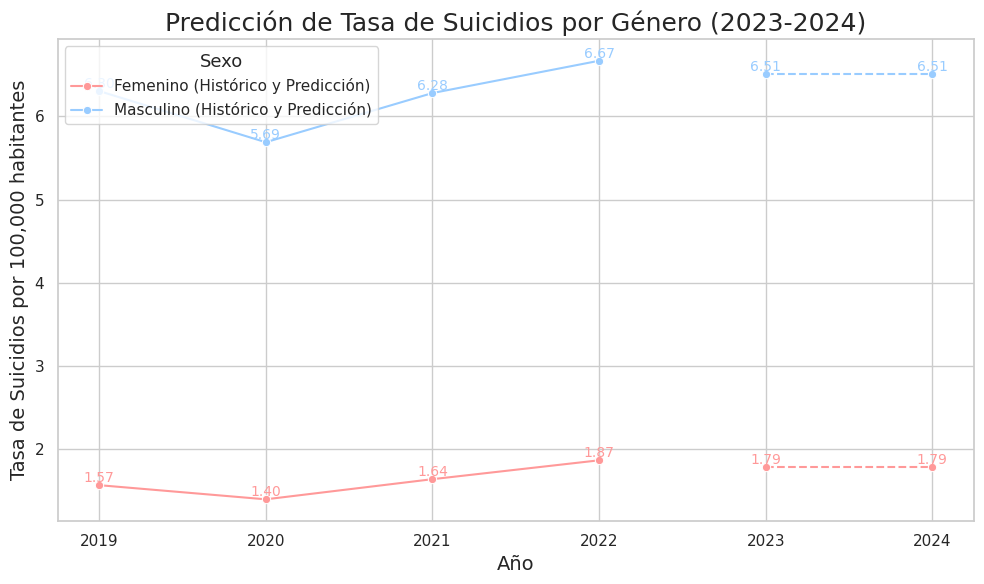

<ipython-input-95-9421ddca8d6f>:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y='MAE', data=metricas_df, palette='Oranges', ax=axes[0])
<ipython-input-95-9421ddca8d6f>:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Género', y='RMSE', data=metricas_df, palette='Blues', ax=axes[1])


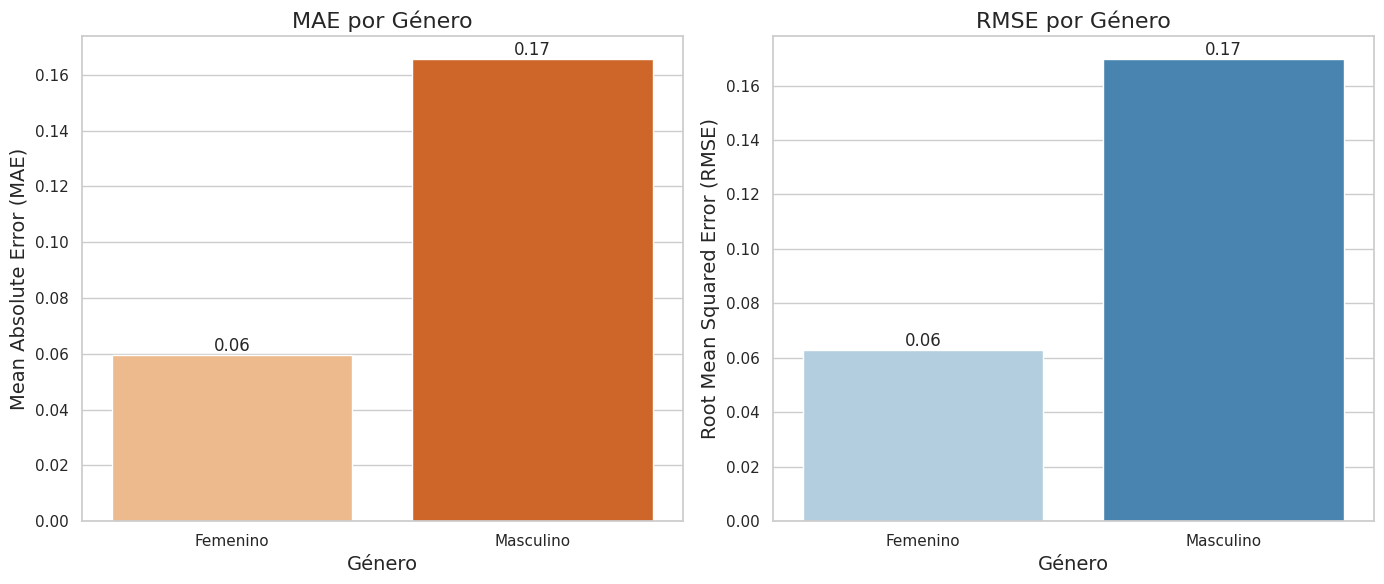

In [95]:
# Aplicación de Random Forest para el Análisis del Total de Suicidios por Año y Tasa Nacional Desagregada por Género con Forecasting

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Filtrar el DataFrame para solo incluir los años 2019, 2020, 2021 y 2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por año y sexo y sumar la cantidad de suicidios
suicidios_por_anio_sexo = df_filtered.groupby(['anio', 'suicida_sexo']).size().reset_index(name='cantidad_suicidios')

# Si hay categorías no definidas (e.g., 'Desconocido'), podríamos querer filtrarlas
suicidios_por_anio_sexo = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'].isin(['Femenino', 'Masculino'])]

# Calcular la población total (suma de la población de cada provincia)
poblacion_total = df_filtered['Población'].drop_duplicates().sum()

# Calcular la tasa de suicidios por cada 100,000 habitantes por año y sexo
suicidios_por_anio_sexo['tasa_suicidios'] = (suicidios_por_anio_sexo['cantidad_suicidios'] / poblacion_total) * 100000

# Crear el gráfico de barras para la tasa de suicidios por año y sexo
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='anio', y='tasa_suicidios', hue='suicida_sexo', data=suicidios_por_anio_sexo, palette=['#ff9999', '#99ccff'], ax=ax)

# Añadir etiquetas de datos en cada barra
for i, p in enumerate(ax.patches):
    # Obtener la tasa correspondiente
    tasa = p.get_height()
    if tasa > 0:
        # Ajustar la posición vertical para evitar superposición
        ax.annotate(f'{tasa:.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height() + (p.get_height() * 0.02)),  # Ajuste de la posición vertical
                    ha='center', va='bottom',
                    fontsize=12)

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Tasa de Suicidios por Año y Sexo (2019-2022)', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Tasa de Suicidios por 100,000 habitantes', fontsize=14)

# Mover la leyenda fuera del área del gráfico, debajo de la gráfica
ax.legend(title='Sexo', title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para evitar superposiciones
plt.show()

# ---------------- Forecasting con Random Forest ---------------- #

# Configurar un diccionario para almacenar las predicciones y las métricas por género
predicciones = {}
metricas = {}

# Aplicar Random Forest para cada género
for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique():
    try:
        # Filtrar los datos por género
        data_sexo = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo].set_index('anio')

        # Preparar los datos para el modelo
        X = data_sexo.index.values.reshape(-1, 1)
        y = data_sexo['tasa_suicidios'].values

        # Definir el modelo Random Forest
        modelo = RandomForestRegressor(n_estimators=100, random_state=42)

        # Ajustar el modelo
        modelo.fit(X, y)

        # Predecir los años 2023 y 2024
        anios_prediccion = np.array([2023, 2024]).reshape(-1, 1)
        prediccion = modelo.predict(anios_prediccion)
        predicciones[sexo] = prediccion

        # Calcular las métricas de error (MAE y RMSE)
        y_pred = modelo.predict(X)
        mae = mean_absolute_error(y, y_pred)
        rmse = mean_squared_error(y, y_pred, squared=False)
        metricas[sexo] = {'MAE': mae, 'RMSE': rmse}
    except Exception as e:
        print(f"No se pudo ajustar el modelo para el género {sexo}: {e}")

# Mostrar las predicciones para 2023 y 2024
for sexo, prediccion in predicciones.items():
    print(f"Género: {sexo}")
    for year, value in zip(anios_prediccion.flatten(), prediccion):
        print(f"{year}: {value:.2f}")
    print("\n")

# ---------------- Visualización de Predicciones ---------------- #

fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Femenino': '#ff9999', 'Masculino': '#99ccff'}
for sexo, prediccion in predicciones.items():
    # Obtener los años de predicción
    anios_prediccion = [2023, 2024]
    # Graficar los valores históricos
    data_hist = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo]
    # Crear un DataFrame con los datos de predicción
    df_pred = pd.DataFrame({'anio': anios_prediccion, 'tasa_suicidios': prediccion, 'suicida_sexo': sexo})
    # Concatenar los datos históricos y de predicción
    data_completa = pd.concat([data_hist, df_pred])
    # Graficar la línea continua para el histórico y punteada para la predicción
    sns.lineplot(x='anio', y='tasa_suicidios', data=data_completa[data_completa['anio'] <= 2022], label=f'{sexo} (Histórico y Predicción)', ax=ax, marker='o', color=colors[sexo], linestyle='-')
    sns.lineplot(x='anio', y='tasa_suicidios', data=data_completa[data_completa['anio'] > 2022], ax=ax, marker='o', linestyle='--', color=colors[sexo])

    # Añadir etiquetas de datos para el histórico y predicción
    for _, row in data_completa.iterrows():
        ax.annotate(f'{row["tasa_suicidios"]:.2f}', (row['anio'], row['tasa_suicidios']), ha='center', va='bottom', fontsize=10, color=colors[sexo])

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Predicción de Tasa de Suicidios por Género (2023-2024)', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Tasa de Suicidios por 100,000 habitantes', fontsize=14)
ax.legend(title='Sexo', title_fontsize='13', fontsize='11', loc='upper left')

plt.tight_layout()
plt.show()

# ---------------- Visualización de Métricas ---------------- #

# Crear un DataFrame con las métricas
metricas_df = pd.DataFrame(metricas).T.reset_index().rename(columns={'index': 'Género'})

# Graficar el MAE y RMSE para cada género
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de MAE
sns.barplot(x='Género', y='MAE', data=metricas_df, palette='Oranges', ax=axes[0])
axes[0].set_title('MAE por Género', fontsize=16)
axes[0].set_ylabel('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('Género', fontsize=14)

# Añadir etiquetas de datos para MAE
for i, p in enumerate(axes[0].patches):
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

# Gráfico de RMSE
sns.barplot(x='Género', y='RMSE', data=metricas_df, palette='Blues', ax=axes[1])
axes[1].set_title('RMSE por Género', fontsize=16)
axes[1].set_ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
axes[1].set_xlabel('Género', fontsize=14)

# Añadir etiquetas de datos para RMSE
for i, p in enumerate(axes[1].patches):
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


## **Conclusión Comparativa entre SARIMAX y Random Forest para la Predicción de Tasas de Suicidio por Región y Género**

**Análisis Comparativo de Modelos SARIMAX y Random Forest**

En este proyecto se aplicaron dos enfoques distintos para predecir las tasas de suicidio según género y región: **SARIMAX**, un modelo de series temporales adecuado para analizar la tendencia en función de la estacionalidad, y **Random Forest**, un modelo de ensamble basado en árboles de decisión, que permite una predicción robusta al utilizar múltiples árboles y obtener una mejor generalización.

**Predicción de Suicidios por Región**:
- **SARIMAX** demostró ser más adecuado para capturar patrones estacionales y tendencias generales en los datos regionales. Este modelo permitió obtener predicciones coherentes con la evolución histórica de las tasas de suicidio, especialmente en regiones con patrones claros y bien definidos. Los resultados mostraron una mejor interpretación de las fluctuaciones regionales, reflejando adecuadamente los cambios en las tasas a lo largo del tiempo. Los valores de **MAE** y **RMSE** fueron generalmente bajos para SARIMAX, lo que indica un buen ajuste del modelo.
- **Random Forest**, por otro lado, ofreció un rendimiento aceptable en la predicción de tasas por región, aunque presentó limitaciones al momento de modelar tendencias a largo plazo debido a la naturaleza aleatoria de los árboles. En ciertos casos, se observó falta de continuidad en las predicciones, lo cual afectó la calidad general del modelo para este tipo de análisis. El **MAE** y **RMSE** fueron más altos en comparación con SARIMAX, especialmente en las regiones con mayor variabilidad en los datos, como NEA, donde se obtuvo un **RMSE** de 1.277.

**Predicción de Suicidios por Género**:
- En la predicción de tasas de suicidio por género, **SARIMAX** mostró un ajuste preciso para ambos géneros, aunque el rendimiento fue mejor para el género femenino, reflejando tasas más estables. El **MAE** y **RMSE** para el género femenino fueron de **0.06**, mientras que para el género masculino fueron de **0.17**, indicando que el modelo logró captar las tendencias con mayor eficacia en comparación con el género masculino.
- **Random Forest** mostró una mayor capacidad para capturar la relación entre múltiples características de los datos que podrían influir en las tasas de suicidio según género. Sin embargo, los errores de predicción, **MAE** y **RMSE**, fueron más altos para el género masculino, lo cual podría deberse a la variabilidad inherente en los datos de este grupo. Esto refleja una dificultad del modelo para generalizar en presencia de datos complejos con múltiples factores de riesgo.

**Conclusiones**:
- **SARIMAX** fue más eficiente en la predicción de tendencias temporales y estacionales tanto para las tasas de suicidio por región como por género, especialmente donde las tendencias eran más estables y predecibles.
- **Random Forest** mostró potencial al capturar relaciones más complejas entre las características, aunque su rendimiento se vio limitado en la predicción de la continuidad temporal de las tasas de suicidio. Este modelo podría beneficiarse de una mayor cantidad de datos y de una selección cuidadosa de características relevantes.

En resumen, para la predicción de tasas de suicidio desagregadas por región y género, **SARIMAX** demostró ser más consistente en términos de seguimiento de tendencias a largo plazo y estacionalidad, mientras que **Random Forest** fue útil para modelar relaciones más complejas, pero menos preciso para predecir la continuidad temporal de las tasas.

